<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('/Users/darrenchia/Desktop/DSI_Projects/project-3/housing.csv')

In [3]:
# Check data
house.shape

(1460, 81)

In [4]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# No spaces, weird characters to remove

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
# check for missing data and sort by descending order
missing_data = house.isnull().sum().sort_values(ascending=False)
missing_data.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [10]:
missing_data[:19].index
# missing_data.plot(kind='box')

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [11]:
# for col in house:
#     if col in missing_data[:19]:
#         house[col].plot(kind='box')
# cannot plot non numeric columns

In [12]:
house[house.GarageYrBlt.isnull()].index

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [13]:
num1 = house[house.GarageYrBlt.isnull()].index
sum(num1)

57187

In [14]:
house[house.GarageCond.isnull()].index

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [15]:
num2 = house[house.GarageCond.isnull()].index
sum(num2)

57187

In [16]:
# Seems like the missing values relating to garage are from the same 81 properties
# where no garage was built
# NaN values in GarageYrBlt will remain as column is float type
# will set the values to 'NA' for 'GarageCond', 'GarageType', 'GarageFinish' &'GarageQual'

In [17]:
house.GarageCond.fillna(value='NA', inplace=True)
house.GarageType.fillna(value='NA', inplace=True)
house.GarageFinish.fillna(value='NA', inplace=True)
house.GarageQual.fillna(value='NA', inplace=True)

In [18]:
# garage_vars = ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']

# Can't work:

# house[garage_vars].fillna(value='NA', inplace=True)

# house[garage_vars].apply(lambda x: 'NA' if x == np.nan else x).any()

# house[garage_vars] = house[garage_vars].apply(lambda x: '0' if pd.isnull(x) else x)

# for col in house:
#     if col == garage_vars:
#         house.col.fillna(value='NA', inplace=True)

In [19]:
# Missing data
# These variables have lots of missing data. Will replace with 'NA' for object type

# PoolQC - to replace with NA            
# MiscFeature - to replace with NA   
# Alley - to replace with NA              
# Fence - to replace with NA              
# FireplaceQu - to replace with NA  
# LotFrontage - to replace with 0 to represent 0 feet

In [20]:
house.PoolQC.fillna(value='NA', inplace=True)
house.MiscFeature.fillna(value='NA', inplace=True)
house.Alley.fillna(value='NA', inplace=True)
house.Fence.fillna(value='NA', inplace=True)
house.FireplaceQu.fillna(value='NA', inplace=True)
house.LotFrontage.fillna(0, inplace=True)

In [21]:
# Other missing data

# BsmtExposure - to replace with NA       
# BsmtFinType2 - to replace with NA        
# BsmtFinType1 - to replace with 0 finished square feet     
# BsmtCond - to replace with NA              
# BsmtQual - to replace with NA               
# MasVnrArea - to replace with 0 finished square feet         
# MasVnrType - to replace with 'None'

In [22]:
house.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [23]:
house.BsmtExposure.fillna(value='NA', inplace=True)
house.BsmtFinType2.fillna(value='NA', inplace=True)
house.BsmtFinType1.fillna(0, inplace=True)
house.BsmtCond.fillna(value='NA', inplace=True)
house.BsmtQual.fillna(value='NA', inplace=True)
house.MasVnrArea.fillna(0, inplace=True)
house.MasVnrType.fillna(value='None', inplace=True)

In [24]:
# Last missing data
# Electrical - check most common for same house type & replace with most common value

In [25]:
house.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [26]:
house[house.Electrical.isnull()].index

Int64Index([1379], dtype='int64')

In [27]:
house.iloc[1379,:]

Id                  1380
MSSubClass            80
MSZoning              RL
LotFrontage           73
LotArea             9735
Street              Pave
Alley                 NA
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood      Timber
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle          SLvl
OverallQual            5
OverallCond            5
YearBuilt           2006
YearRemodAdd        2007
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         Unf
BsmtFinSF1             0
BsmtFinType2         Unf
BsmtFinSF2             0
BsmtUnfSF            384
TotalBsmtSF          384
Heating             GasA


In [28]:
house.Electrical.fillna(value='SBrkr', inplace=True)

In [29]:
# check no more missing / null values except GarageYrBlt
house.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
SalePrice         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
YearRemodAdd      0
YearBuilt         0
Heating           0
OverallCond       0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
TotalBsmtSF       0
HeatingQC         0
SaleCondition     0
ScreenPorch       0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0


In [30]:
house.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [31]:
house.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [32]:
# remove 10 commercial properties from the dataset
house = house[house['MSZoning'] != 'C (all)']

In [33]:
house.MSZoning.unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

In [34]:
# plot correlation matrix
corr = house.corr()

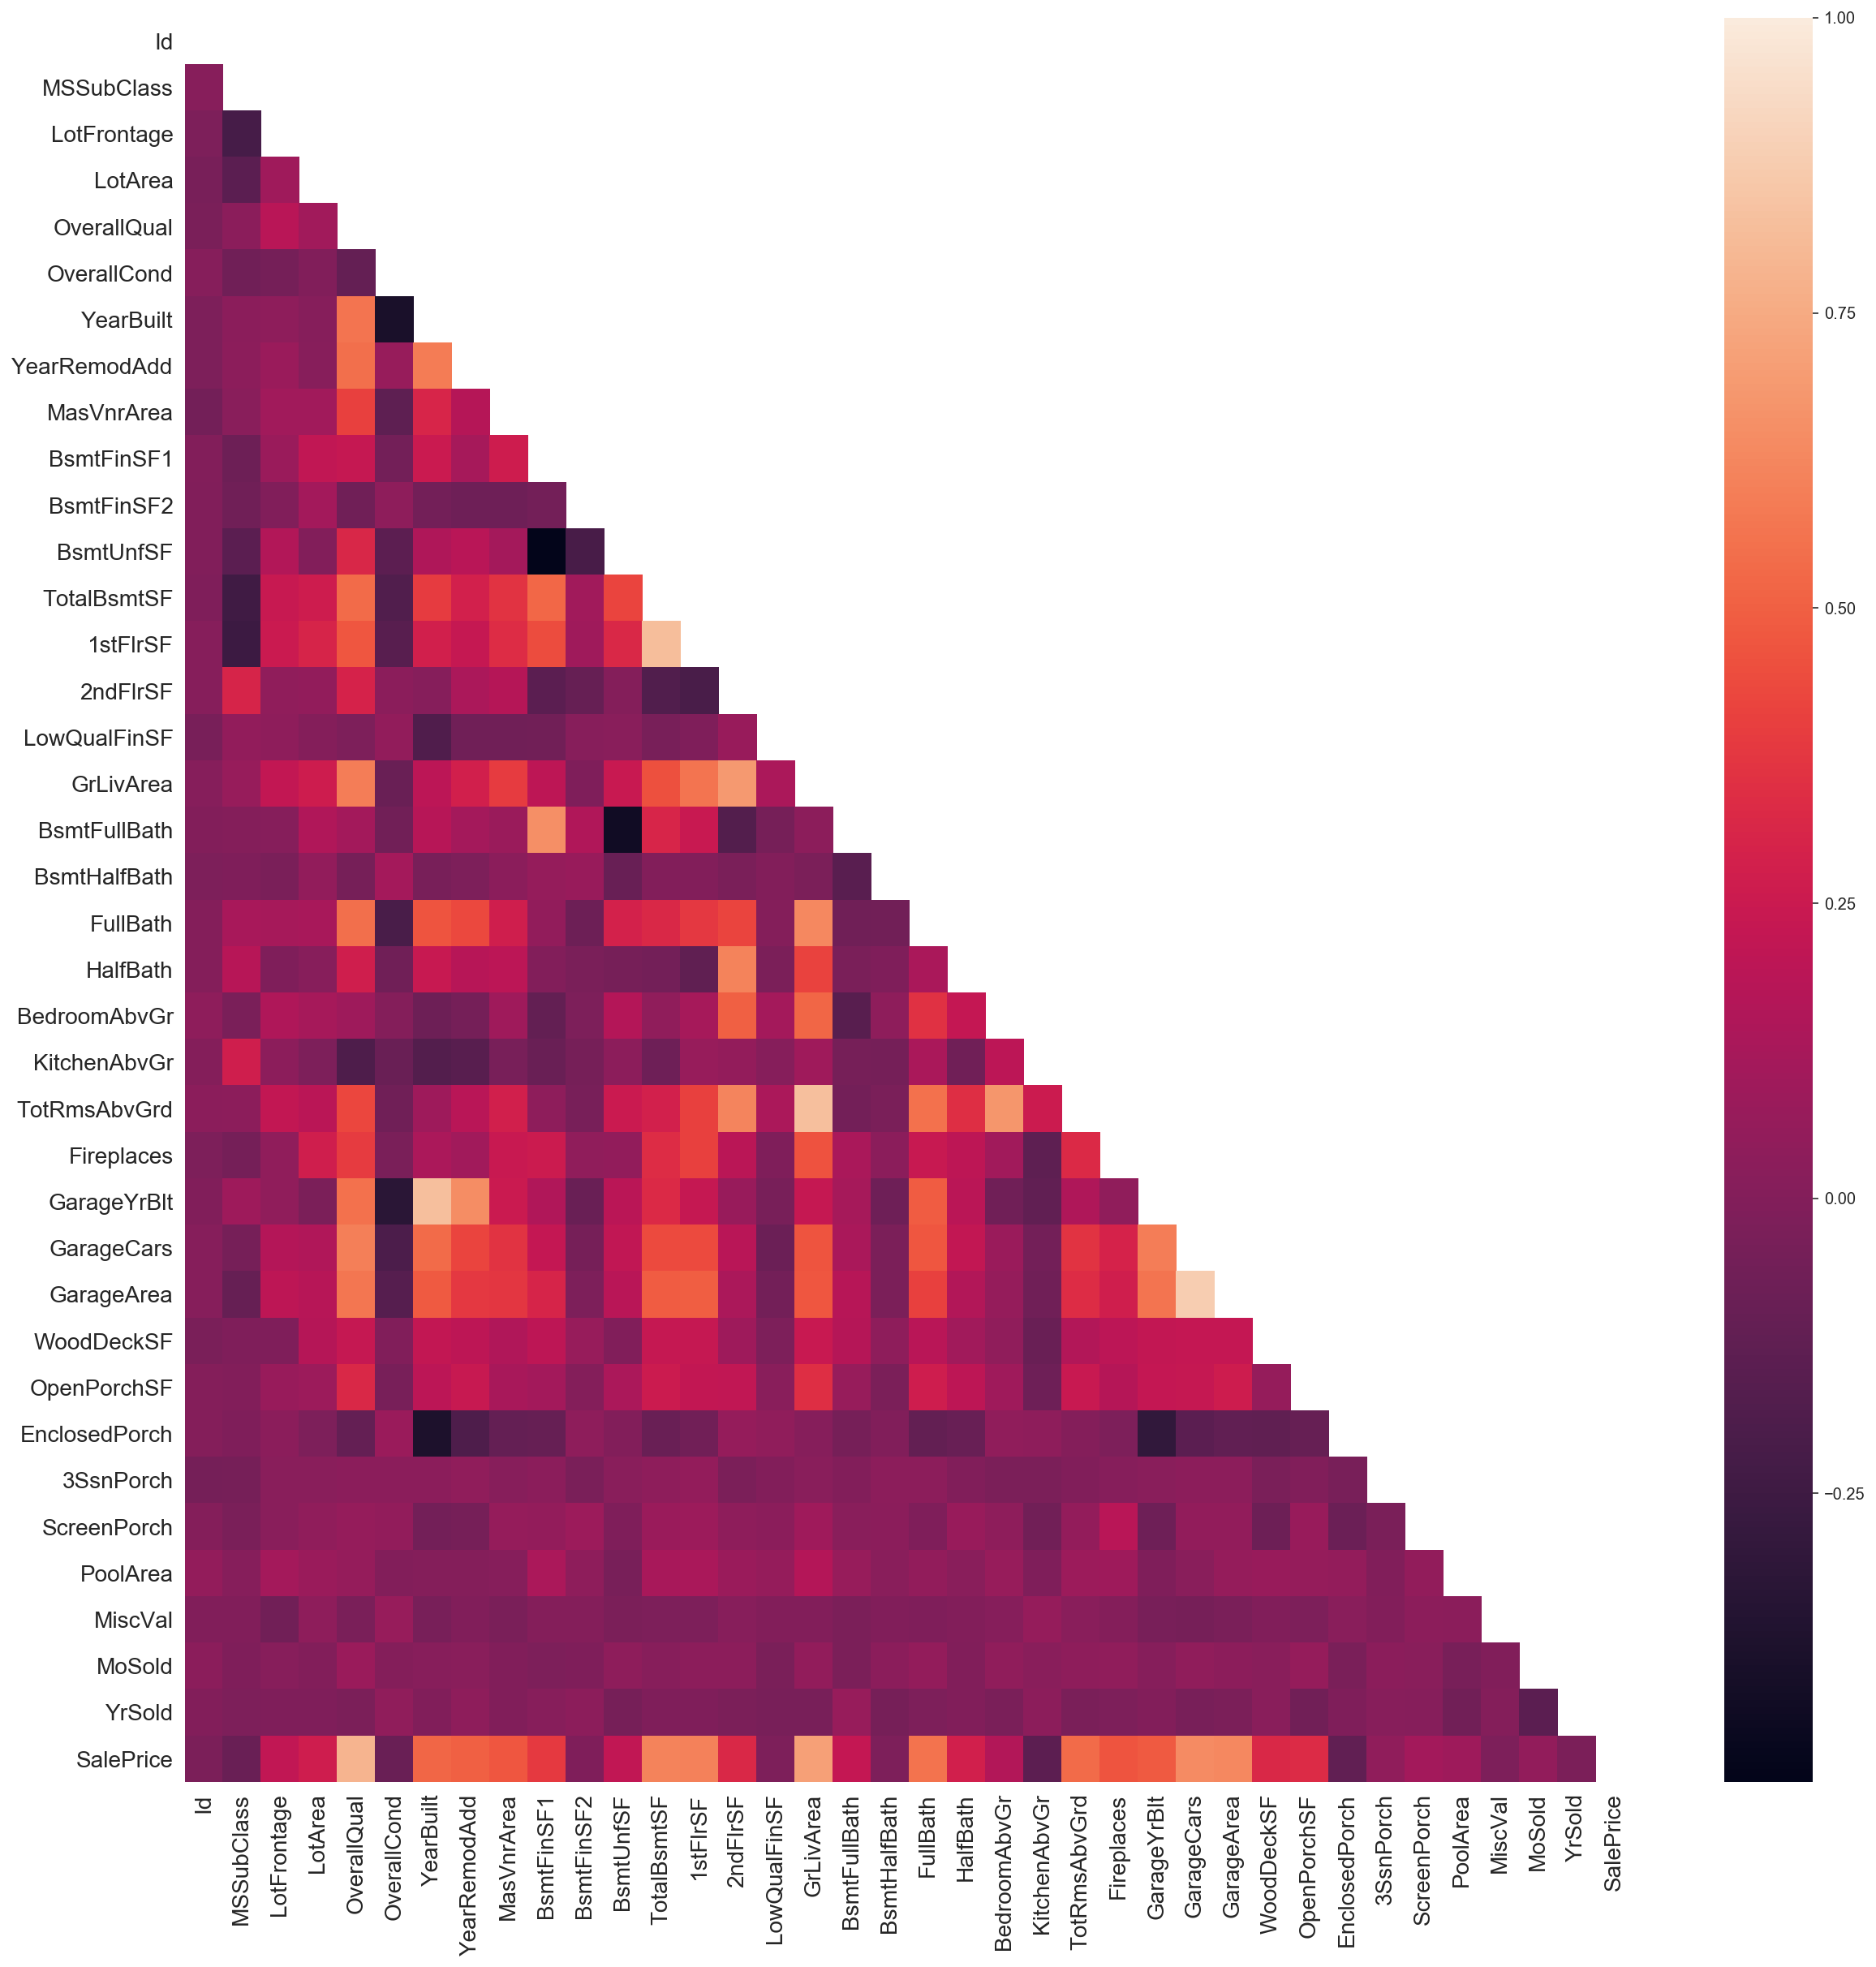

In [35]:
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(20,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, ax=ax)

# resize labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()


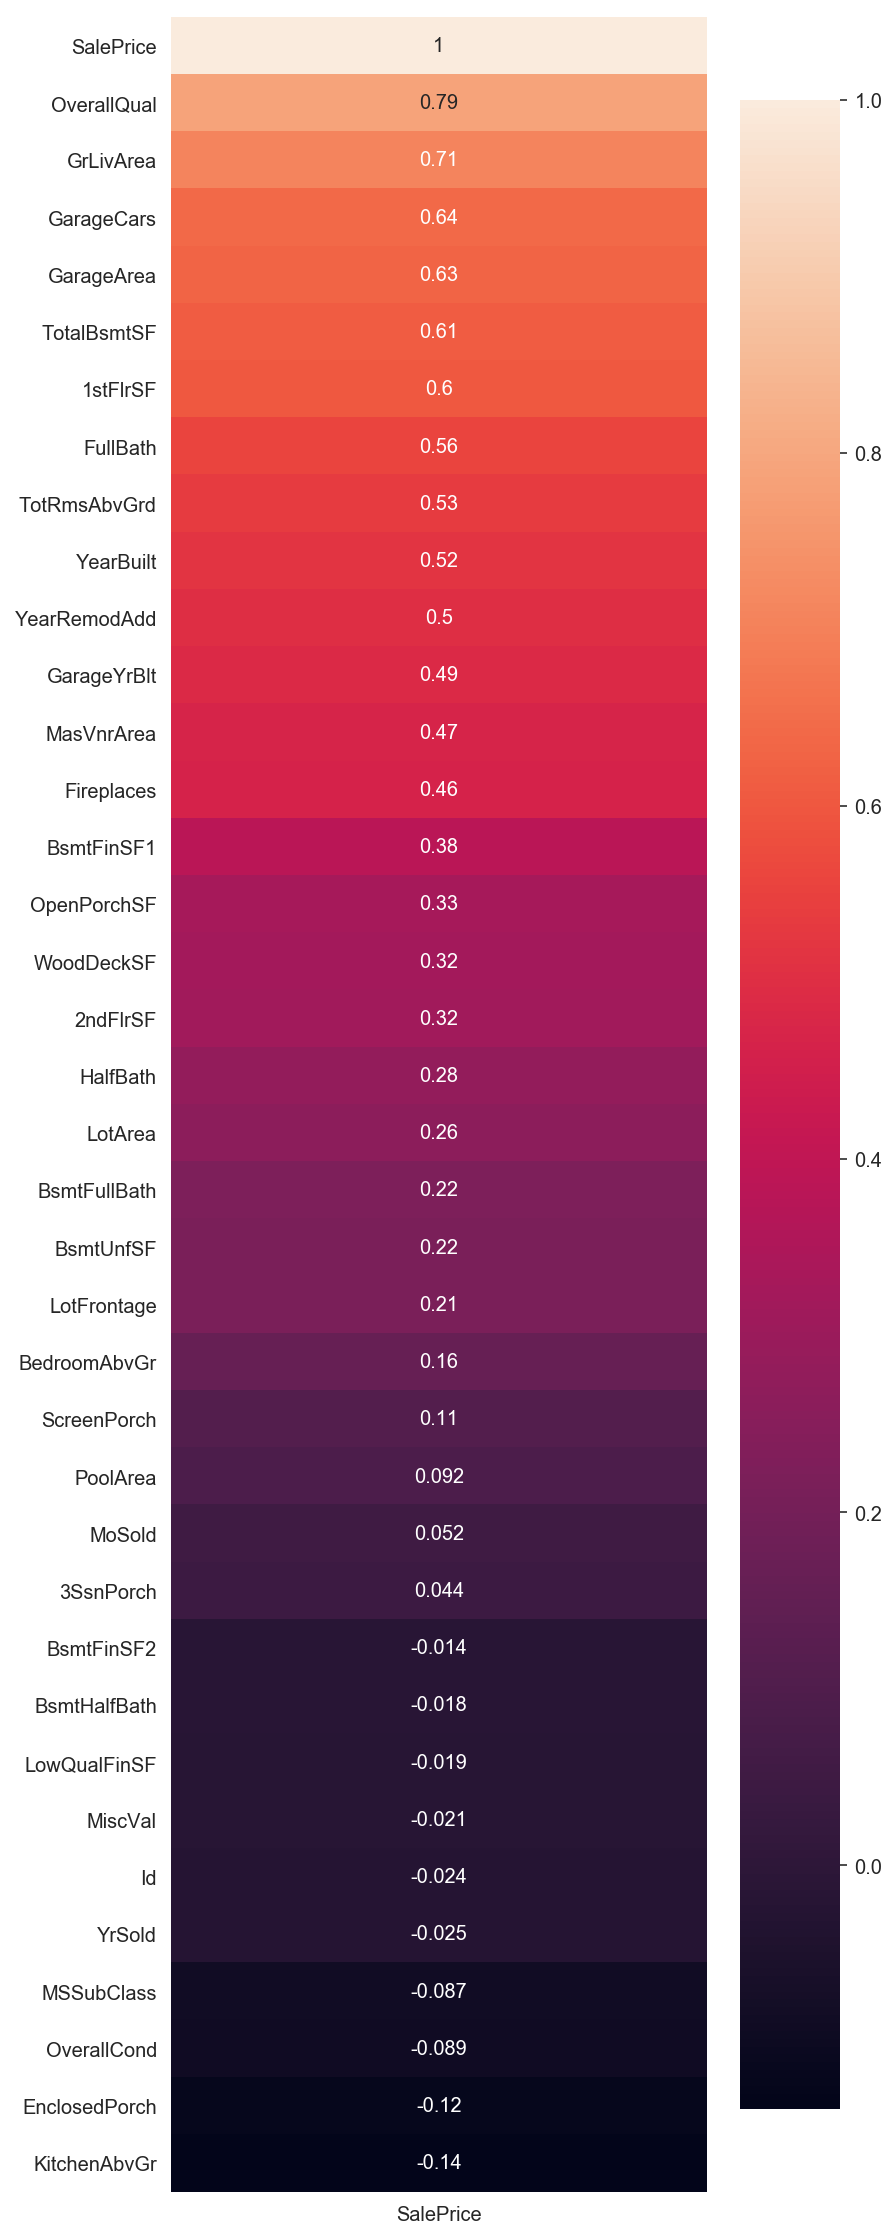

In [36]:
# plot correlation matrix for SalePrice column and sort in descending order 
plt.figure(figsize=(6,20))
sns.heatmap(house.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


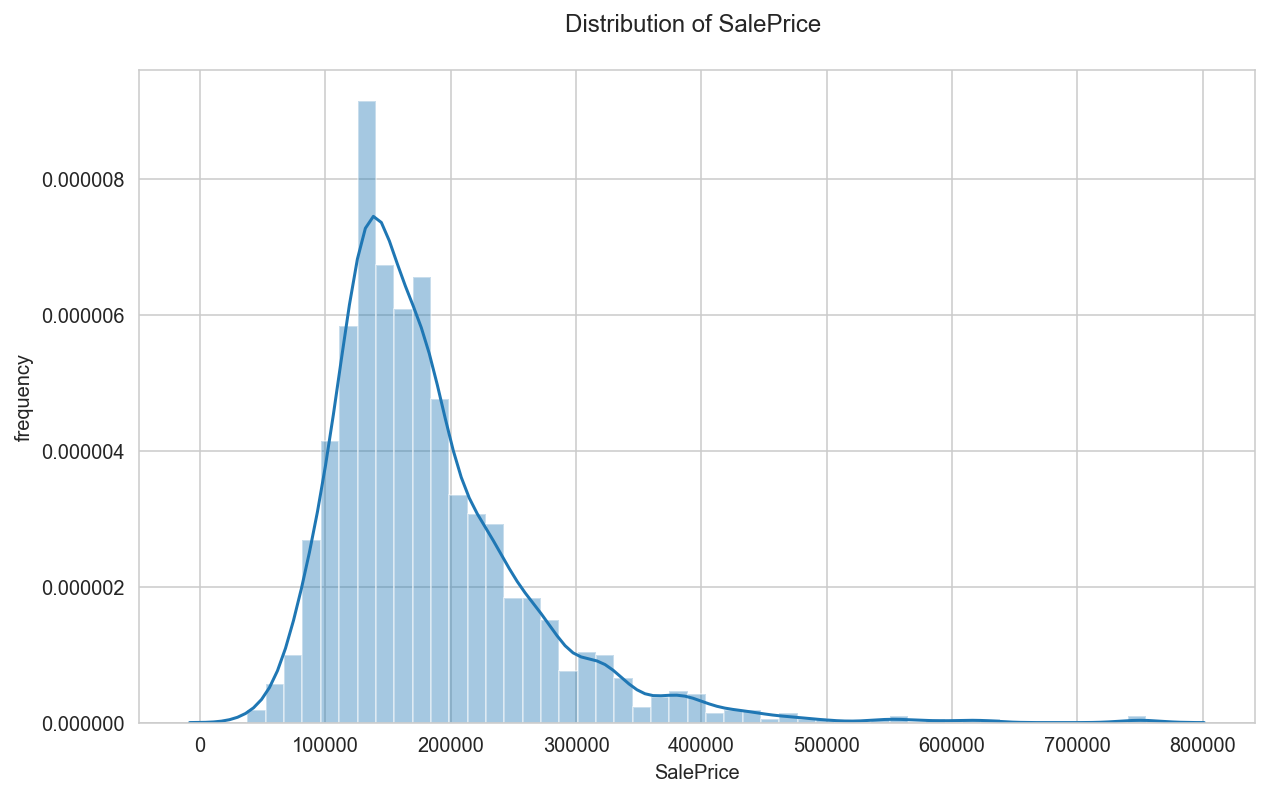

In [37]:
# check distribution of saleprice
# sns.distplot(house['SalePrice'])

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(house['SalePrice'])
ax.set_title('Distribution of SalePrice \n', fontsize = 12)
ax.set_ylabel('frequency', fontsize = 10)
plt.show()

In [38]:
# shows normal distribution with skewness to the right
# contains outliers which are highly priced

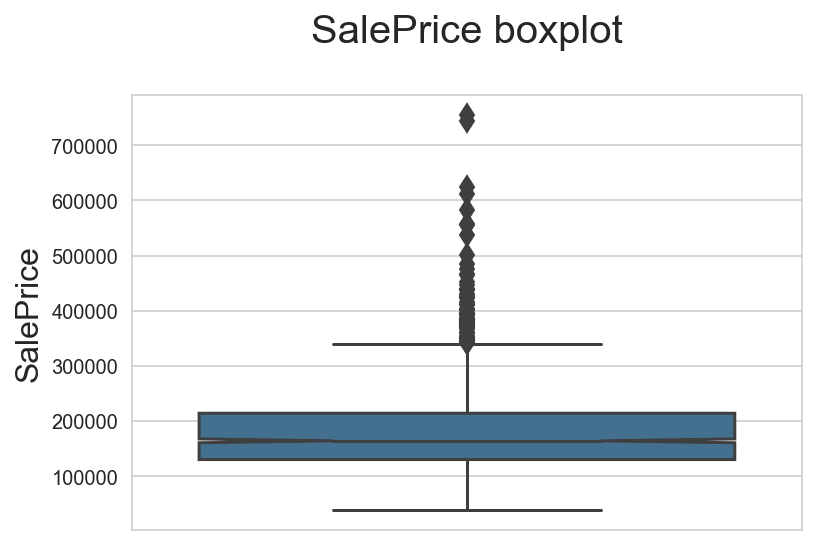

In [39]:
# boxplot of SalePrice
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
ax = sns.boxplot(house['SalePrice'], orient='v', fliersize=8,
linewidth=1.5, notch=True, saturation=0.5, ax=ax)
ax.set_ylabel('SalePrice', fontsize=16)
ax.set_title('SalePrice boxplot\n', fontsize=20)
plt.show()

In [40]:
house['SalePrice'].describe()

count      1450.000000
mean     181654.942069
std       79176.485241
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [41]:
# Consider: deal with outliers

# Remove outlier points by eliminating any points above (Mean + 3*SD) 
# and any points below (Mean - 3*SD) before plotting the frequencies.
# About 99.7% of values are within three standard deviations of a normal distribution.

In [42]:
print('3*std price =',3*np.std(house.SalePrice))
print('mean + 3*std price =',np.mean(house.SalePrice)+3*np.std(house.SalePrice))

3*std price = 237447.53488833626
mean + 3*std price = 419102.4769573018


In [43]:
outliers = house[house['SalePrice'] > (np.mean(house.SalePrice)
                                       +3*np.std(house.SalePrice))]

In [44]:
print('no. of outliers =', outliers.shape[0])
outliers.head(3) 

no. of outliers = 22


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
58    59          60       RL         66.0    13682   Pave    NA      IR2   
178  179          20       RL         63.0    17423   Pave    NA      IR1   
185  186          75       RM         90.0    22950   Pave    NA      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
58          HLS    AllPub   CulDSac       Gtl      StoneBr       Norm   
178         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
185         Lvl    AllPub    Inside       Gtl      OldTown     Artery   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
58        Norm     1Fam     2Story           10            5       2006   
178       Norm     1Fam     1Story            9            5       2008   
185       Norm     1Fam     2.5Fin           10            9       1892   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
58           2006       Hip  CompShg     VinylSd     VinylSd    BrkFace   
178          2009       Hip  CompShg     VinylSd     VinylSd      Stone   
185          1993     Gable  WdShngl     Wd Sdng     Wd Sdng       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
58       1031.0        Ex        TA      PConc       Ex       TA           Gd   
178       748.0        Ex        TA      PConc       Ex       TA           No   
185         0.0        Gd        Gd     BrkTil       TA       TA           Mn   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
58           Unf           0          Unf           0       1410         1410   
178          GLQ        1904          Unf           0        312         2216   
185          Unf           0          Unf           0       1107         1107   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
58     GasA        Ex          Y      SBrkr      1426      1519             0   
178    GasA        Ex          Y      SBrkr      2234         0             0   
185    GasA        Ex          Y      SBrkr      1518      1518           572   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
58        2945             0             0         3         1             3   
178       2234             1             0         2         0             1   
185       3608             0             0         2         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
58              1          Gd            10        Typ           1   
178             1          Ex             9        Typ           1   
185             1          Ex            12        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
58           Gd    BuiltIn       2006.0          Fin           3         641   
178          Gd     Attchd       2009.0          Fin           3        1166   
185          TA     Detchd       1993.0          Unf           3         840   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
58          TA         TA          Y         192            0             37   
178         TA         TA          Y           0           60              0   
185         Ex         TA          Y           0          260              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
58           0            0         0     NA     NA          NA        0   
178          0            0         0     NA     NA          NA        0   
185          0          410         0     NA  GdPrv          NA        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
58       10    2006      New       Partial     438780  
178       7    2009      New       Partial     501837  
185       6    2006       WD        Normal     475000

In [45]:
house_clean = house[house['SalePrice'] <= (np.mean(house.SalePrice)
                                       +3*np.std(house.SalePrice))]
print(house_clean.shape[0])
house_clean.head(3)

1428


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    NA      Reg   
1   2          20       RL         80.0     9600   Pave    NA      Reg   
2   3          60       RL         68.0    11250   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0     NA    NA          NA        0       2    2008   
1            0         0     NA    NA          NA        0       5    2007   
2            0         0     NA    NA          NA        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500

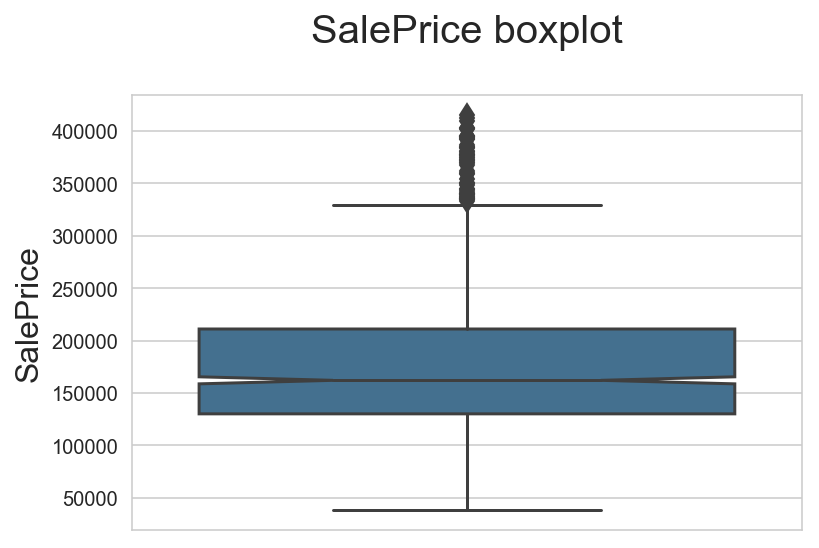

In [46]:
# boxplot of SalePrice after removing outliers
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
ax = sns.boxplot(house_clean['SalePrice'], orient='v', fliersize=8,
linewidth=1.5, notch=True, saturation=0.5, ax=ax)
ax.set_ylabel('SalePrice', fontsize=16)
ax.set_title('SalePrice boxplot\n', fontsize=20)
plt.show()

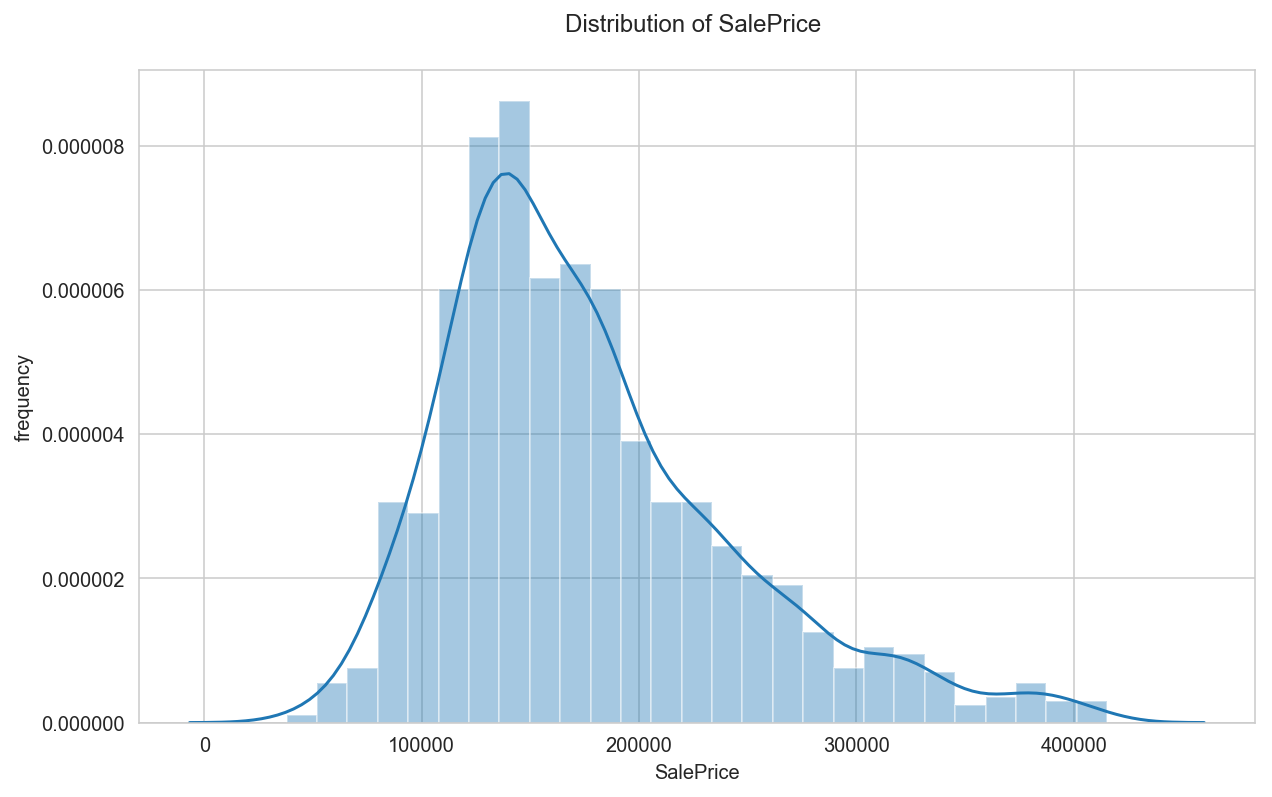

In [47]:
# check distribution of saleprice after removing outliers

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(house_clean['SalePrice'])
ax.set_title('Distribution of SalePrice \n', fontsize = 12)
ax.set_ylabel('frequency', fontsize = 10)
plt.show()

In [48]:
# pairplot for top 10 features to confirm the relationship visually vs target
corr_top = corr.nlargest(11, 'SalePrice')['SalePrice'].index
corr_top

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [49]:
house[corr_top].head()

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
0       856         2             8       2003          2003  
1      1262         2             6       1976          1976  
2       920         2             6       2001          2002  
3       961         1             7       1915          1970  
4      1145         2             9       2000          2000

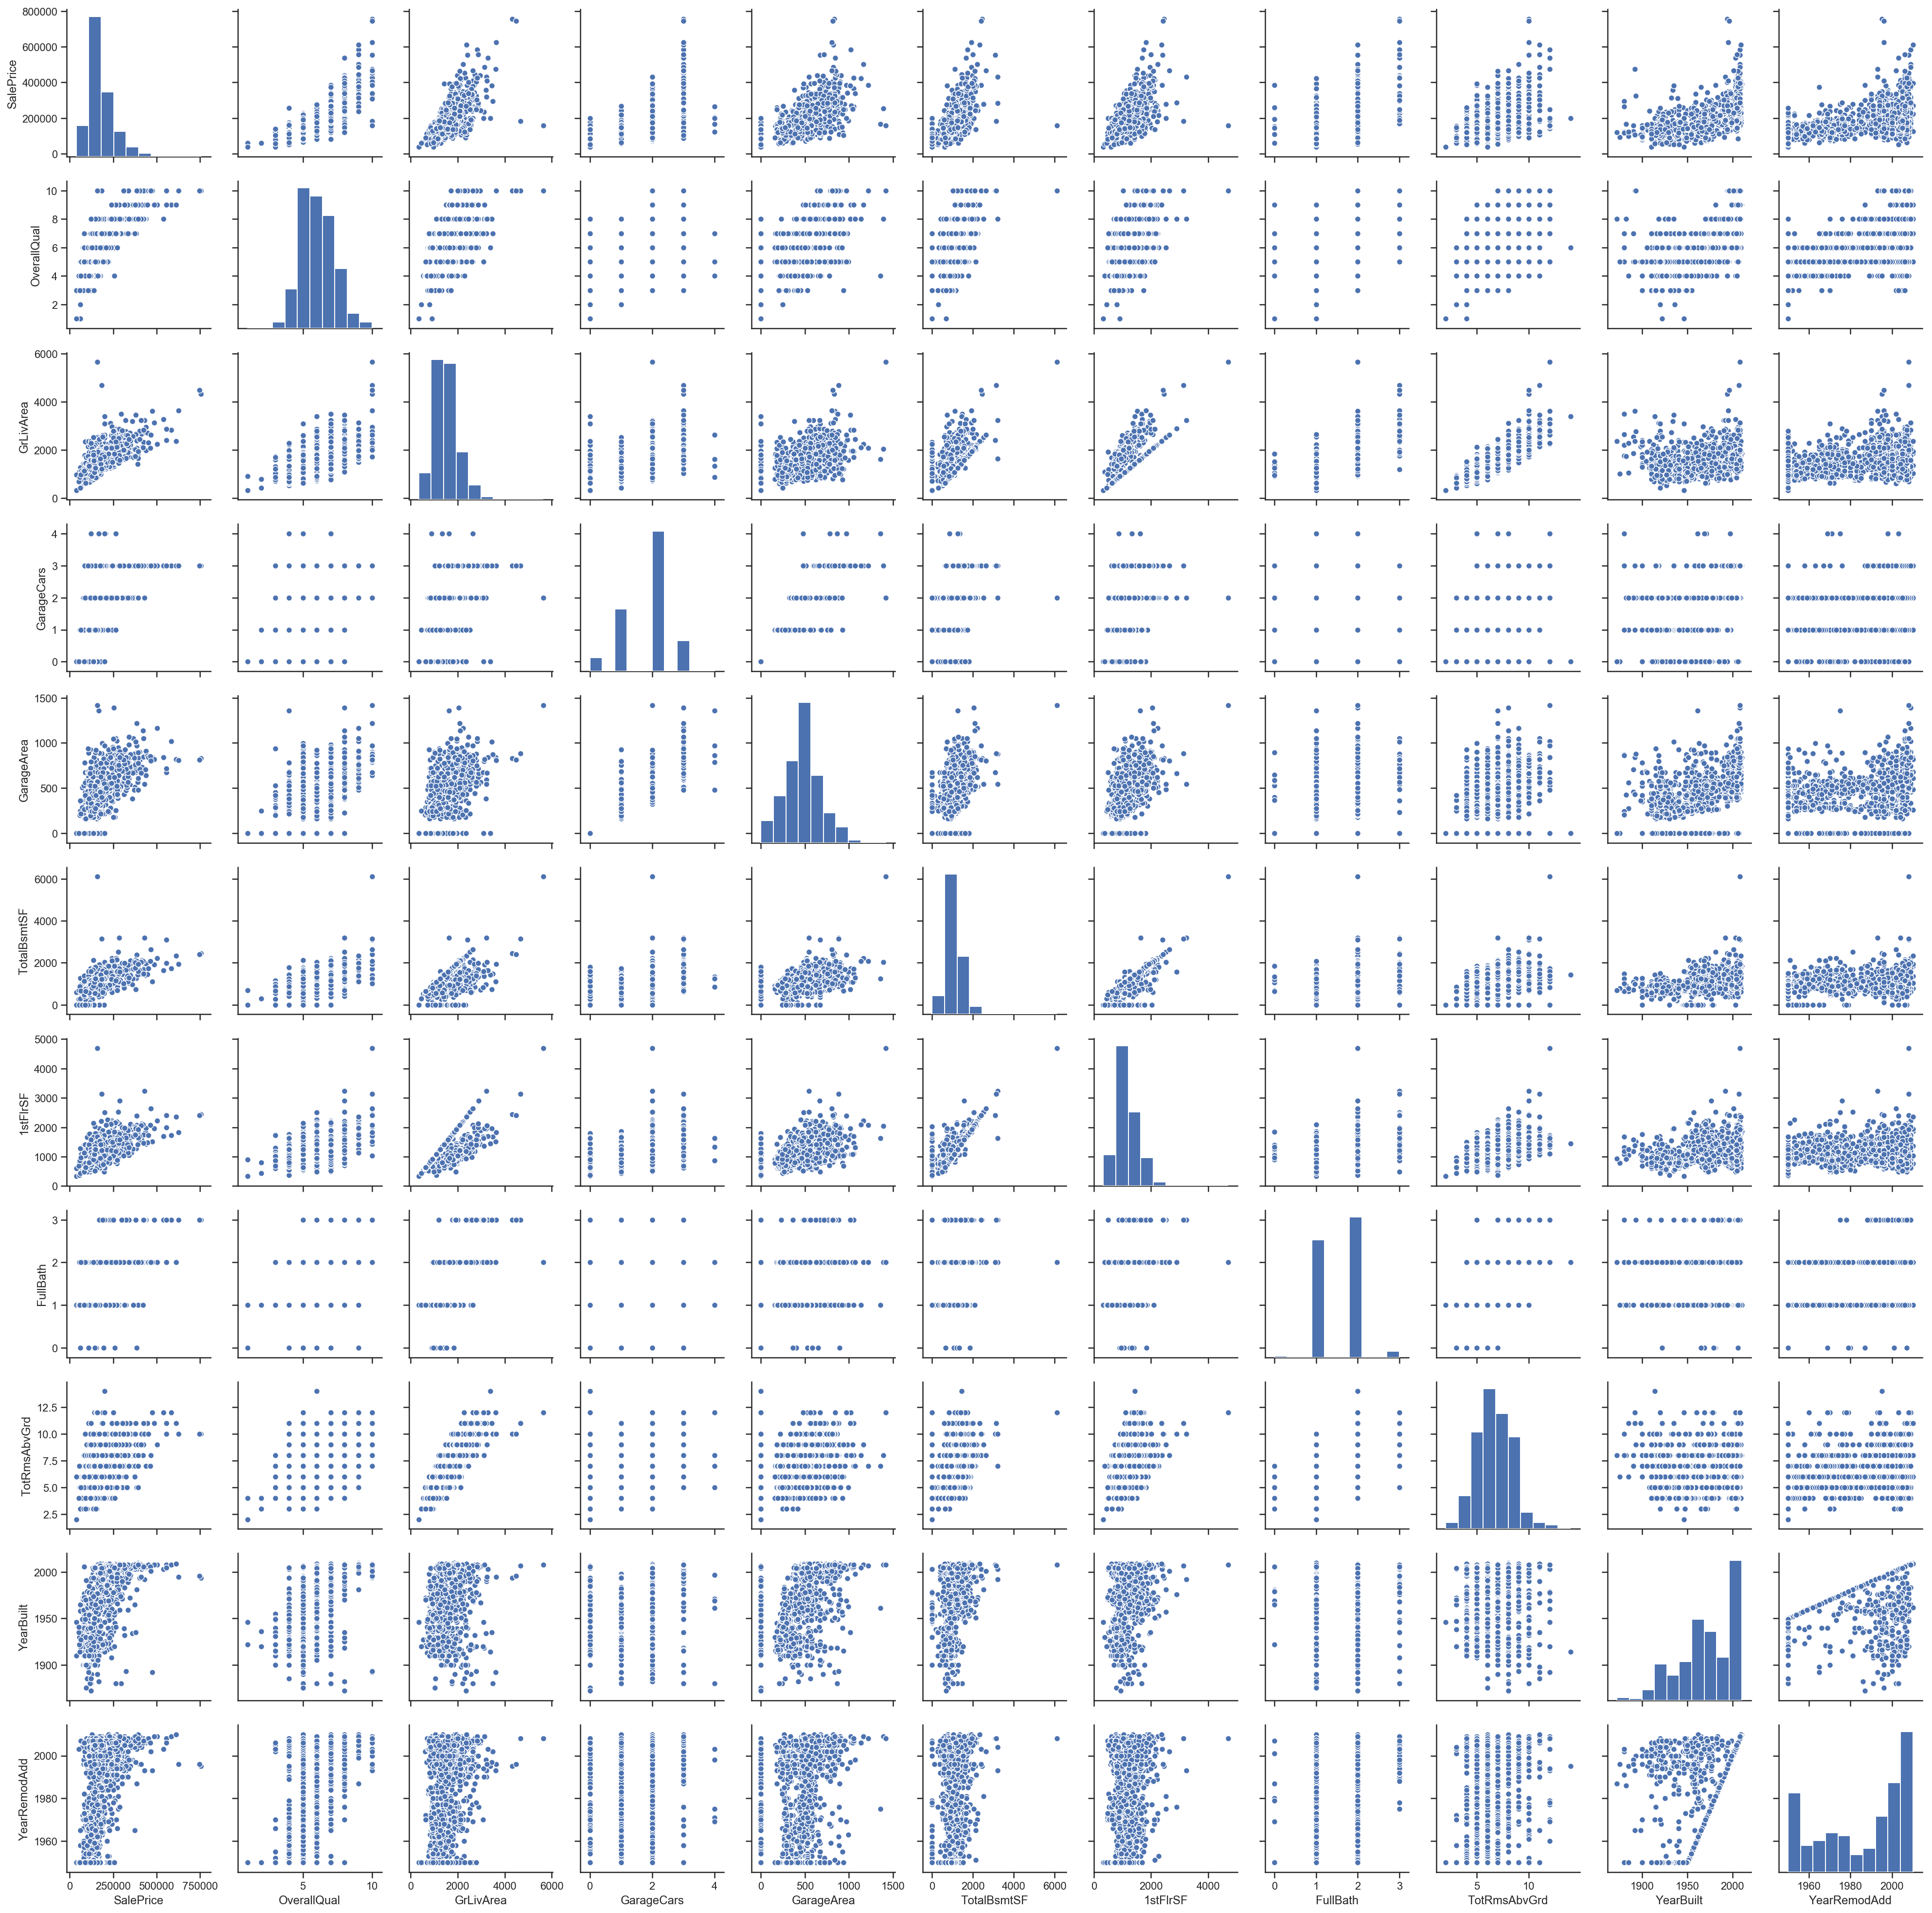

In [50]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(house[corr_top])

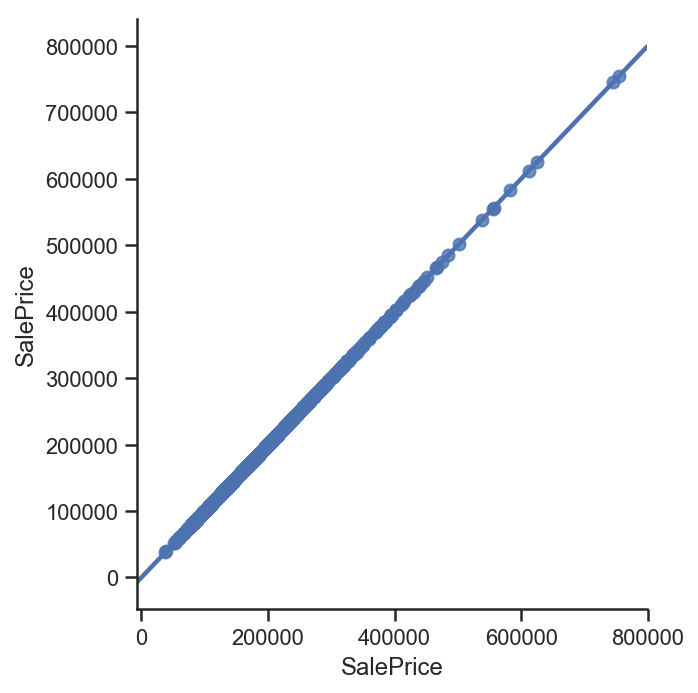

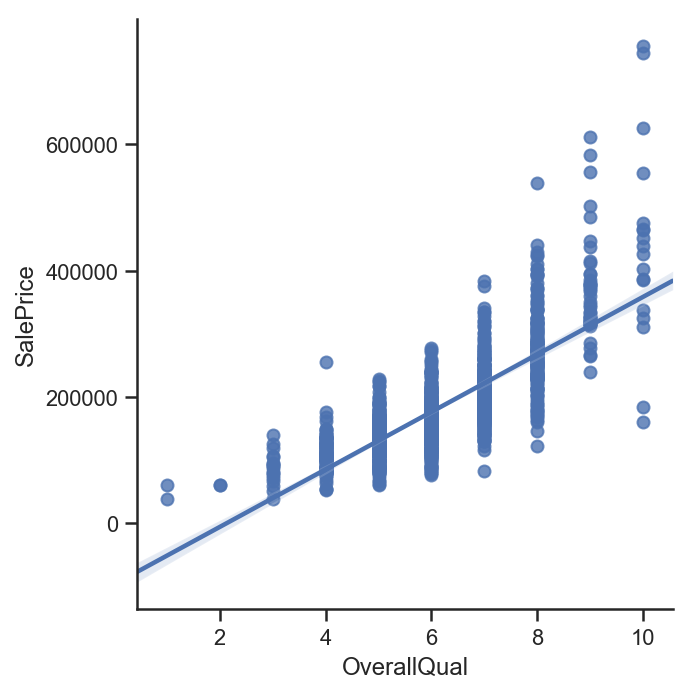

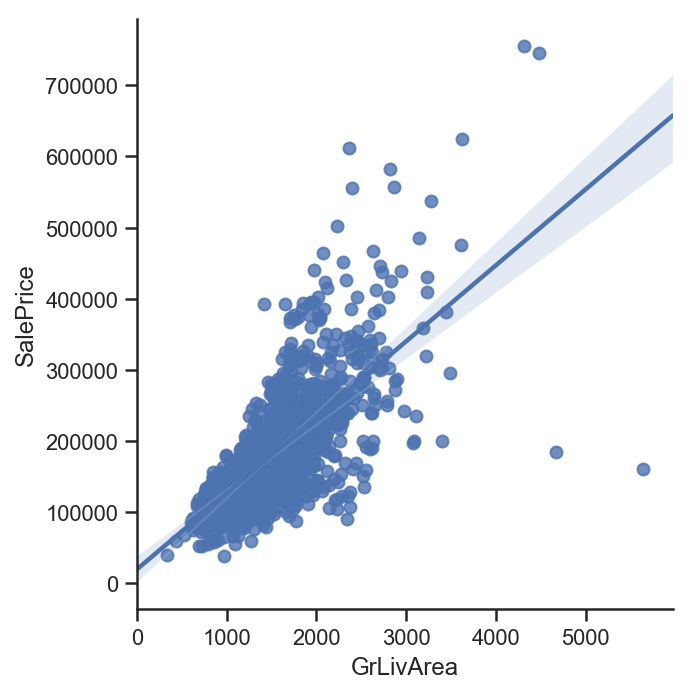

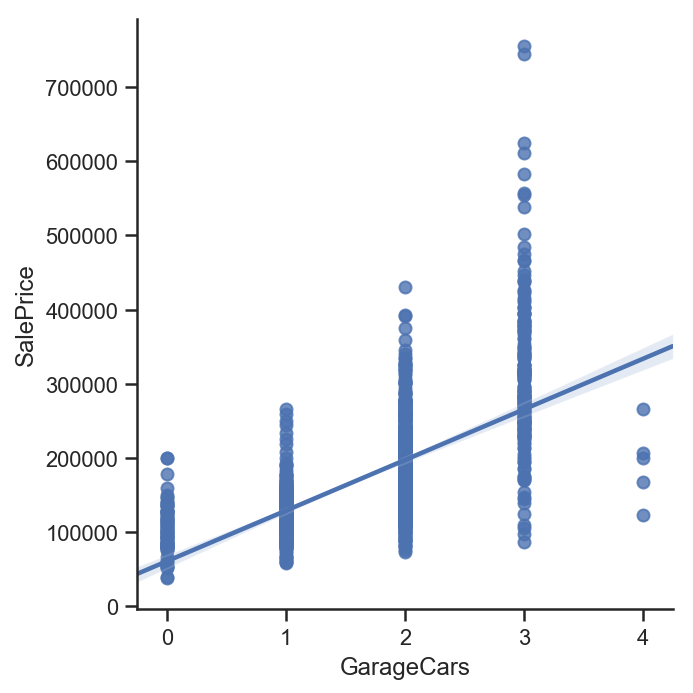

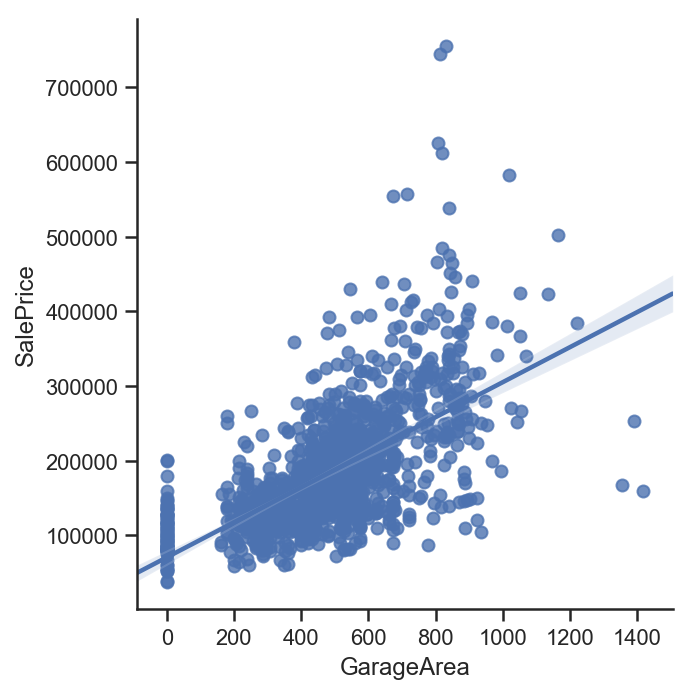

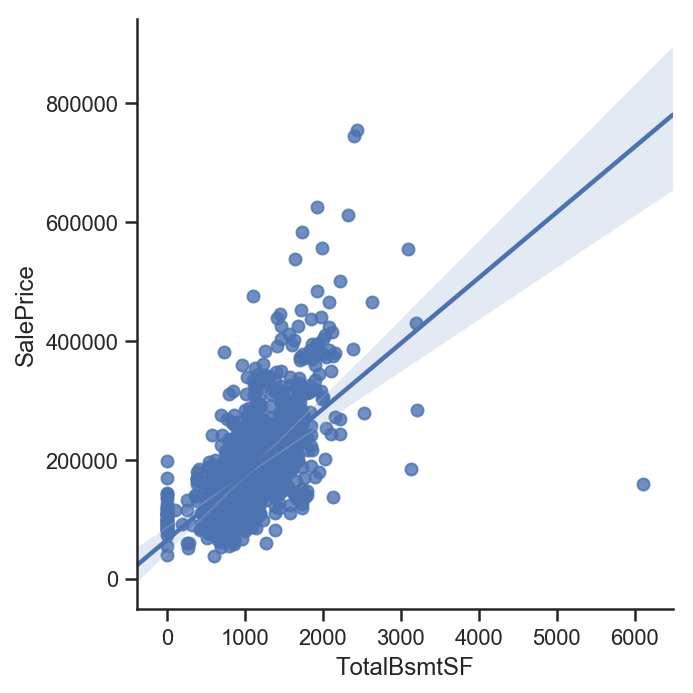

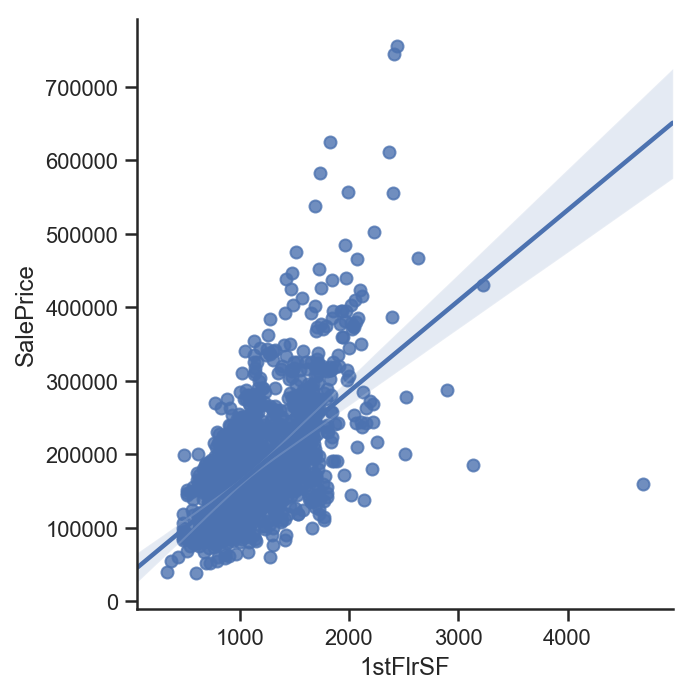

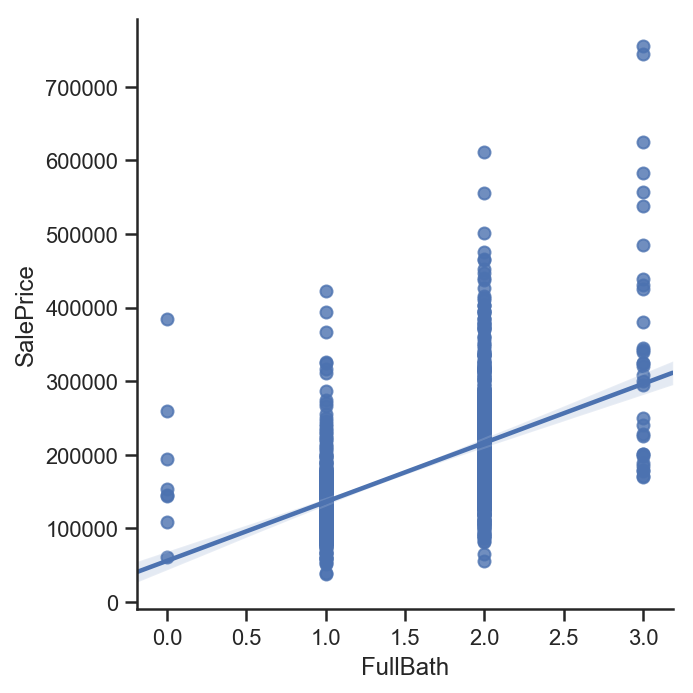

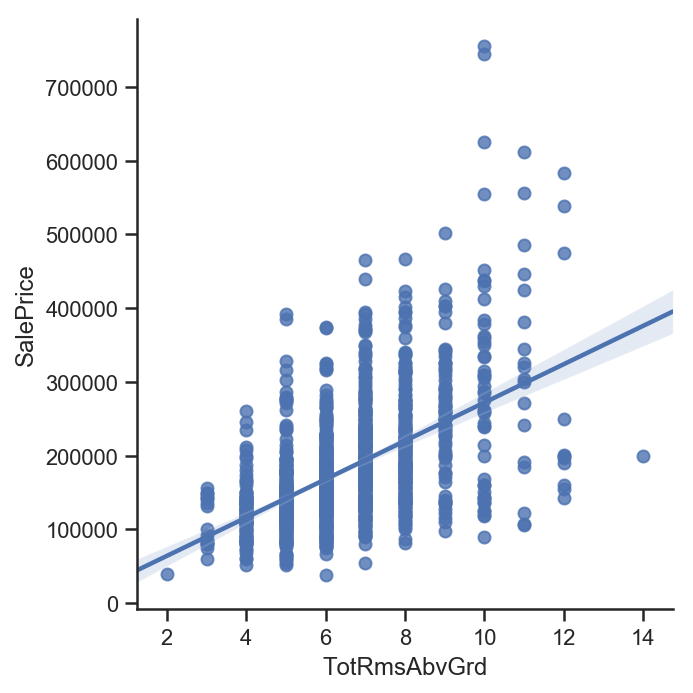

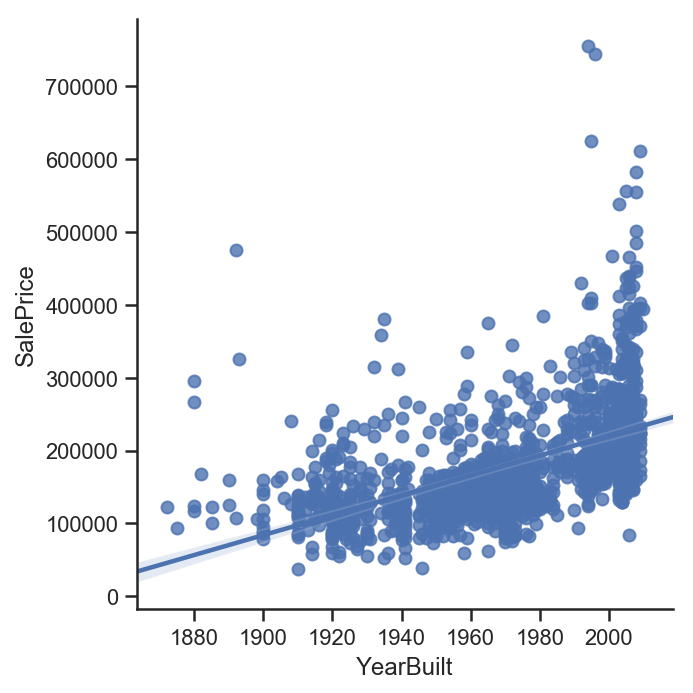

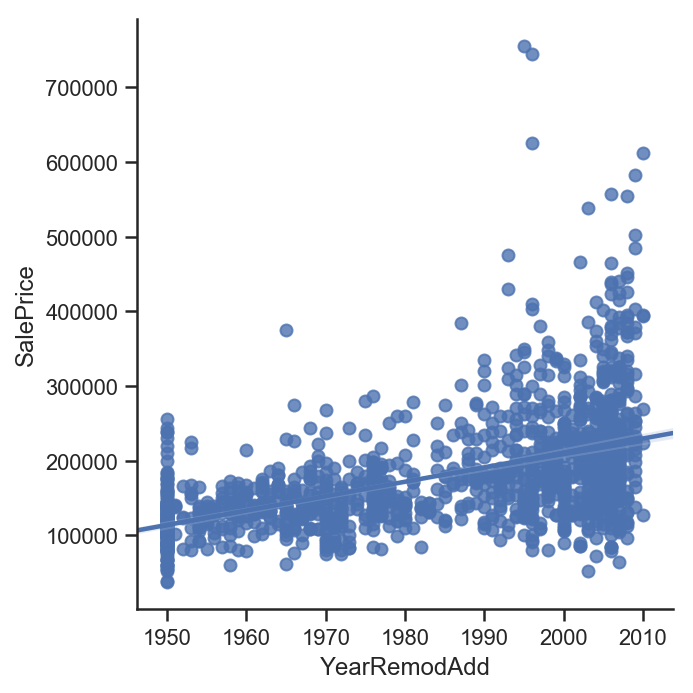

In [51]:
sns.set(style="ticks", color_codes=True)
for f in corr_top:
    sns.lmplot(x=f, y='SalePrice', data=house)

In [52]:
# shows linear relationship for the top 10 correlated features with saleprice

In [53]:
# check relationship with fixed features

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


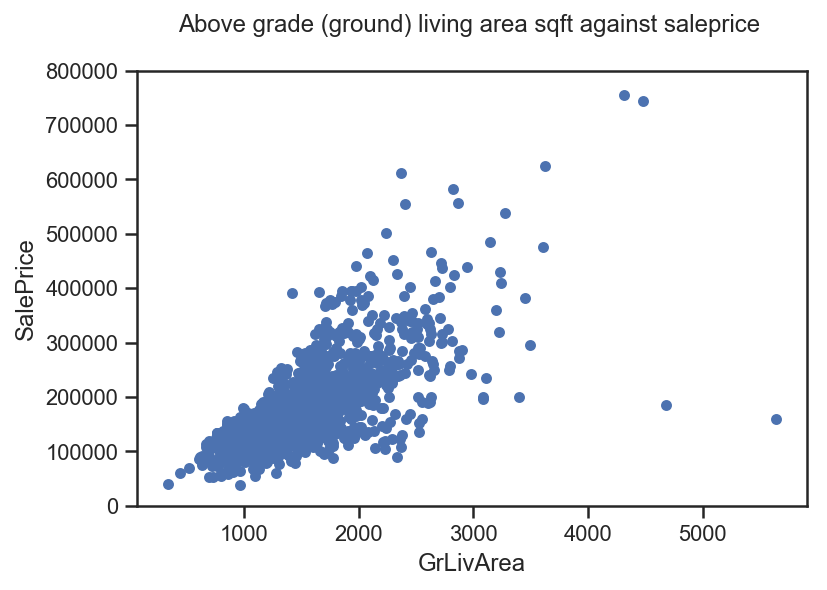

In [54]:
# scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), 
                  title='Above grade (ground) living area sqft against saleprice \n')

(-0.5, 95.5, 0, 800000)

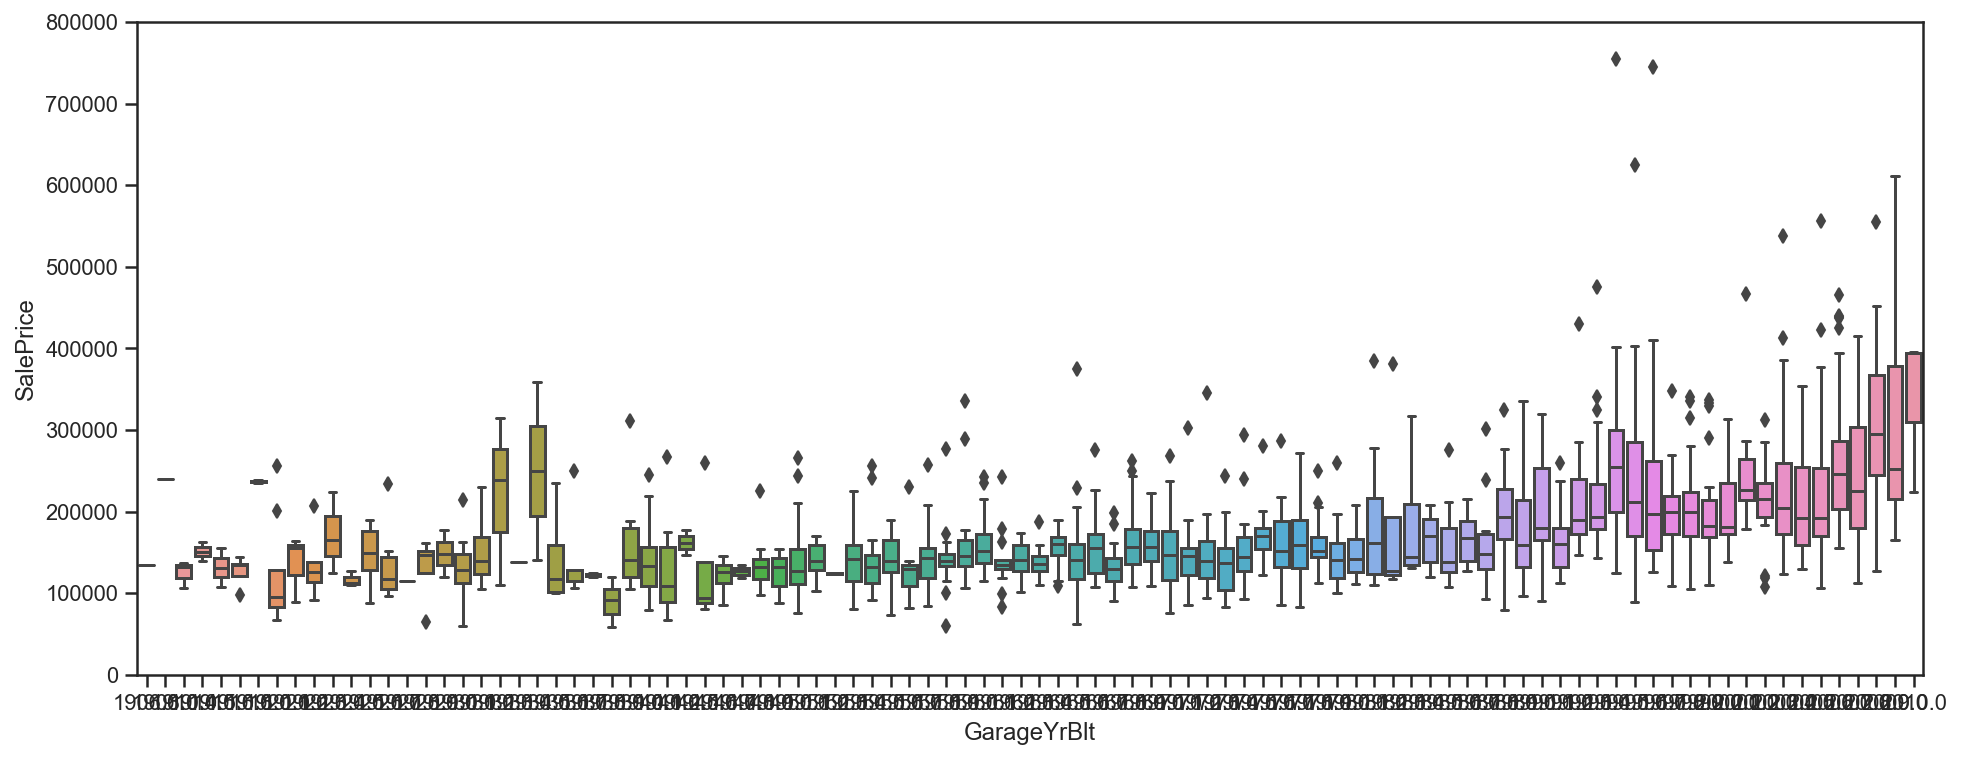

In [55]:
#box plot PoolQC/saleprice
var = 'GarageYrBlt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)


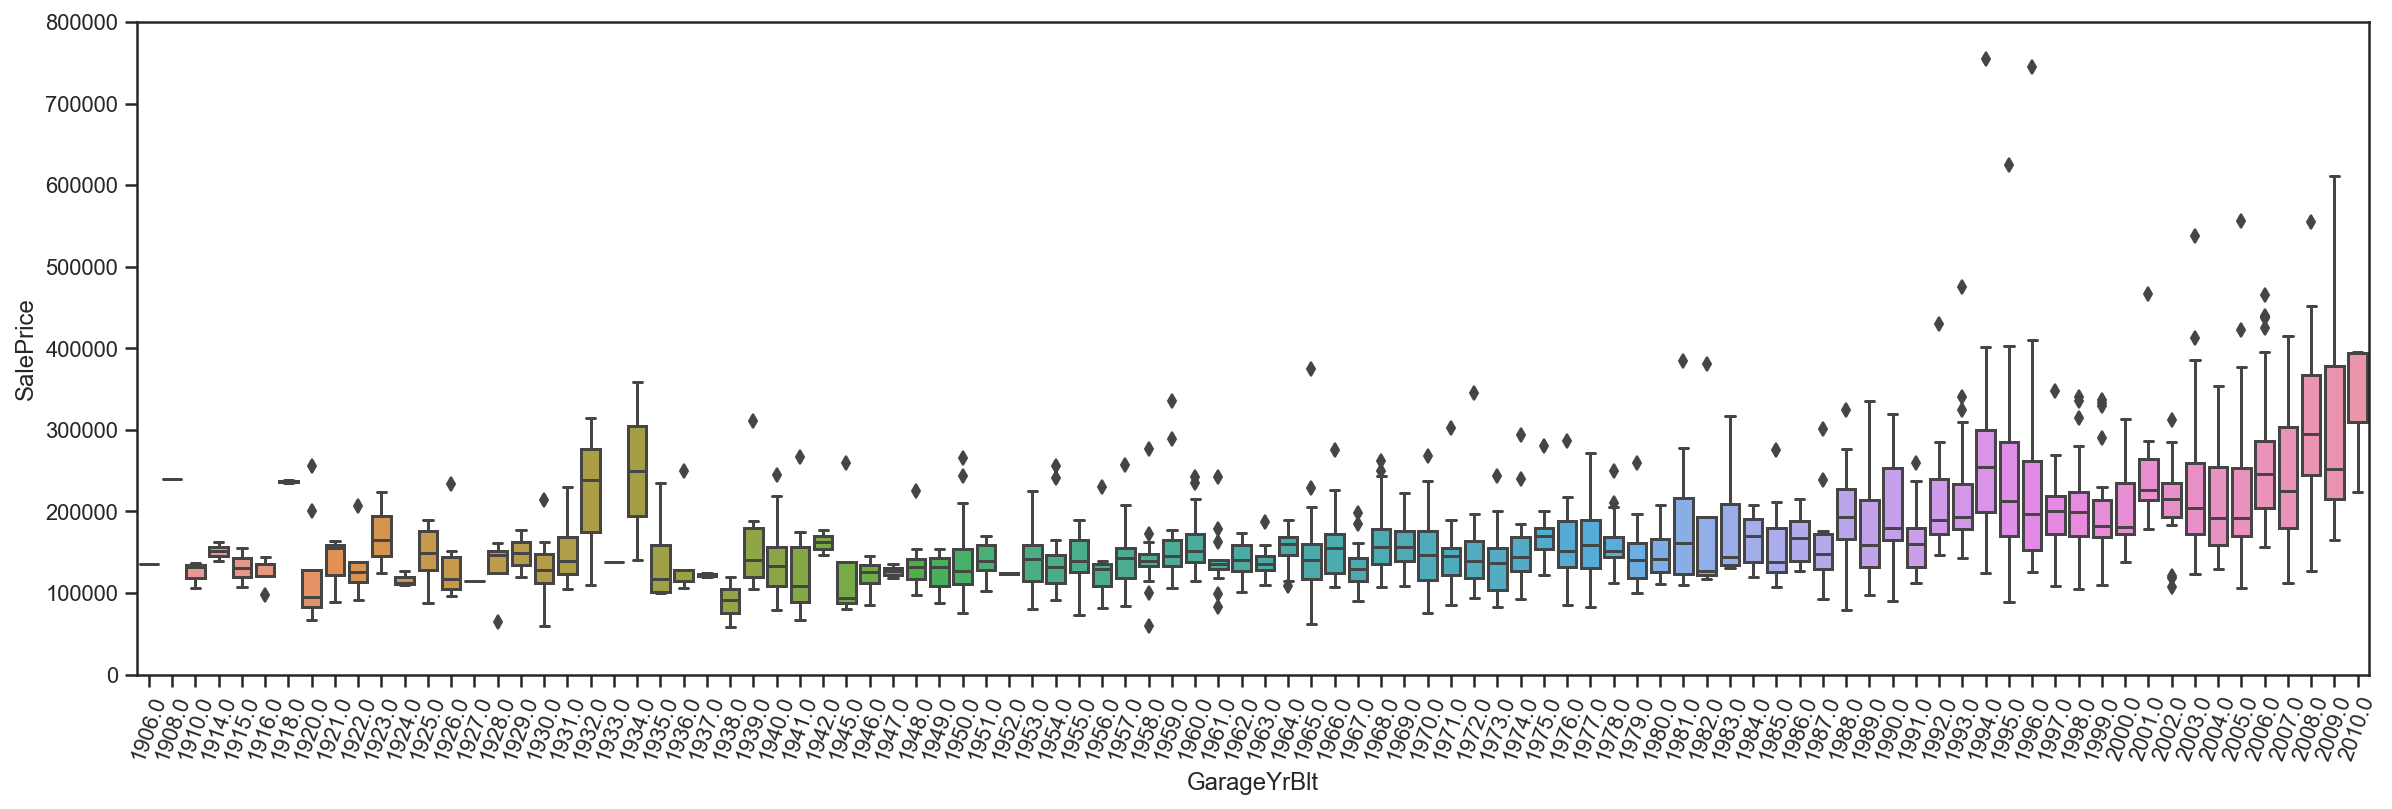

In [56]:
#box plot GarageYrBlt/saleprice
var = 'GarageYrBlt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=70)
plt.show()

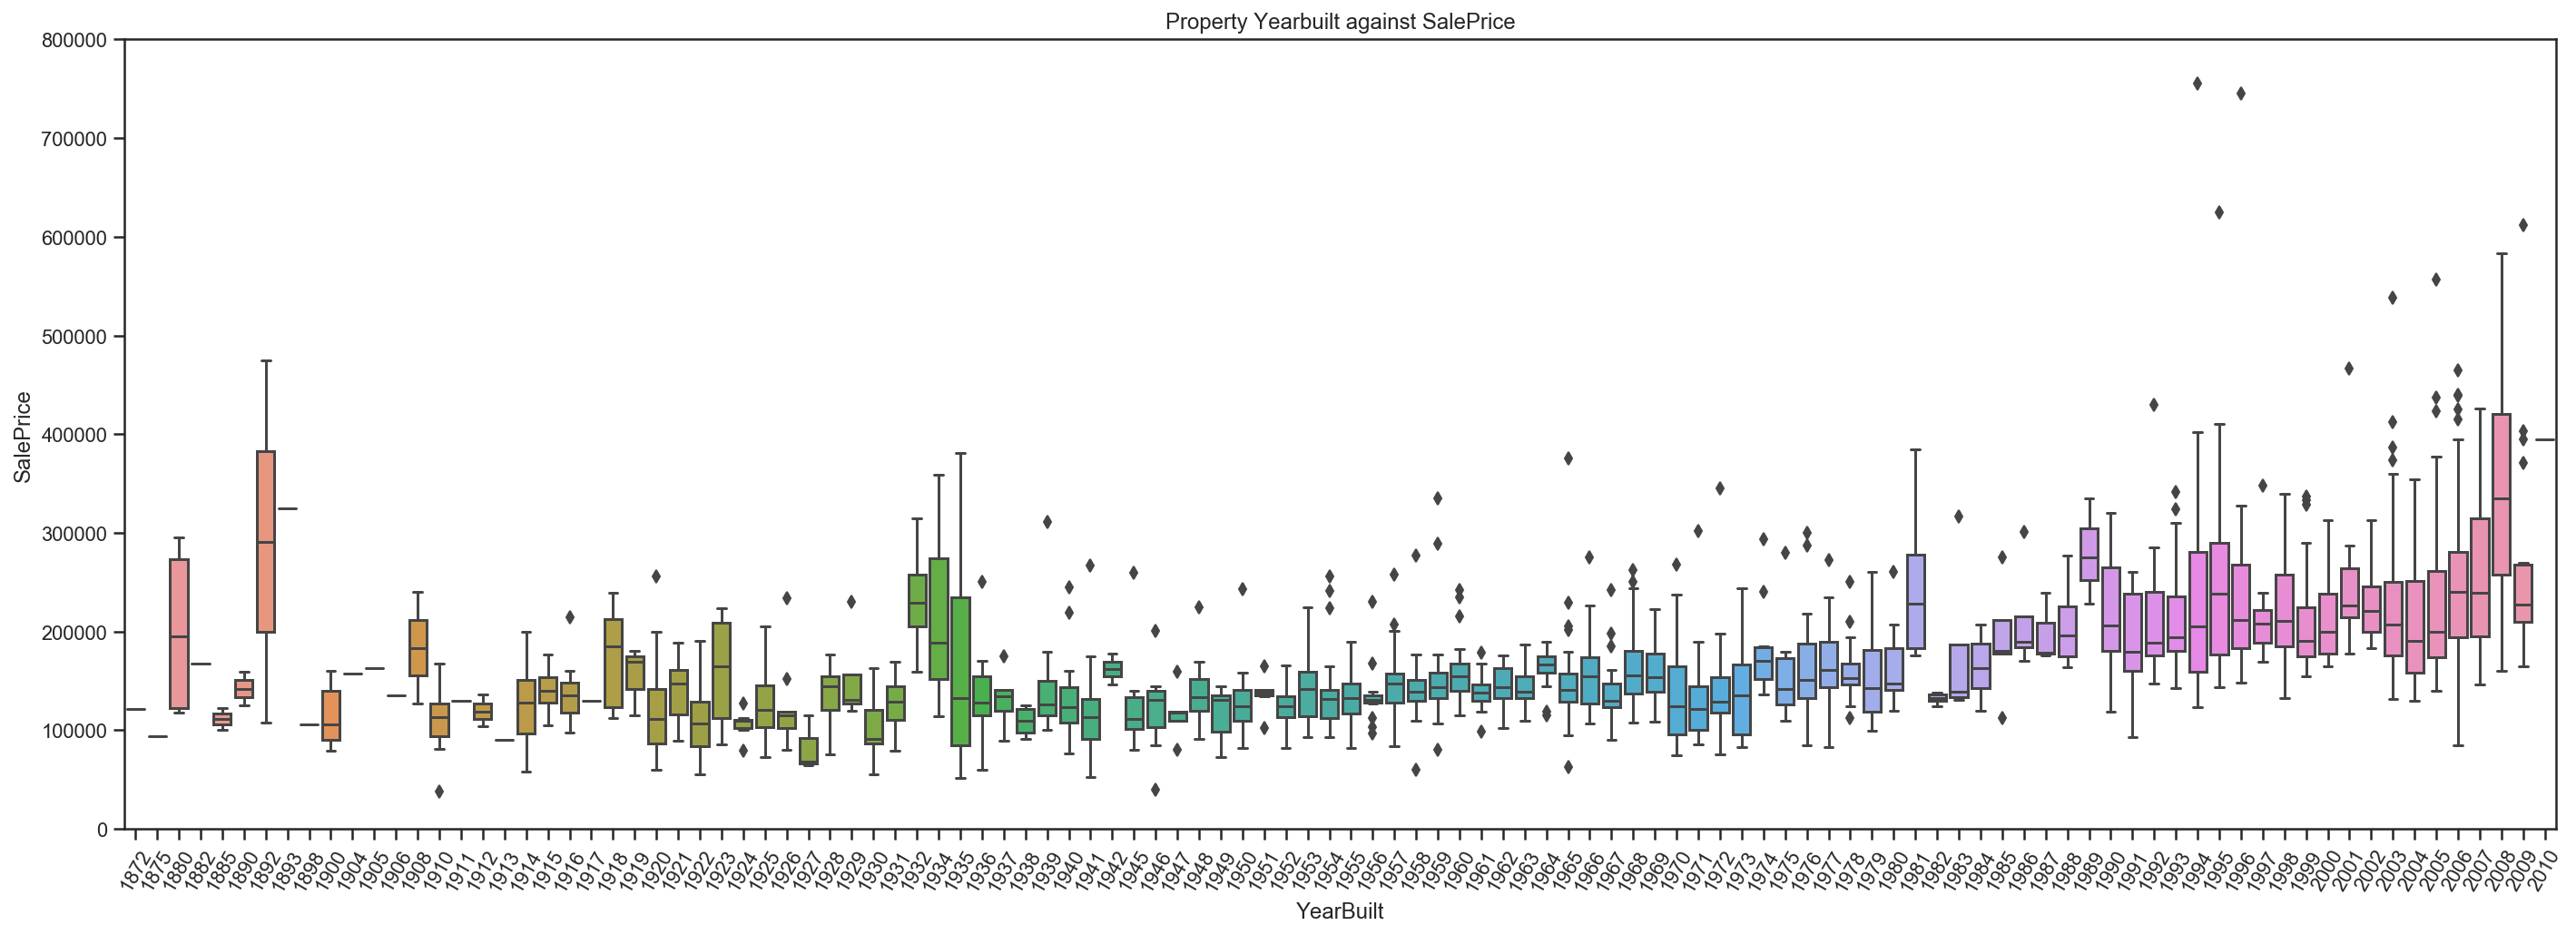

In [57]:
#box plot property yearbuilt/saleprice
var = 'YearBuilt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(24, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.title('Property Yearbuilt against SalePrice')
plt.xticks(rotation=60)
plt.show()

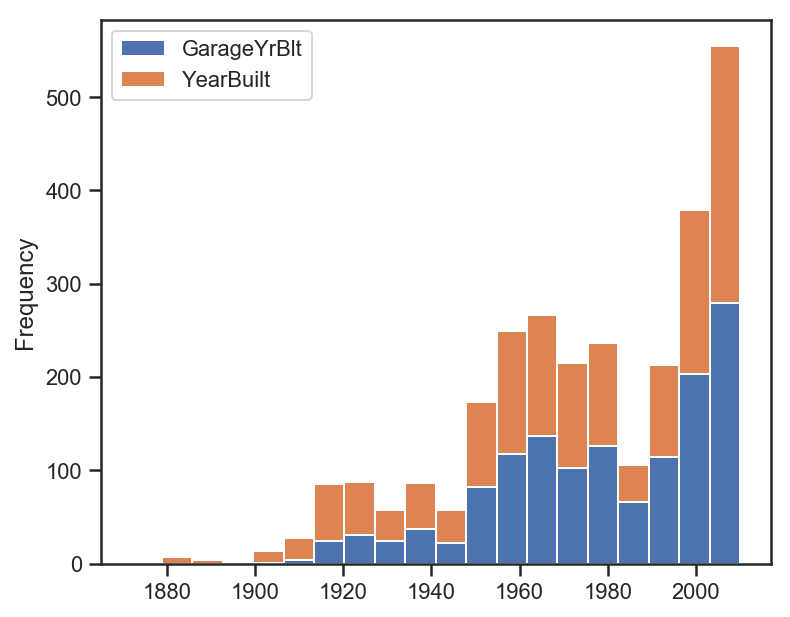

In [58]:
house[['GarageYrBlt','YearBuilt']].plot(kind='hist', bins=20, stacked=True, figsize=(6,5))
plt.show()

# shows that for non missing values of garage year built, it is the same as the year
# the property was built

# sns.set(style="ticks", color_codes=True)
# sns.pairplot(house[['GarageYrBlt','YearBuilt']])

In [59]:
# To deal with the missing values in garage year built:
# drop GarageYrBlt since it is represented by property year built 
# and garage is represented by other garage features 
house.drop('GarageYrBlt', axis=1, inplace=True)

In [60]:
# char_fixed = fixed characteristics 
# char_unfixed = non-fixed characteristics 
# df1 = dataframe with only fixed characteristics without target 'SalePrice'

char_unfixed = ['OverallQual','OverallCond','YearRemodAdd', 
                   'RoofStyle', 'RoofMatl', 'GarageFinish', 'GarageCond', 
                    'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 
                    'Fence', 'MiscFeature', 'MiscVal']

# remove non-house characteristics and target
non_char = ['MoSold', 'SaleType', 'SaleCondition', 'SalePrice']

df_drop = house.drop(non_char, axis=1)

char_fixed = [f for f in df_drop.columns if not f in char_unfixed]

df1 = house[char_fixed]

# y = house.SalePrice.values

In [61]:
house.shape

(1450, 80)

In [62]:
# df_fixed to have (80 - 23 = 57 columns)
df1.shape

(1450, 58)

In [63]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'YearBuilt', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageCars', 'GarageArea', 'GarageQual', 'YrSold'],
      dtype='object')

In [64]:
# Differentiate numerical features and categorical features

categorical_features = df1.select_dtypes(include = ["object"]).columns
numerical_features = df1.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df1_num = df1[numerical_features]
df1_cat = df1[categorical_features]


Numerical features : 25
Categorical features : 33


In [65]:
# pd.get_dummies to categorical features to binary integer columns
# leave out the first of each dummy-coded columns to serve as the "reference" column
df1_cat = pd.get_dummies(df1_cat, drop_first=True)

In [66]:
df1_cat.head(2)

MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NA  Alley_Pave  \
0            0            1            0            1         1           0   
1            0            1            0            1         1           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                     0                    0                     0   
1                     0                    0                     1   

   Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0                 0                1                0                0   
1                 1                0                0                0   

   Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
0                0                0                0                0   
1                0                0                0                0   

   Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  \
0                 0                1                0                0   
1                 0                1                0                0   

   Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  \
0                0                0                0                0   
1                0                0                0                0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0                0               0                0                  0   
1                0               0                0                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                  0                  0                  0                  1   
1                  1                  0                  0                  0   

   HouseStyle_SFoyer  HouseStyle_SLvl  Exterior1st_Asph

In [67]:
df1_cat.shape

(1450, 176)

In [68]:
# Join categorical and numerical features
df1_clean = pd.concat([df1_num, df1_cat], axis = 1)
print("New number of features : " + str(df1_clean.shape[1]))

New number of features : 201


In [69]:
df1_clean.head(1)

Id  MSSubClass  LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  \
0   1          60         65.0     8450       2003       196.0         706   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  YrSold  \
0             1             8           0           2         548    2008   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NA  Alley_Pave  \
0            0            1            0            1         1           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                     0                    0                     0   

   Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0                 0                1                0                0   

   Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
0                0                0                0                0   

   Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  \
0                 0                1                0                0   

   Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  \
0                0                0                0                0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0                0               0                0                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                  0                  0                  0                  1   

   HouseStyle_SFoyer  HouseStyle_SLvl  Exterior1st_AsphShn  \
0                  0                0                    0   

   Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  \
0                    0                    0                   0   

   Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
0                    0                    0                    0   

   Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  \
0                    0                    0                  0   

   Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  \
0                   0                    1                    0   

   Exterior1st_WdShing  Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  \
0           

In [70]:
# X remain as DataFrame type as will need to create subset 
# using yearbuilt column for train/test set
X = df1_clean
y = house.SalePrice.values

In [71]:
# check X & y has same no. of rows
print(X.shape, y.shape)

(1450, 201) (1450,)


In [72]:
# check datatype of X & y
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [73]:
house.YrSold.value_counts()

2009    336
2007    328
2006    312
2008    302
2010    172
Name: YrSold, dtype: int64

In [74]:
house[house.YrSold==2010]
# property sold in 2010 in test set

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
16      17          20       RL          0.0    11241   Pave    NA      IR1   
24      25          20       RL          0.0     8246   Pave    NA      IR1   
26      27          20       RL         60.0     7200   Pave    NA      Reg   
27      28          20       RL         98.0    11478   Pave    NA      Reg   
33      34          20       RL         70.0    10552   Pave    NA      IR1   
38      39          20       RL         68.0     7922   Pave    NA      Reg   
45      46         120       RL         61.0     7658   Pave    NA      Reg   
52      53          90       RM        110.0     8472   Grvl    NA      IR2   
63      64          70       RM         50.0    10300   Pave    NA      IR1   
66      67          20       RL          0.0    19900   Pave    NA      Reg   
68      69          30       RM         47.0     4608   Pave    NA      Reg   
73      74          20       RL         85.0    10200   Pave    NA      Reg   
74      75          50       RM         60.0     5790   Pave    NA      Reg   
78      79          90       RL         72.0    10778   Pave    NA      Reg   
98      99          30       RL         85.0    10625   Pave    NA      Reg   
99     100          20       RL         77.0     9320   Pave    NA      IR1   
100    101          20       RL          0.0    10603   Pave    NA      IR1   
101    102          60       RL         77.0     9206   Pave    NA      Reg   
103    104          20       RL         94.0    10402   Pave    NA      IR1   
109    110          20       RL        105.0    11751   Pave    NA      IR1   
111    112          80       RL          0.0     7750   Pave    NA      IR1   
118    119          60       RL         90.0    12376   Pave    NA      Reg   
140    141          20       RL         70.0    10500   Pave    NA      Reg   
142    143          50       RL         71.0     8520   Pave    NA      Reg   
147    148          60       RL          0.0     9505   Pave    NA      IR1   
157    158          60       RL         92.0    12003   Pave    NA      Reg   
158    159          60       FV        100.0    12552   Pave    NA      Reg   
162    163          20       RL         95.0    12182   Pave    NA      Reg   
171    172          20       RL        141.0    31770   Pave    NA      IR1   
200    201          20       RM         80.0     8546   Pave    NA      Reg   
211    212          20       RL         83.0    10420   Pave    NA      Reg   
214    215          60       RL          0.0    10900   Pave    NA      IR1   
228    229          20       RL         70.0     8521   Pave    NA      Reg   
230    231          20       RL         73.0     8760   Pave    NA      Reg   
233    234          20       RL         75.0    10650   Pave    NA      Reg   
234    235          60       RL          0.0     7851   Pave    NA      Reg   
236    237          20       RL         65.0     8773   Pave    NA      Reg   
237    238          60       RL          0.0     9453   Pave    NA      IR1   
239    240          50       RL         52.0     8741   Pave    NA      Reg   
240    241          20       FV         75.0     9000   Pave    NA      Reg   
244    245          60       RL          0.0     8880   Pave    NA      IR1   
250    251          30       RL         55.0     5350   Pave    NA      IR1   
254    255          20       RL         70.0     8400   Pave    NA      Reg   
263    264          50       RM         50.0     5500   Pave    NA      Reg   
272    273          60       RL         92.0    11764   Pave    NA      IR1   
276    277          20       RL        129.0     9196   Pave    NA      IR1   
277    278          20       RL        140.0    19138   Pave    NA      Reg   
288    289          20       RL          0.0     9819   Pave    NA      IR1   
324    325          80       RL         96.0    11275   Pave    NA      Reg   
340    341          60       RL         85.0    14191   Pa

In [75]:
# Train a model on properties sold pre-2010 and evaluate its performance 
# on the properties sold in 2010.

# Make sure X is a 2D array
# X[df1_clean.YearBuilt == 2010] returns X where bool condition is met
X_train = (X[df1_clean.YrSold < 2010]).values
X_test = (X[df1_clean.YrSold == 2010]).values

y_train = y[df1_clean.YrSold < 2010]
y_test = y[df1_clean.YrSold == 2010]

In [76]:
# check that X_train & y_train are array and NOT DataFrame type 
print(type(X_train),type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [77]:
# check X & y has same no. of rows
print(X_train.shape,y_train.shape)

(1278, 201) (1278,)


In [78]:
# check X & y has same no. of rows
print(X_test.shape,y_test.shape)

(172, 201) (172,)


In [79]:
# # Standardize numerical features only
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# # don't use .values, remain as DataFrame type
# X_train = X[df1_clean.YearBuilt < 2010]
# X_test = X[df1_clean.YearBuilt == 2010]

# # Both methods below return errors
# # X_train.loc[:, numerical_features] = ss.fit_transform(X_train.loc[:, numerical_features])
# # X_test.loc[:, numerical_features] = ss.transform(X_test.loc[:, numerical_features])

# # X_numeric_std = pd.DataFrame(data=ss.fit_transform(X_train[numerical_features]),
# #                              columns=numerical_features)
# # X_train_ss = pd.merge(X_numeric_std, X_train[categorical_features],
# #                  left_index=True, right_index=True)


In [80]:
# Instantiate Linear Regression model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)

# Cross-validate the R2 of an ordinary linear regression model with 10 folds on train set
scores = cross_val_score(lr, X_train, y_train, cv=10)
print(scores,'\n')
print('R2 score: {}'.format(np.mean(scores)))

[0.87508294 0.83192112 0.88087604 0.72630655 0.86396306 0.65479062
 0.83307845 0.81767796 0.54554589 0.86613375] 

R2 score: 0.7895376371656878


In [81]:
# The mean R2 is extremely negative. 6 of the 10 R2 scores are negative in cross-validation.
# The linear regression is performing far worse than the baseline on the testing sets.
# It's probably dramatically overfitting, and the redundant variables are affecting
# the coefficients in unusual ways.

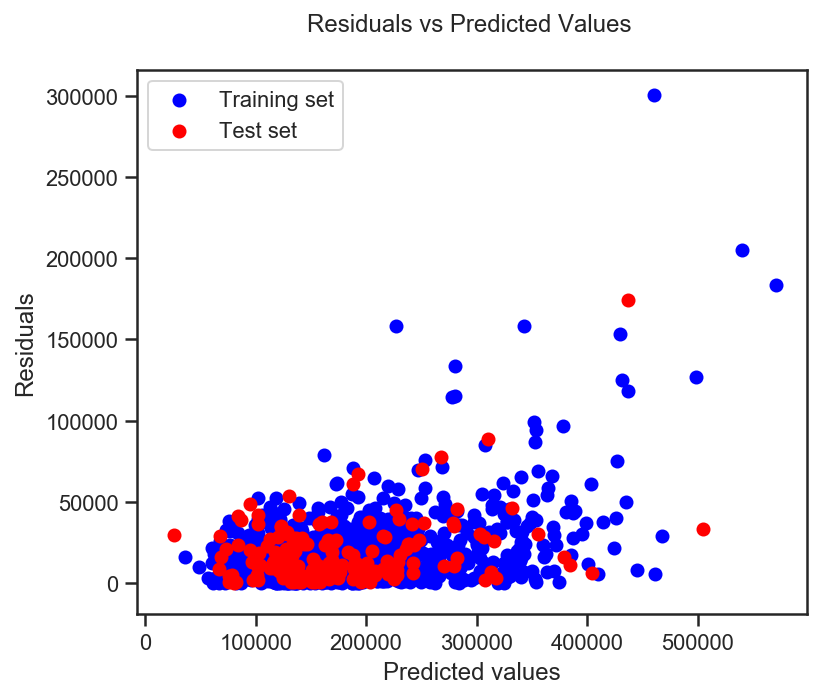

In [82]:
# Look at predictions on training and test set

from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
# Residuals equals the difference between Y-True and Y-Pred:
plt.figure(figsize=(6,5))
plt.scatter(y_train_pred, abs(y_train - y_train_pred), c = "blue", marker='o', label = "Training set")
plt.scatter(y_test_pred, abs(y_test - y_test_pred), c = "red", marker='o', label = "Test set")
plt.title("Residuals vs Predicted Values \n")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

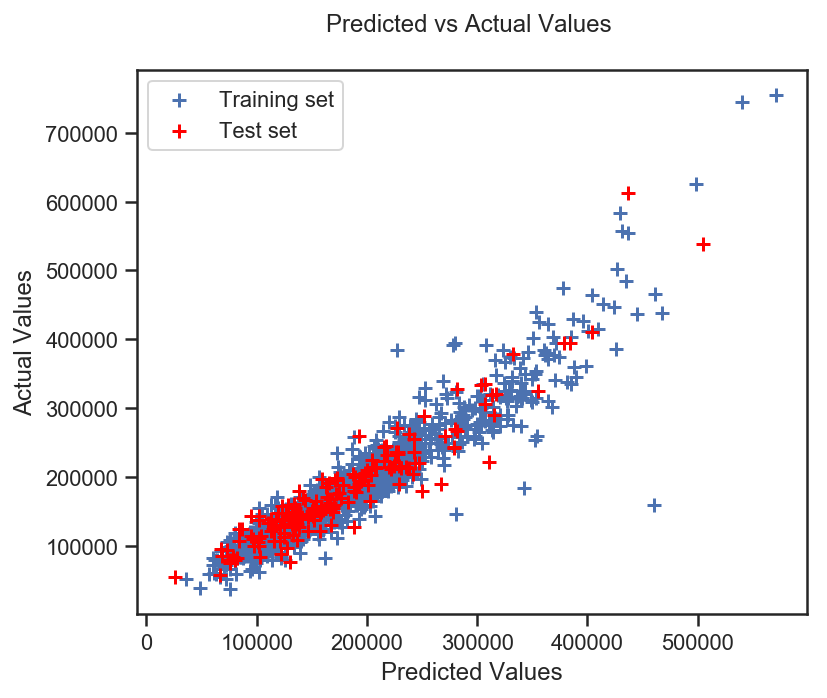

MSE: 686759315.7590709
MSE: 731091281.134552


In [83]:
# Plot predictions

from sklearn.metrics import mean_squared_error

# Predict y value from test set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot the model
plt.figure(figsize=(6,5))
plt.scatter(y_train_pred, y_train, s=50, c='b', marker='+', zorder=10, label = "Training set")
plt.scatter(y_test_pred, y_test, s=50, c='red', marker='+', zorder=10, label = "Test set")
plt.title("Predicted vs Actual Values \n")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend(loc = "best")
plt.show()

print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))

In [84]:
# MSE is very high. Values closer to zero are better.

In [85]:
import statsmodels.api as sm

X1 = X_train
y1 = y_train

# Manually add the intercept column:
X1 = np.concatenate([X1, np.ones((X1.shape[0], 1))], axis=1)

# y target variable comes before the X predictor.
model = sm.OLS(y1, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     45.51
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:21:30   Log-Likelihood:                -14815.
No. Observations:                1278   AIC:                         3.002e+04
Df Residuals:                    1084   BIC:                         3.102e+04
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2669      2.064     -1.098      0.272      -6.318       1.784
x2          -153.9299    107.031     -1.438      0.151    -363.941      56.081
x3           -42.9745     29.628     -1.450      0.147    -101.109      15.160
x4             0.5938      0.130      4.563      0.000       0.338       0.849
x5            52.1585     94.261      0.553      0.580    -132.795     237.112
x6            16.3656      7.403      2.211      0.027       1.839      30.892
x7            -3.6784      3.693     -0.996      0.319     -10.924       3.567
x8             4.2678      8.197      0.521      0.603     -11.817      20.352
x9            -2.5014      3.749     -0.667      0.505      -9.858       4.855
x10           -1.9121      5.110     -0.374      0.708     -11.938       8.114
x11           17.3887      8.063      2.157      0.031       1.568      33.209
x12           30.7791      7.252      4.244      0.000      16.549      45.009
x13           -8.1993     17.825     -0.460      0.646     -43.175      26.777
x14           39.9685      7.143      5.595      0.000      25.952      53.985
x15         6184.3053   2605.379      2.374      0.018    1072.149    1.13e+04
x16         5465.6499   3829.581      1.427      0.154   -2048.581     1.3e+04
x17         8344.4258   2893.655      2.884      0.004    2666.626     1.4e+04
x18         4603.9713   2774.931      1.659      0.097    -840.874       1e+04
x19        -2911.2299   1801.151     -1.616      0.106   -6445.367     622.907
x20        -1.397e+04   7263.015     -1.923      0.055   -2.82e+04     285.063
x21         1068.6205   1249.807      0.855      0.393   -1383.694    3520.935
x22         4578.6401   3389.600      1.351      0.177   -2072.279    1.12e+04
x23          1.39e+04   2949.442      4.714      0.000    8115.885    1.97e+04
x24           -9.4895     10.055     -0.944      0.345     -29.218      10.239
x25        -1176.6640    777.405     -1.514      0.130   -2702.053     348.725
x26        -3514.9160   1.19e+04     -0.296      0.767   -2.68e+04    1.98e+04
x27        -4354.6393   8654.748     -0.503      0.615   -2.13e+04    1.26e+04
x28        -2877.8895   9834.934     -0.293      0.770   -2.22e+04    1.64e+04
x29         1.624e+04   1.96e+04      0.827      0.409   -2.23e+04    5.48e+04
x30         -708.3834   5396.308     -0.131      0.896   -1.13e+04    9880.008
x31         6253.5504   7823.662      0.799      0.424   -9097.686    2.16e+04
x32         5479.5097   5631.881      0.973      0.331   -5571.113    1.65e+04
x33        -3.841e+04   1.09e+04     -3.532      0.000   -5.97e+04   -1.71e+04
x34         2200.7498   2161.960      1.018      0.309   -2041.351    6442.851
x35         1.903e+04   6639.786      2.866      0.004    6003.297    3.21e+04
x36          1.23e+04   8615.637      1.428      0.154   -4600.364    2.92e+04
x3

In [86]:
# R2 score is 0.89
# Approximately 89% of the response variable is explained by the linear model
# (Independent Variables).

In [87]:
# Linear Regression using RidgeCV on training set to handle multicollinearity of features 

from sklearn.linear_model import RidgeCV

ridge_alphas = np.logspace(-2, 7, 50)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

8.685113737513529


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [88]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=optimal_ridge.alpha_)
# previously fit optimal_ridge.fit(X_train, y_train)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.89681513 0.86601913 0.88272313 0.72645773 0.86576605 0.85799516
 0.87722058 0.84255643 0.55430982 0.88954792]
0.8259411086195522


In [89]:
# It's vastly better than the linear regression. 
# There's likely so much multicollinearity in the data that linear regression
# overfits and has bogus coefficients on predictors. Ridge is 
# able to manage the multicollinearity and get a good out-of-sample result.

In [90]:
# Look at the coefficients for variables in the ridge.
ridge.fit(X_train, y_train)

X = df1_clean

ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(20)

variable          coef      abs_coef
58   Neighborhood_NoRidge  32701.637833  32701.637833
65   Neighborhood_StoneBr  32507.163120  32507.163120
59   Neighborhood_NridgHt  27659.420643  27659.420643
79        Condition2_PosN -25810.678893  25810.678893
178        KitchenQual_TA -25515.899041  25515.899041
139           BsmtQual_Gd -24094.141405  24094.141405
141           BsmtQual_TA -22461.360317  22461.360317
177        KitchenQual_Gd -22190.678621  22190.678621
128          ExterQual_TA -21382.417455  21382.417455
176        KitchenQual_Fa -21101.072029  21101.072029
50   Neighborhood_Edwards -19407.621333  19407.621333
184        Functional_Typ  17859.524682  17859.524682
138           BsmtQual_Fa -16663.803653  16663.803653
146       BsmtExposure_Gd  16490.495080  16490.495080
32           LotShape_IR3 -16455.362517  16455.362517
54   Neighborhood_Mitchel -15665.501107  15665.501107
96    Exterior1st_BrkFace  14918.553047  14918.553047
34        LandContour_HLS  14793.586304  14793.586304
196         GarageQual_Fa -14481.137173  14481.137173
49   Neighborhood_Crawfor  14139.747960  14139.747960

In [91]:
ridge_coefs2 = ridge_coefs[['variable','coef']]
ridge_coefs2.set_index('variable',inplace=True)
ridge_coefs2.head(20)

coef
variable                          
Neighborhood_NoRidge  32701.637833
Neighborhood_StoneBr  32507.163120
Neighborhood_NridgHt  27659.420643
Condition2_PosN      -25810.678893
KitchenQual_TA       -25515.899041
BsmtQual_Gd          -24094.141405
BsmtQual_TA          -22461.360317
KitchenQual_Gd       -22190.678621
ExterQual_TA         -21382.417455
KitchenQual_Fa       -21101.072029
Neighborhood_Edwards -19407.621333
Functional_Typ        17859.524682
BsmtQual_Fa          -16663.803653
BsmtExposure_Gd       16490.495080
LotShape_IR3         -16455.362517
Neighborhood_Mitchel -15665.501107
Exterior1st_BrkFace   14918.553047
LandContour_HLS       14793.586304
GarageQual_Fa        -14481.137173
Neighborhood_Crawfor  14139.747960

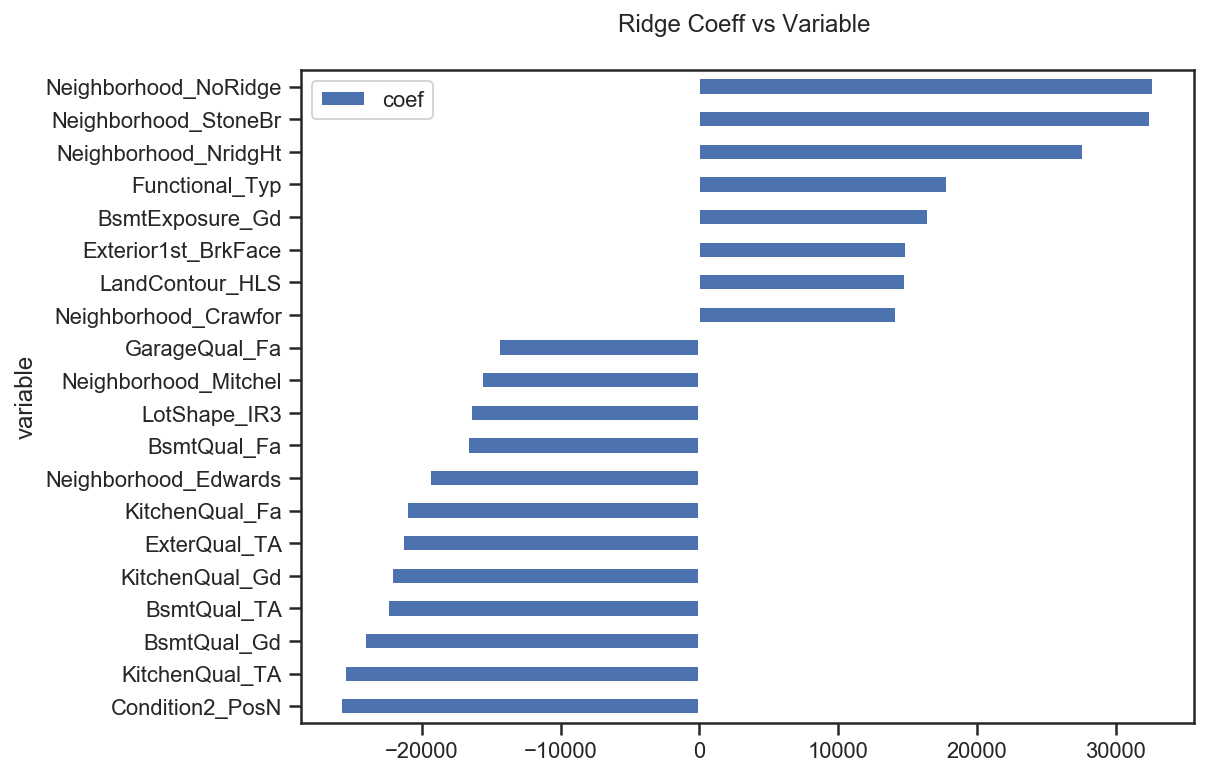

In [92]:
ridge_coefs2.head(20).sort_values('coef').plot(
    kind='barh', title='Ridge Coeff vs Variable \n', figsize=(8,6))

In [93]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1450.000000  1450.000000   1450.00000    1450.000000  1450.000000   
mean    731.364138    56.903448     57.54000   10523.831724     6.114483   
std     421.554345    42.265033     34.71992   10012.185355     1.372860   
min       1.000000    20.000000      0.00000    1300.000000     1.000000   
25%     366.250000    20.000000     41.25000    7544.500000     5.000000   
50%     731.500000    50.000000     63.00000    9496.000000     6.000000   
75%    1096.750000    70.000000     79.00000   11613.500000     7.000000   
max    1460.000000   190.000000    313.00000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1450.000000  1450.000000   1450.000000  1450.000000  1450.000000   
mean      5.582069  1971.593103   1985.049655   103.828276   445.162759   
std       1.107330    30.022696     20.552319   181.150114   456.353871   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   384.000000   
75%       6.000000  2001.000000   2004.000000   166.000000   713.750000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1450.000000  1450.000000  1450.000000  1450.000000  1450.000000   
mean     46.870345   567.375862  1059.408966  1164.773103   347.394483   
std     161.828458   442.584978   439.207322   386.646095   437.094261   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   796.000000   882.500000     0.000000   
50%       0.000000   475.000000   992.000000  1088.000000     0.000000   
75%       0.000000   808.000000  1301.500000  1392.000000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1450.000000  1450.000000   1450.000000   1450.000000  1450.000000   
mean       5.531034  1517.698621      0.427586      0.057241     1.568966   
std       46.932966   525.154207      0.519394      0.238249     0.549549   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1131.250000      0.000000      0.000000     1.000000   
50%        0.000000  1466.000000      0.000000      0.000000     2.000000   
75%        0.000000  1779.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1450.000000   1450.000000   1450.000000   1450.000000  1450.000000   
mean      0.384828      2.870345      1.046207      6.522069     0.616552   
std       0.503450      0.814645      0.219643      1.625324     0.644991   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1450.000000  1450.000000  1450.000000  1450.000000    1450.000000   
mean      1.770345   473.277931    94.826897    46.537931      21.536552   
std       0.745136   212.687621   125.560863    65.222761      60.838826   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   336.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.00

In [94]:
# Listed above are the top 20 features to estimate the price of a property

# Explanation of relationship of coeff to price:
# Per unit change in the numerical features(n) will change the property price (y) 
# by the coeff value.

# n1) additional 1 sqft above ground living area: y will increase by $10322 
# n2) additional 1 sqft at First Floor: y will increase by $6945
# n3) additional 1 sqft at Second floor: y will increase by $6257
# n4) additional space to fit 1 more car in garage: y will increase by $5929

# If a property has these fixed categorical characteristics(c), 
# property price (y) will increase by:
# c1) located at Northridge Heights: y will increase by $7642
# c2) located at Stone Brook: y will increase by $5203
# c3) Good Exposure of walkout or garden level walls: y will increase by $4843
    
# etc.

In [95]:
# Linear Regression using LassoCV on training set to eliminate features 
# that aren't useful

from sklearn.linear_model import LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print(optimal_lasso.score(X_train, y_train))
print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.7058532360009292
211782.48476970065


..............................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


In [96]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=optimal_lasso.alpha_)
# previously fit optimal_lasso.fit(X_train, y_train)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.77647042 0.78704089 0.80164972 0.63012075 0.73172011 0.76128308
 0.75266137 0.73088904 0.23999489 0.76358448]
0.6975414748617542


In [97]:
# The lasso performs similarly but slightly worse than the ridge.
# Lasso deals primarily with the feature selection of valuable variables,
# eliminating ones that aren't useful.
# It may have gotten rid of some useful features.

In [98]:
# Look at the coefficients for variables in the lasso.
lasso.fit(X_train, y_train)

Lasso(alpha=211782.48476970065, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
X = df1_clean

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

variable        coef    abs_coef
4            YearBuilt  355.416174  355.416174
23          GarageArea   72.762050   72.762050
13           GrLivArea   66.287814   66.287814
5           MasVnrArea   33.473897   33.473897
9          TotalBsmtSF   31.167955   31.167955
6           BsmtFinSF1   10.499586   10.499586
0                   Id   -3.832747    3.832747
11            2ndFlrSF    1.675891    1.675891
3              LotArea    0.293856    0.293856
132       ExterCond_TA    0.000000    0.000000
133  Foundation_CBlock   -0.000000    0.000000
140        BsmtQual_NA   -0.000000    0.000000
134   Foundation_PConc    0.000000    0.000000
135    Foundation_Slab   -0.000000    0.000000
136   Foundation_Stone   -0.000000    0.000000
137    Foundation_Wood   -0.000000    0.000000
131       ExterCond_Po    0.000000    0.000000
138        BsmtQual_Fa   -0.000000    0.000000
139        BsmtQual_Gd    0.000000    0.000000
144        BsmtCond_Po   -0.000000    0.000000

In [100]:
lasso_coefs2 = lasso_coefs[['variable','coef']]
lasso_coefs2.set_index('variable',inplace=True)
lasso_coefs2.head(20)

coef
variable                     
YearBuilt          355.416174
GarageArea          72.762050
GrLivArea           66.287814
MasVnrArea          33.473897
TotalBsmtSF         31.167955
BsmtFinSF1          10.499586
Id                  -3.832747
2ndFlrSF             1.675891
LotArea              0.293856
ExterCond_TA         0.000000
Foundation_CBlock   -0.000000
BsmtQual_NA         -0.000000
Foundation_PConc     0.000000
Foundation_Slab     -0.000000
Foundation_Stone    -0.000000
Foundation_Wood     -0.000000
ExterCond_Po         0.000000
BsmtQual_Fa         -0.000000
BsmtQual_Gd          0.000000
BsmtCond_Po         -0.000000

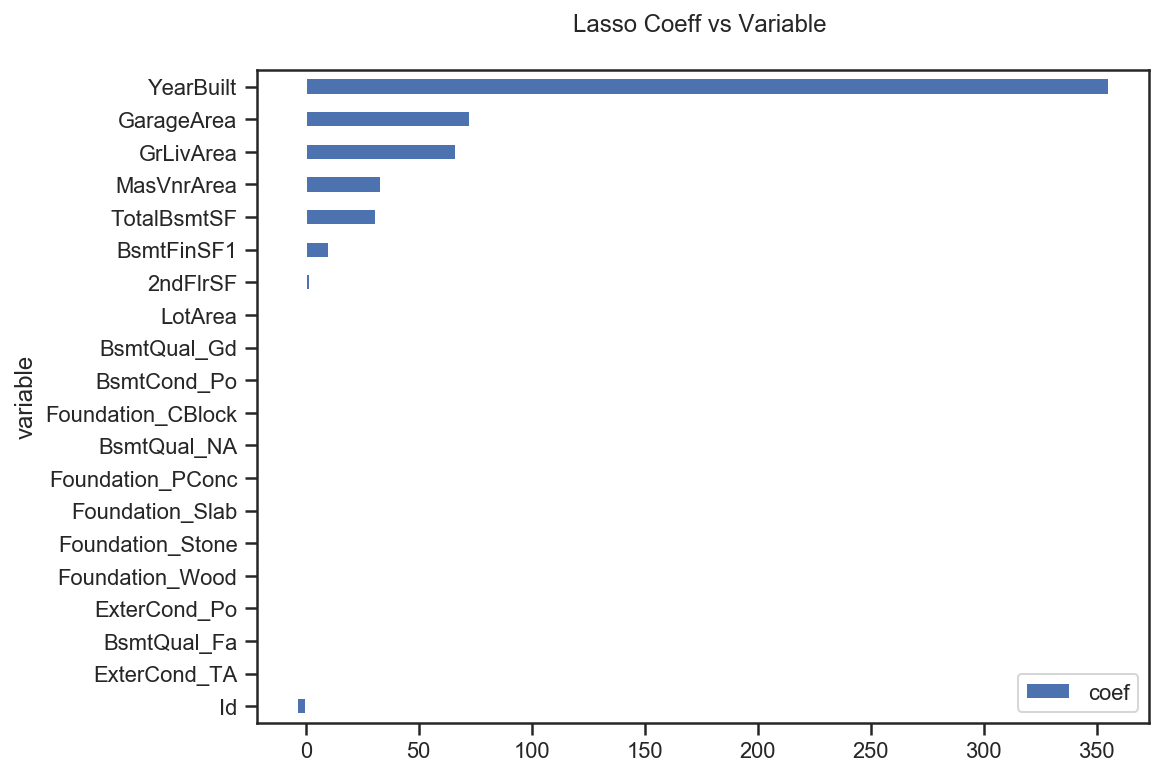

In [101]:
lasso_coefs2.head(20).sort_values('coef').plot(
    kind='barh', title='Lasso Coeff vs Variable \n', figsize=(8,6))

In [102]:
# Listed above are the top 20 features to estimate the price of a property

# Explanation of relationship of coeff to price:
# Per unit change in these numerical features(n) will raise the property price (y) 
# by the coeff value.

# n1) additional 1 sqft above ground living area: y will increase by $29657
# n2) additional 1 sqft increase in lot size : y will increase by $4337
# n3) additional space to fit 1 more car in garage: y will increase by $8750

# If a property has these fixed categorical characteristics(c), 
# property price (y) will increase by:
# c1) located at Northridge Heights: y will increase by $9271
# c2) located at Stone Brook: y will increase by $6494
# c3) Good Exposure of walkout or garden level walls: y will increase by $5973
    
# etc.

In [103]:
# to find number of variables where coef are zeroed out
np.sum(lasso.coef_==0)

192

In [104]:
print('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(len(lasso.coef_)))

Percent variables zeroed out: 0.9552238805970149


In [105]:
# almost 45% of variables / predictors are zeroed out using lasso

In [106]:
# elastic net regression

from sklearn.linear_model import ElasticNetCV
# need to find optimal l1_ratios for ElasticNet
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=30, cv=10)
optimal_enet.fit(X_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

211782.48476970065
1.0


In [107]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
# previously fit optimal_enet.fit(X_train, y_train)
enet_scores = cross_val_score(enet, X_train, y_train, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.77647042 0.78704089 0.80164972 0.63012075 0.73172011 0.76128308
 0.75266137 0.73088904 0.23999489 0.76358448]
0.6975414748617542


In [108]:
# ElasticNet performs about the same as lasso, which is to be expected given the
# l1_ration approaching 1 (full lasso).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [109]:
# Plot of various levels of quality vs saleprice.
house.groupby('OverallQual')['SalePrice'].describe()

count           mean            std       min       25%  \
OverallQual                                                            
1              2.0   50150.000000   15344.217152   39300.0   44725.0   
2              2.0   60000.000000       0.000000   60000.0   60000.0   
3             18.0   87970.833333   26041.262860   37900.0   73500.0   
4            111.0  110114.594595   27769.006606   52500.0   89735.5   
5            396.0  133719.131313   26859.106956   60000.0  118375.0   
6            373.0  161677.305630   36110.027156   76000.0  139500.0   
7            319.0  207716.423197   44466.259414   82500.0  179470.0   
8            168.0  274735.535714   63898.902253  122000.0  234557.5   
9             43.0  367513.023256   81278.174849  239000.0  318980.5   
10            18.0  438588.388889  159785.491058  160000.0  349375.0   

                  50%       75%       max  
OverallQual                                
1             50150.0   55575.0   61000.0  
2             60000.0   60000.0   60000.0  
3             89250.0  102500.0  139600.0  
4            108959.0  126750.0  256000.0  
5            133000.0  147000.0  228950.0  
6            160000.0  181000.0  277000.0  
7            200141.0  230750.0  383970.0  
8            269750.0  306250.0  538000.0  
9            345000.0  389716.0  611657.0  
10           432390.0  472875.0  755000.0

In [110]:
house_qual = house.groupby('OverallQual')['SalePrice'].mean().sort_values()
house_qual = house_qual.to_frame()
house_qual

SalePrice
OverallQual               
1             50150.000000
2             60000.000000
3             87970.833333
4            110114.594595
5            133719.131313
6            161677.305630
7            207716.423197
8            274735.535714
9            367513.023256
10           438588.388889

In [111]:
house_qual.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='OverallQual')

In [112]:
new_axis = ['Very Excellent', 'Excellent', 'Very Good', 'Good', 
 'Above Average', 'Average', 'Below Average', 'Fair', 'Poor', 'Very Poor']
new_axis.reverse()
print(new_axis)

['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent']


In [113]:
house_qual['Quality']=new_axis

In [114]:
house_qual

SalePrice         Quality
OverallQual                               
1             50150.000000       Very Poor
2             60000.000000            Poor
3             87970.833333            Fair
4            110114.594595   Below Average
5            133719.131313         Average
6            161677.305630   Above Average
7            207716.423197            Good
8            274735.535714       Very Good
9            367513.023256       Excellent
10           438588.388889  Very Excellent

In [115]:
house_qual=house_qual.set_index('Quality')

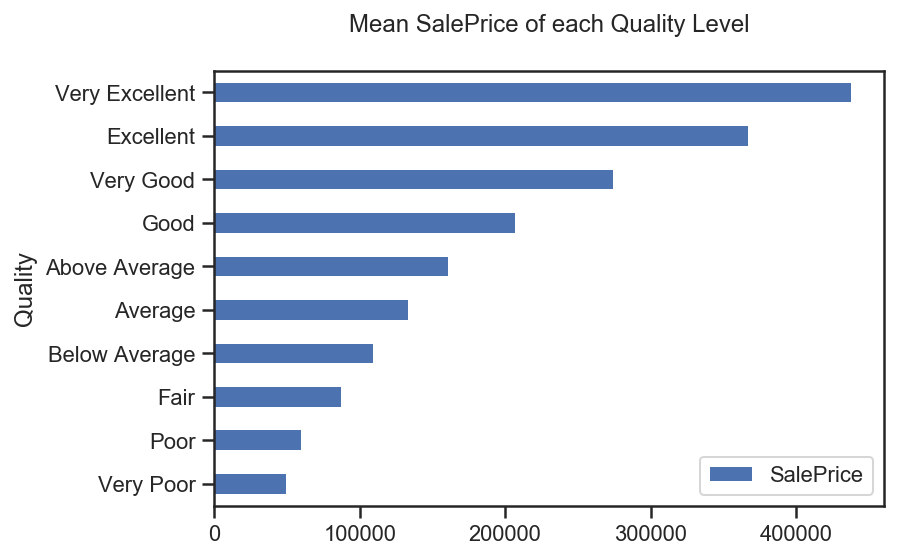

In [116]:
house_qual.plot(kind='barh',title='Mean SalePrice of each Quality Level\n')

In [117]:
# Price goes up when the overall material and finish of the house is of higher quality

In [118]:
house['OverallCond'].unique()

array([5, 8, 6, 7, 4, 3, 9, 2, 1])

In [119]:
# Plot of various condition type vs saleprice.

house.groupby('OverallCond')['SalePrice'].describe()

count           mean            std       min       25%  \
OverallCond                                                            
1              1.0   61000.000000            NaN   61000.0   61000.0   
2              4.0  156233.000000  159009.277998   67000.0   74125.0   
3             24.0  104705.166667   43568.523308   39300.0   79000.0   
4             54.0  123622.055556   37254.070269   52500.0   93125.0   
5            819.0  203532.019536   84861.334122   55000.0  144000.0   
6            250.0  154225.684000   60897.965028   37900.0  124600.0   
7            204.0  158416.906863   53457.963634   79900.0  124250.0   
8             72.0  155651.736111   52375.144681   84500.0  125375.0   
9             22.0  216004.545455   96485.974689  110500.0  143500.0   

                  50%       75%       max  
OverallCond                                
1             61000.0   61000.0   61000.0  
2             81750.0  163858.0  394432.0  
3             90500.0  135725.0  200624.0  
4            117750.0  147875.0  235000.0  
5            185500.0  239742.5  745000.0  
6            143000.0  172625.0  755000.0  
7            145000.0  178000.0  402000.0  
8            142500.0  170750.0  335000.0  
9            176200.0  287875.0  475000.0

In [120]:
house_cond = house.groupby('OverallCond')['SalePrice'].mean()
house_cond = house_cond.to_frame()
house_cond

SalePrice
OverallCond               
1             61000.000000
2            156233.000000
3            104705.166667
4            123622.055556
5            203532.019536
6            154225.684000
7            158416.906863
8            155651.736111
9            216004.545455

In [121]:
new_axis2 = [ 'Excellent', 'Very Good', 'Good', 
 'Above Average', 'Average', 'Below Average', 'Fair', 'Poor', 'Very Poor']
new_axis2.reverse()
print(new_axis2)

['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent']


In [122]:
house_cond['Condition']=new_axis2
house_cond = house_cond.set_index('Condition')

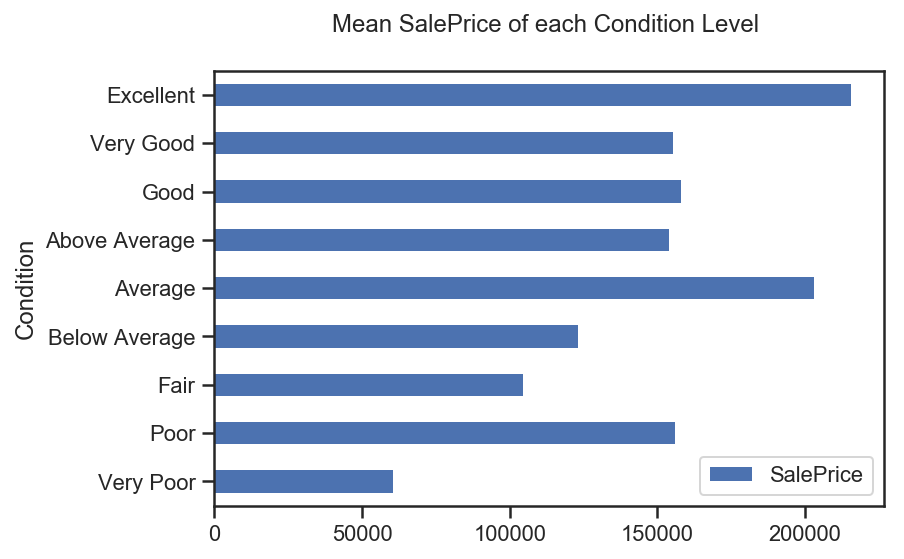

In [123]:
house_cond.plot(kind='barh',title='Mean SalePrice of each Condition Level \n')

In [124]:
# Some outliers exist for properties with Poor and Average overall condition
# Price goes up when the overall material and finish of the house is of higher quality

In [125]:
# char_unfixed = renovate-able characteristics

char_unfixed = ['OverallQual','OverallCond','YearRemodAdd', 
                   'RoofStyle', 'RoofMatl', 'GarageFinish', 'GarageCond', 
                    'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 
                    'Fence', 'MiscFeature', 'MiscVal']

# include year sold to create train / test sets
df2 = house[char_unfixed + ['YrSold']]


# These features only have an R2 score of lower than 0.5 using linear regression models
# char_reno = ['RoofStyle', 'RoofMatl', 'GarageFinish', 'GarageCond', 
#             'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
#             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 
#             'Fence', 'MiscFeature', 'MiscVal']

In [126]:
df2.columns

Index(['OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'GarageFinish', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'YrSold'],
      dtype='object')

In [127]:
# check relationship of price with renovate-able characteristics

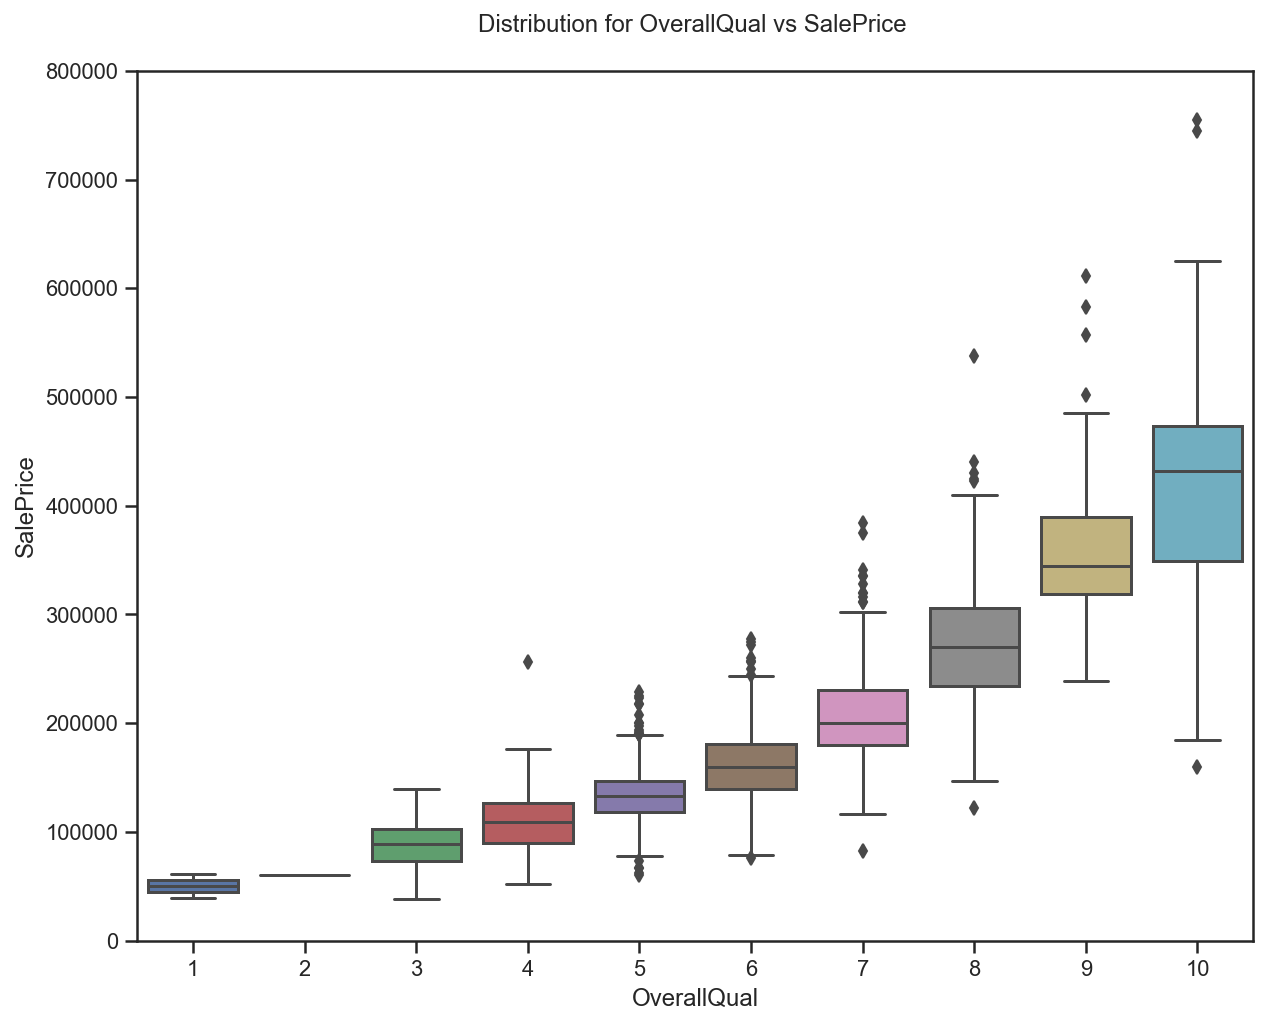

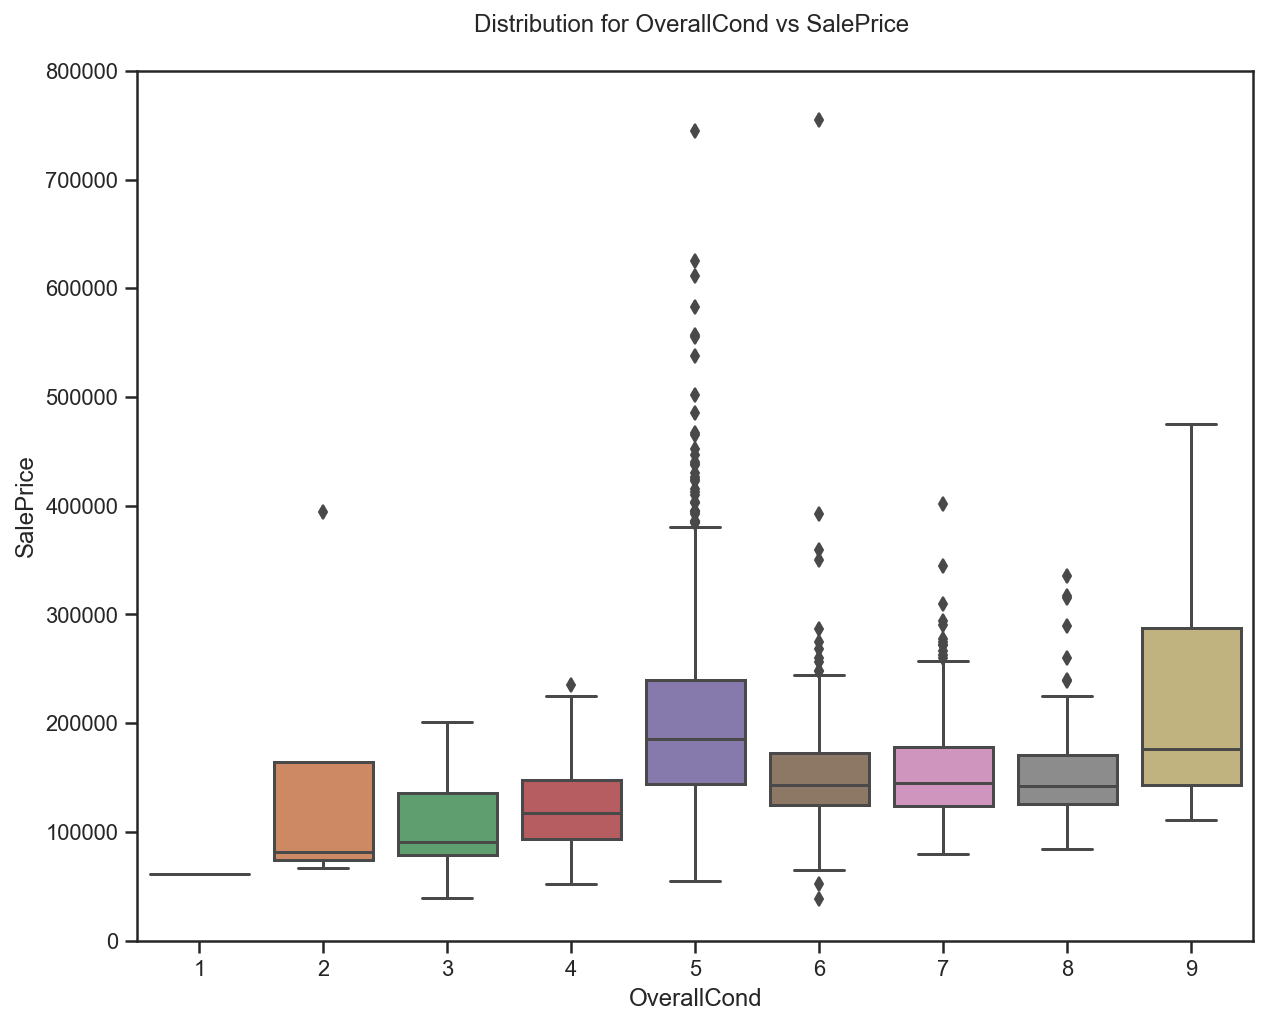

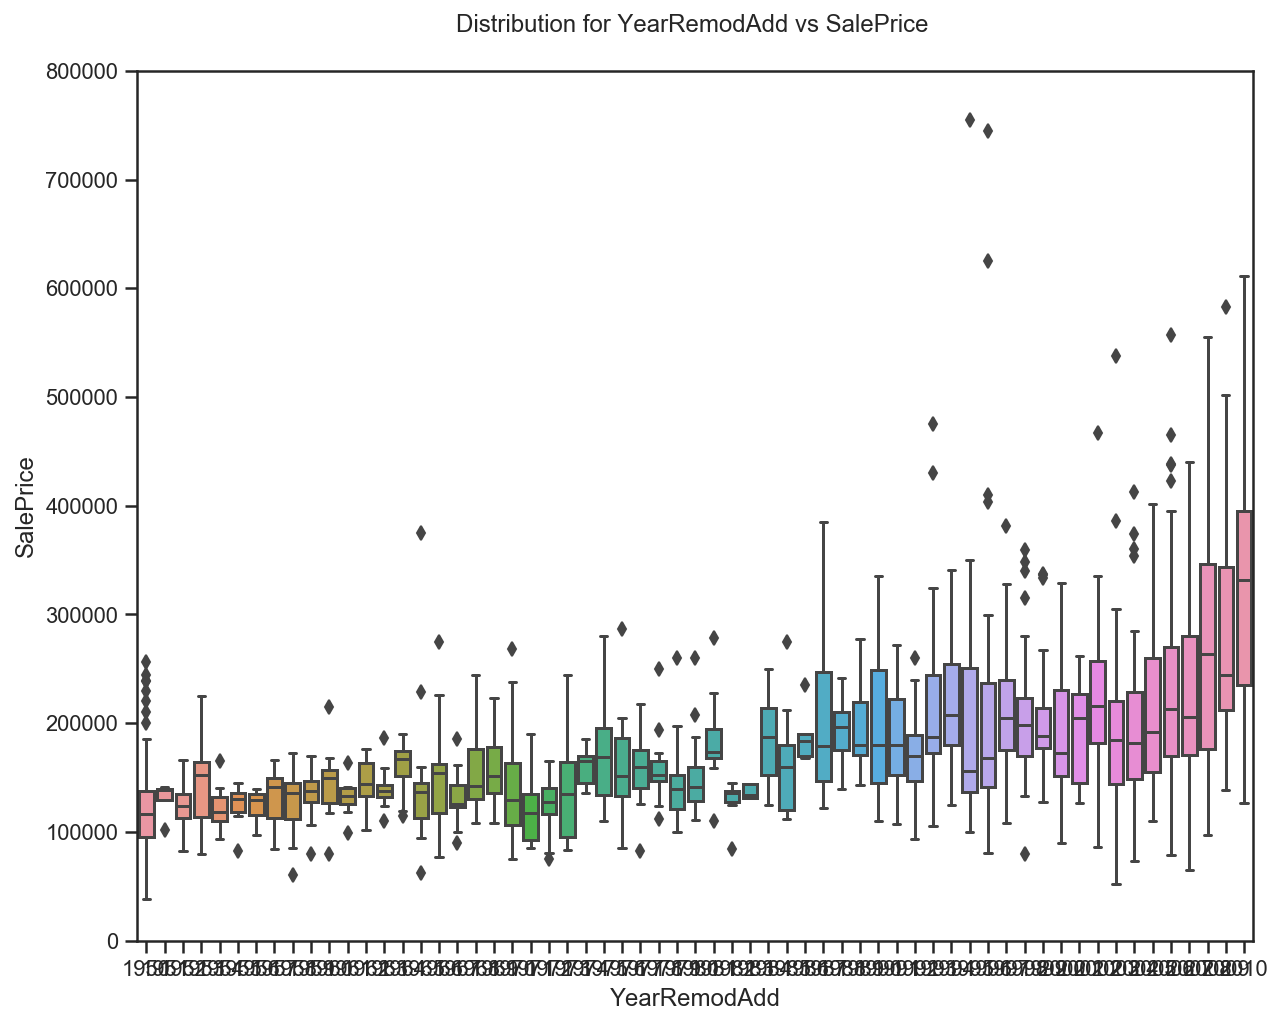

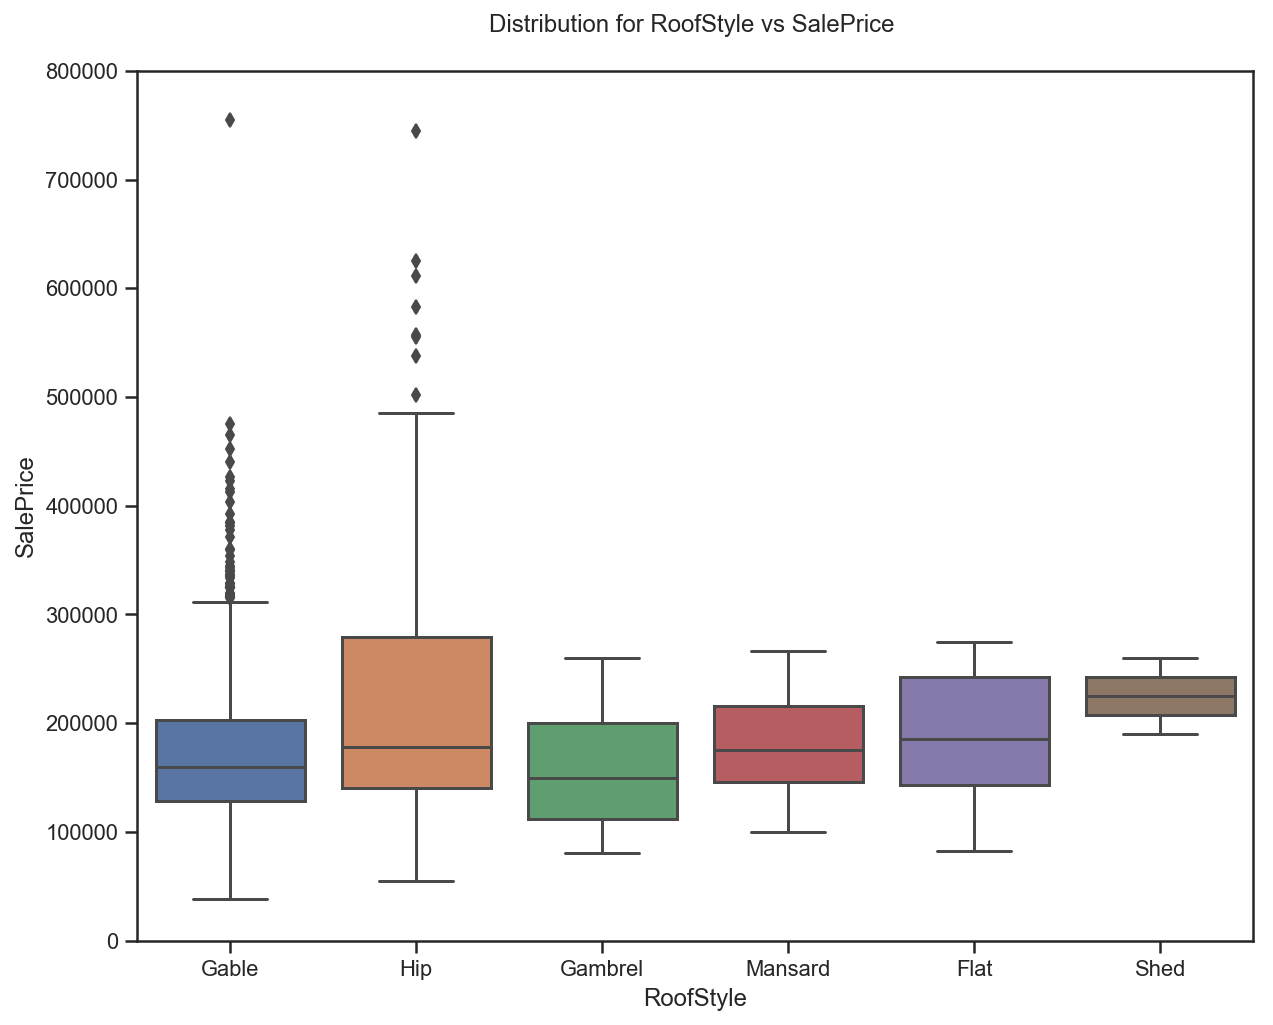

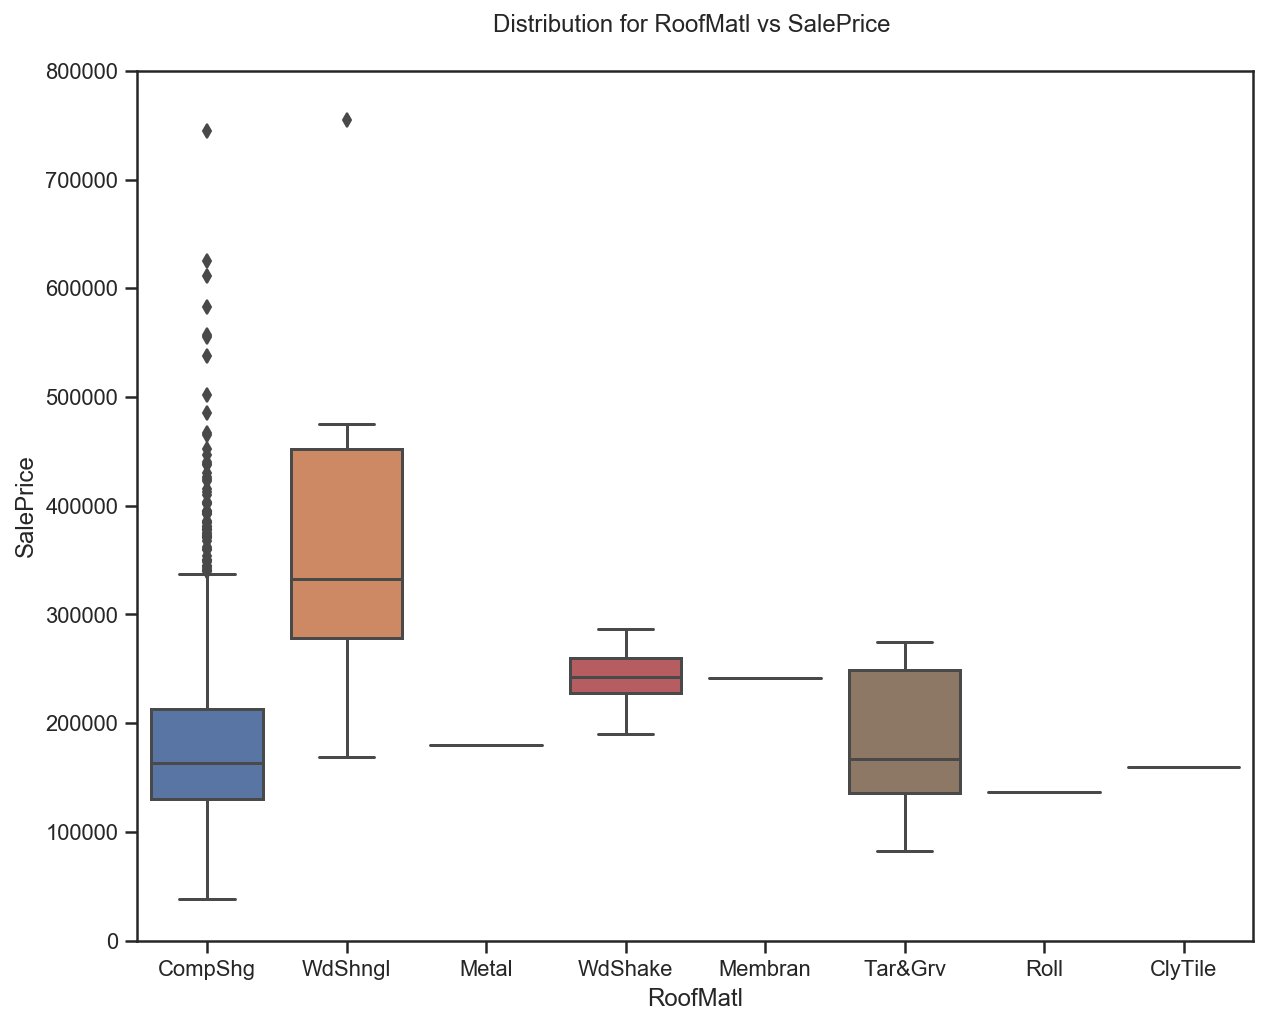

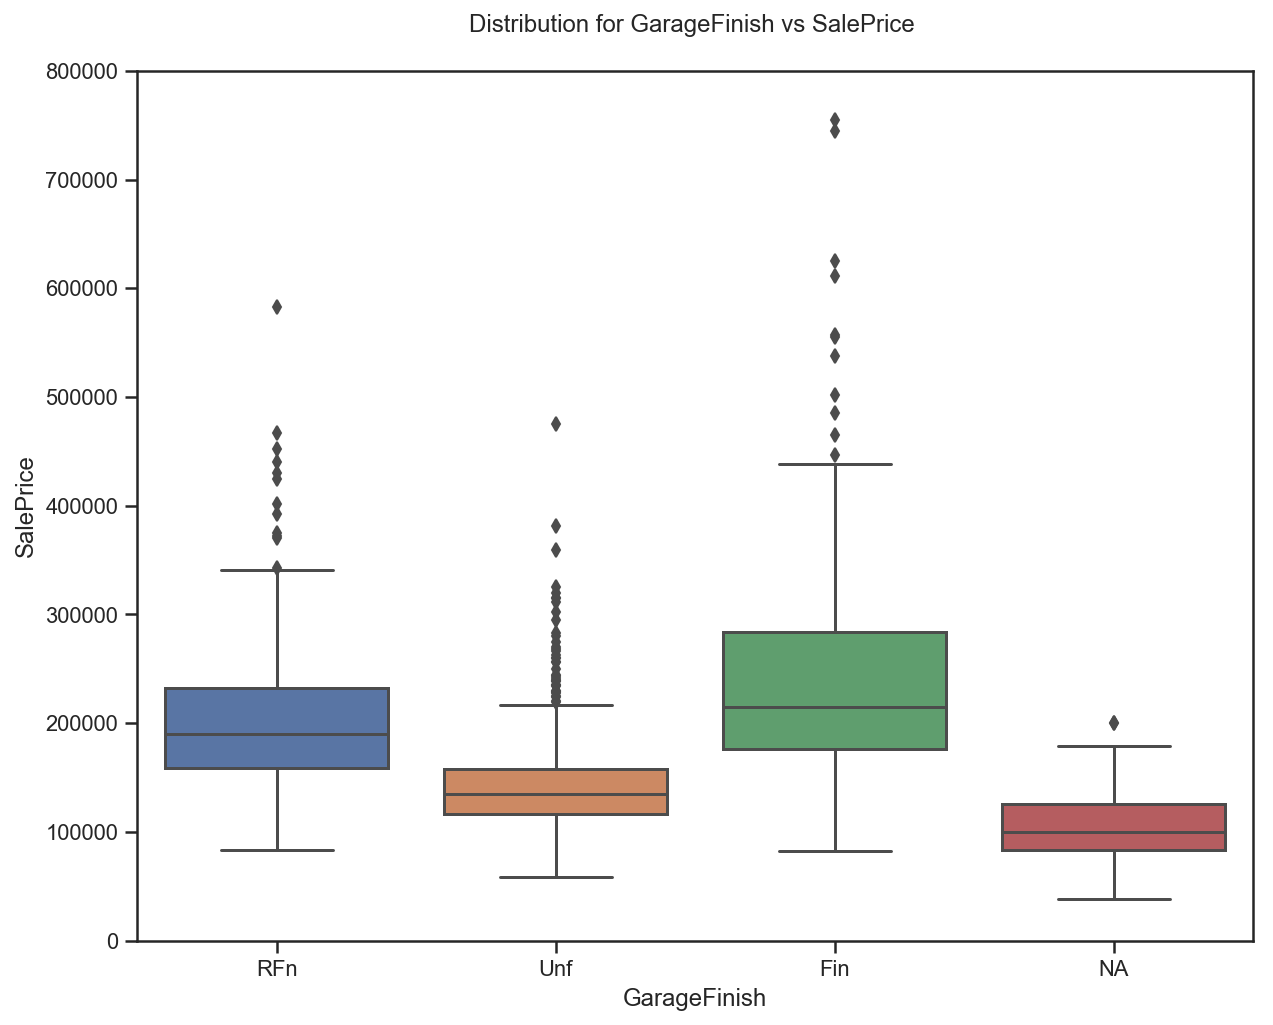

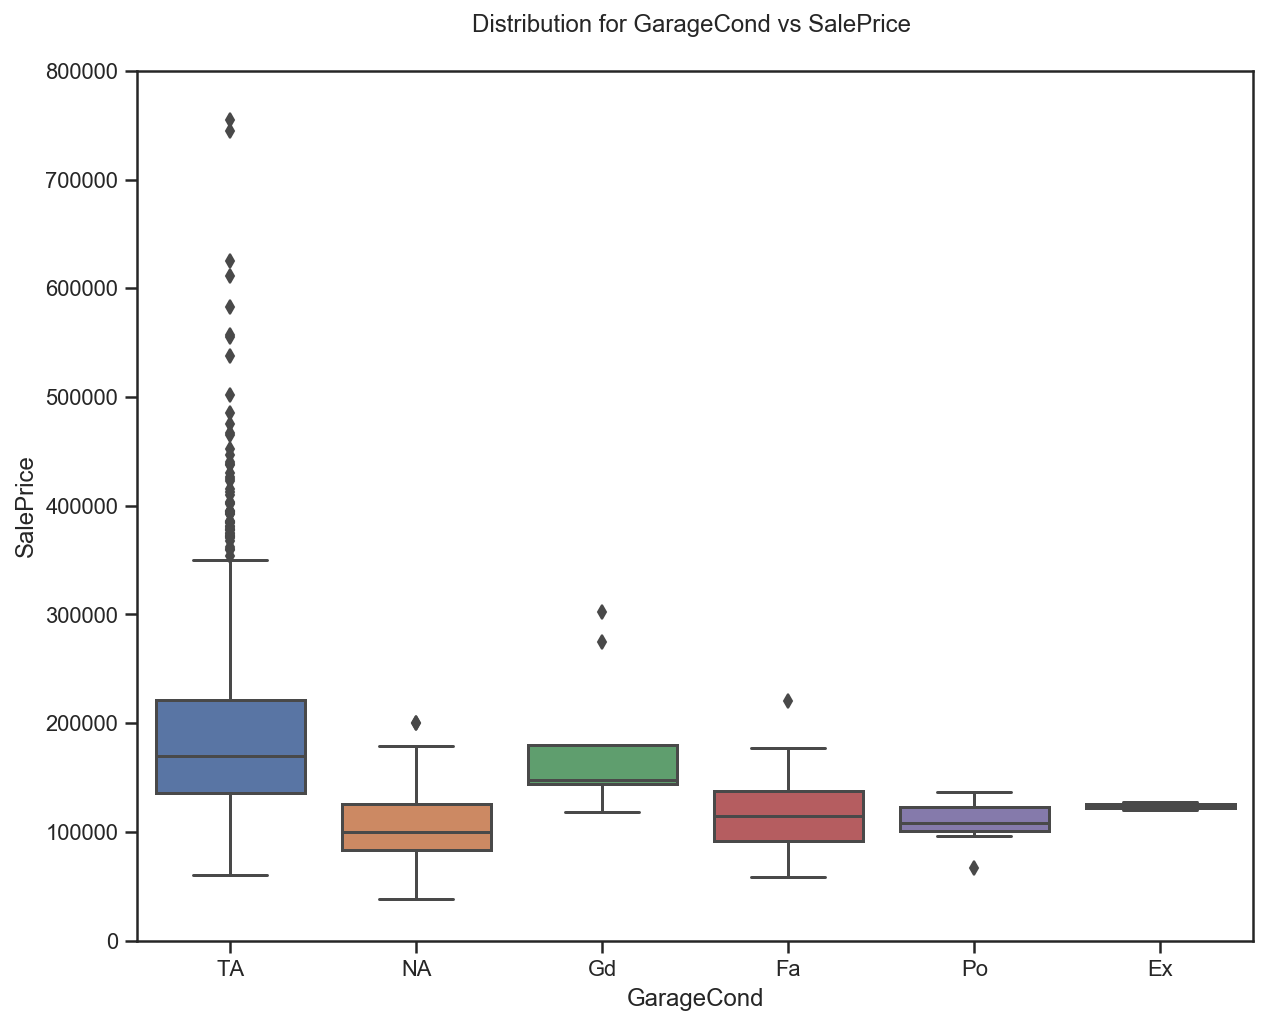

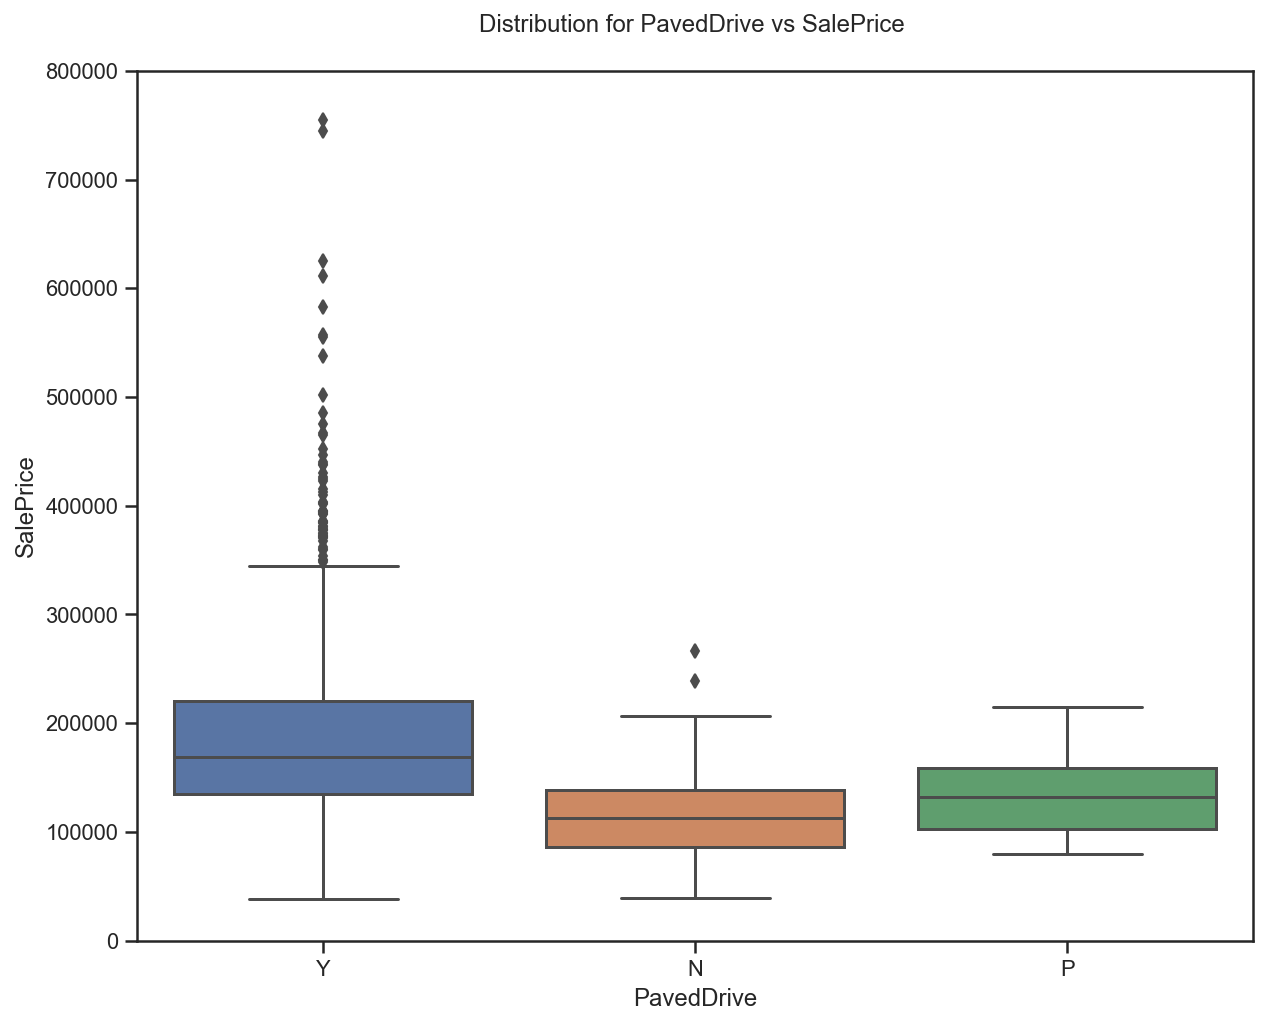

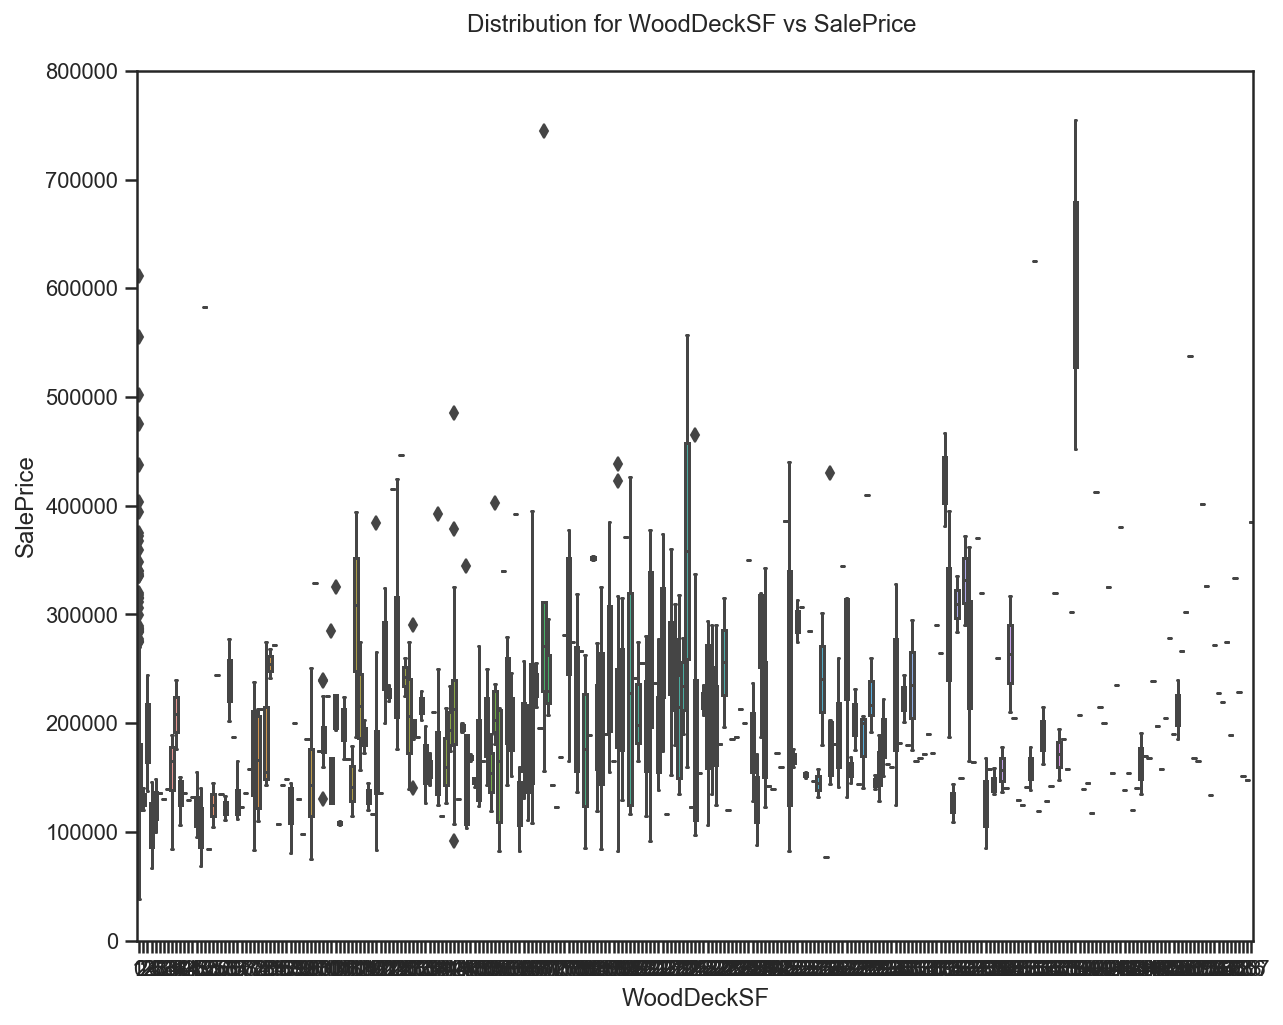

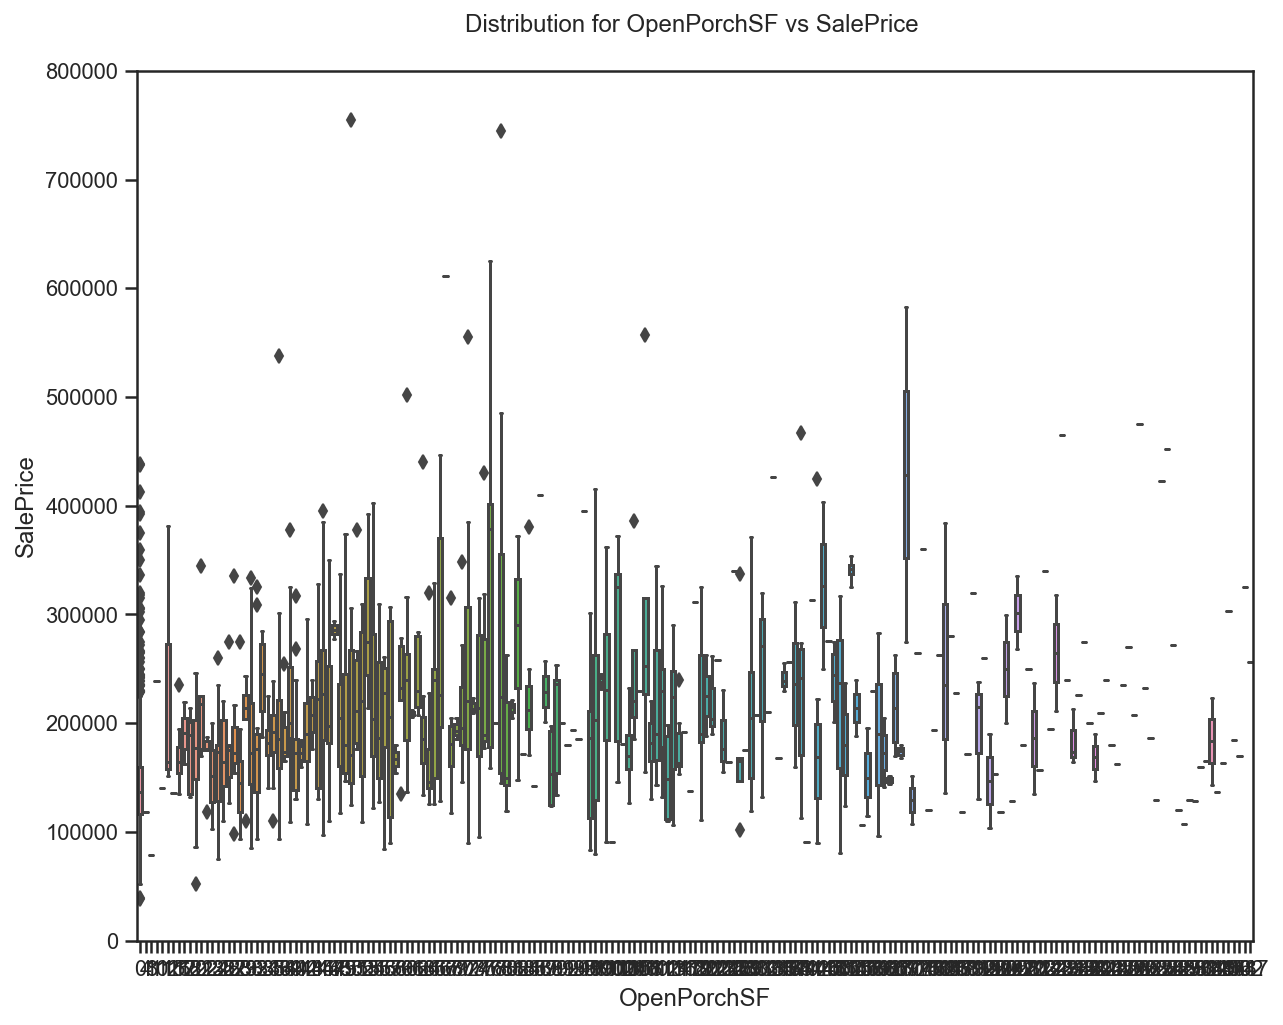

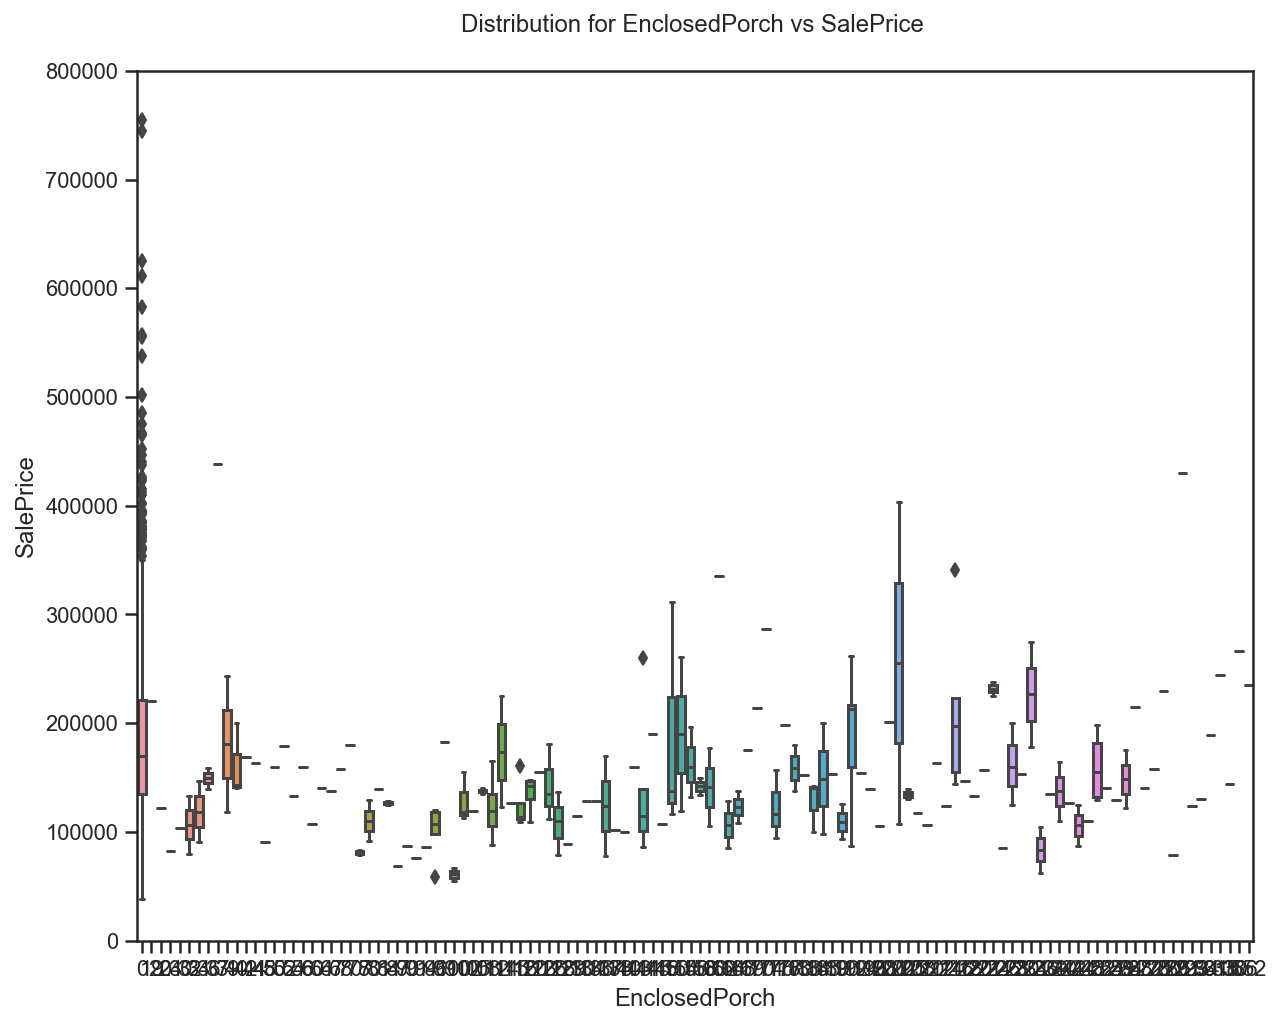

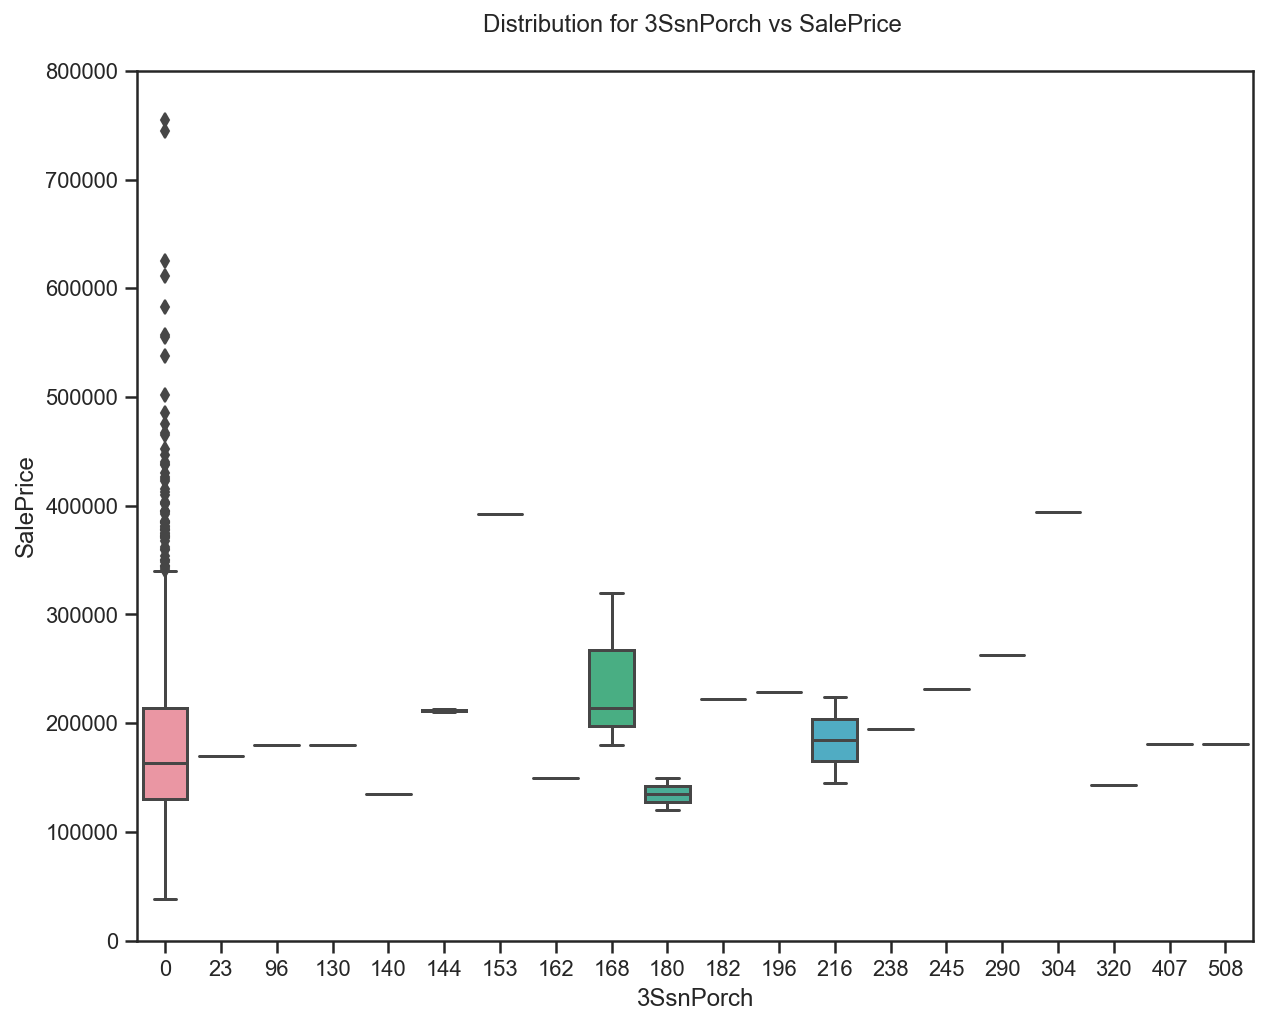

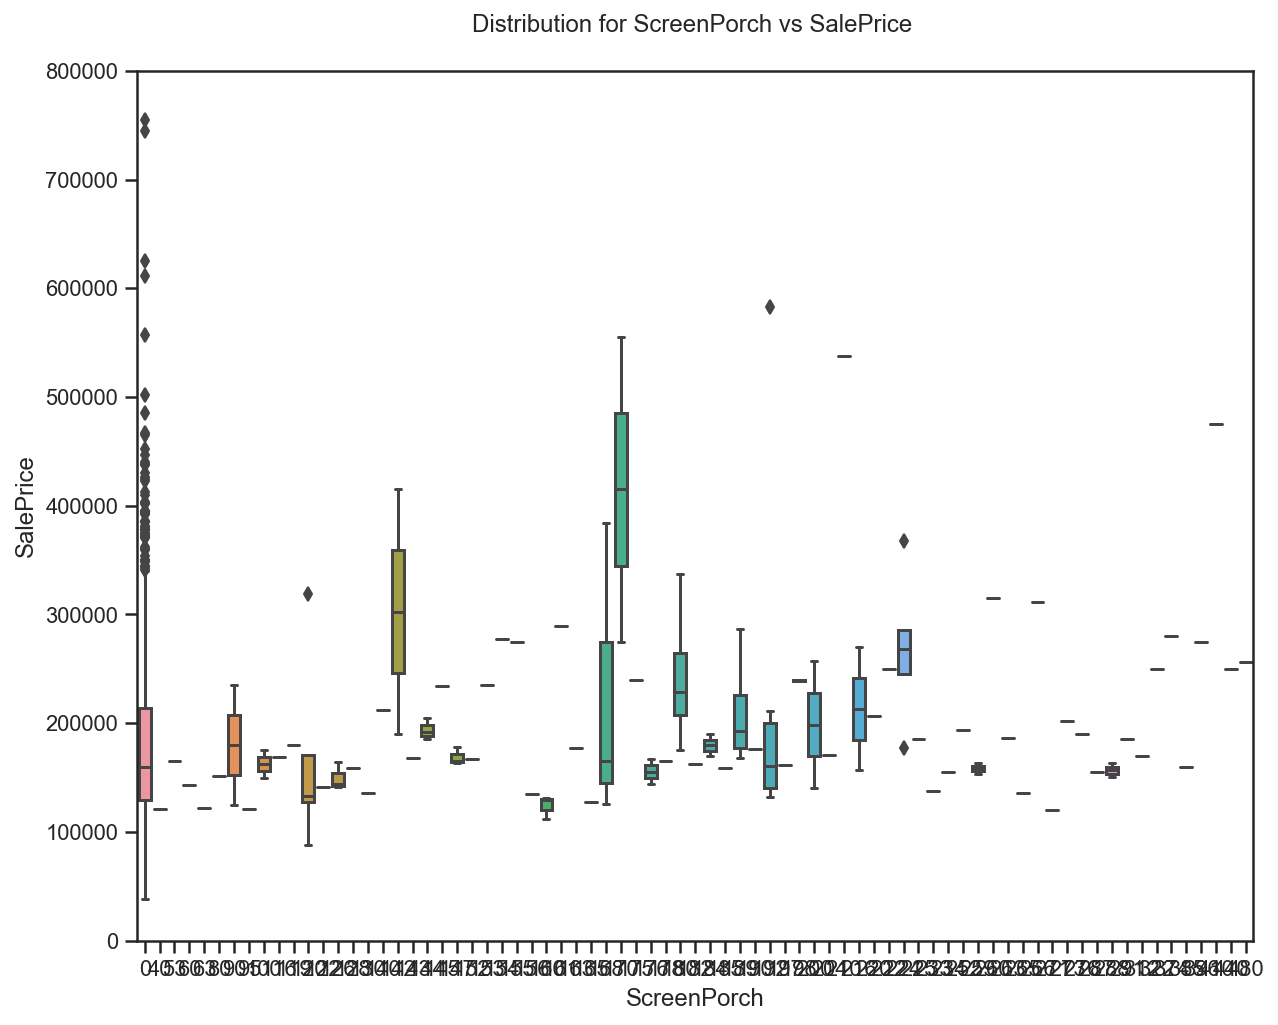

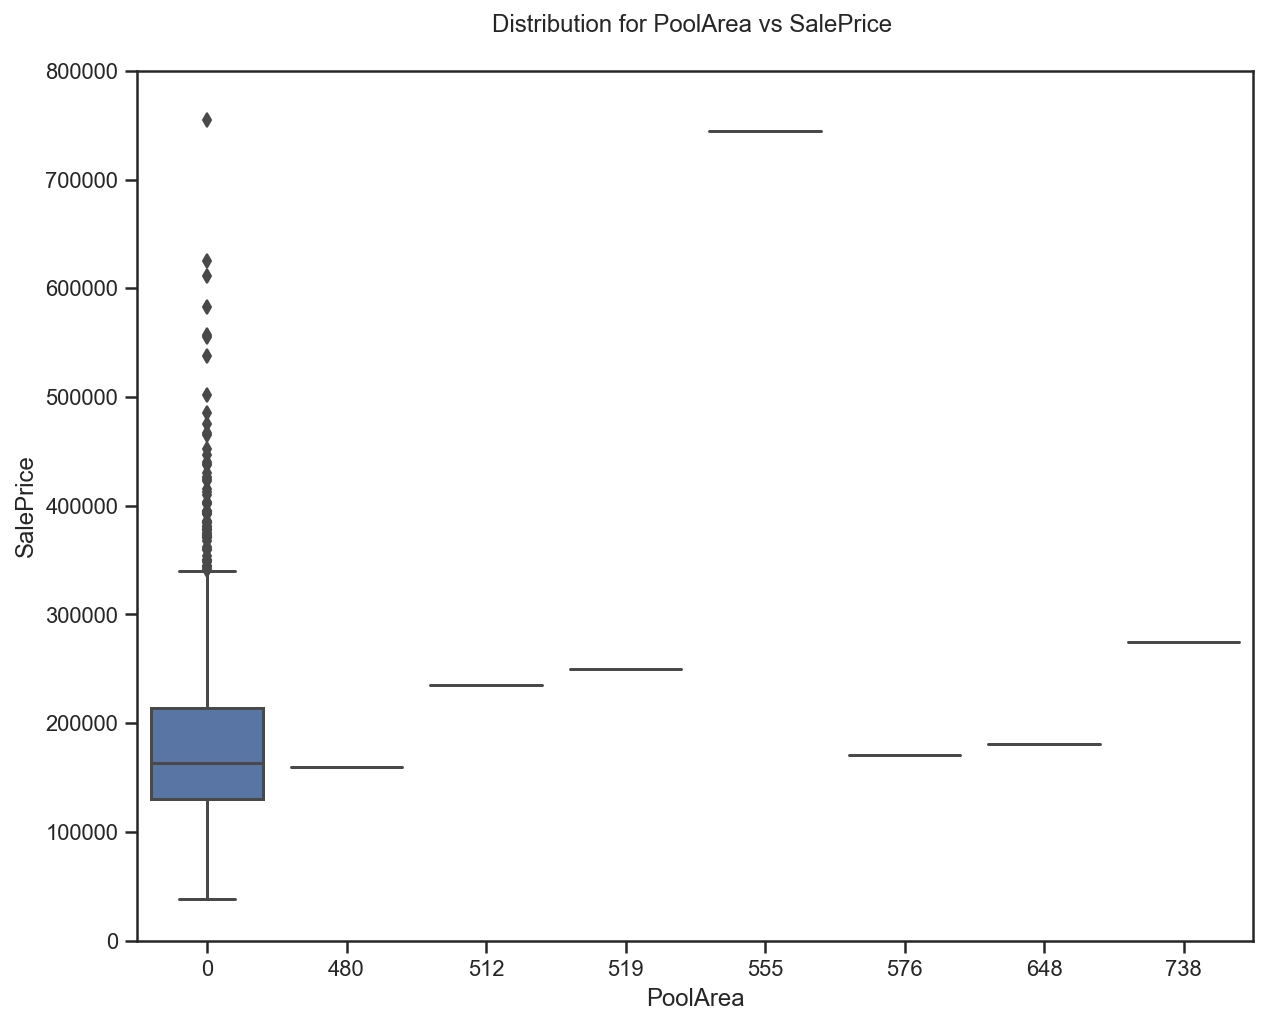

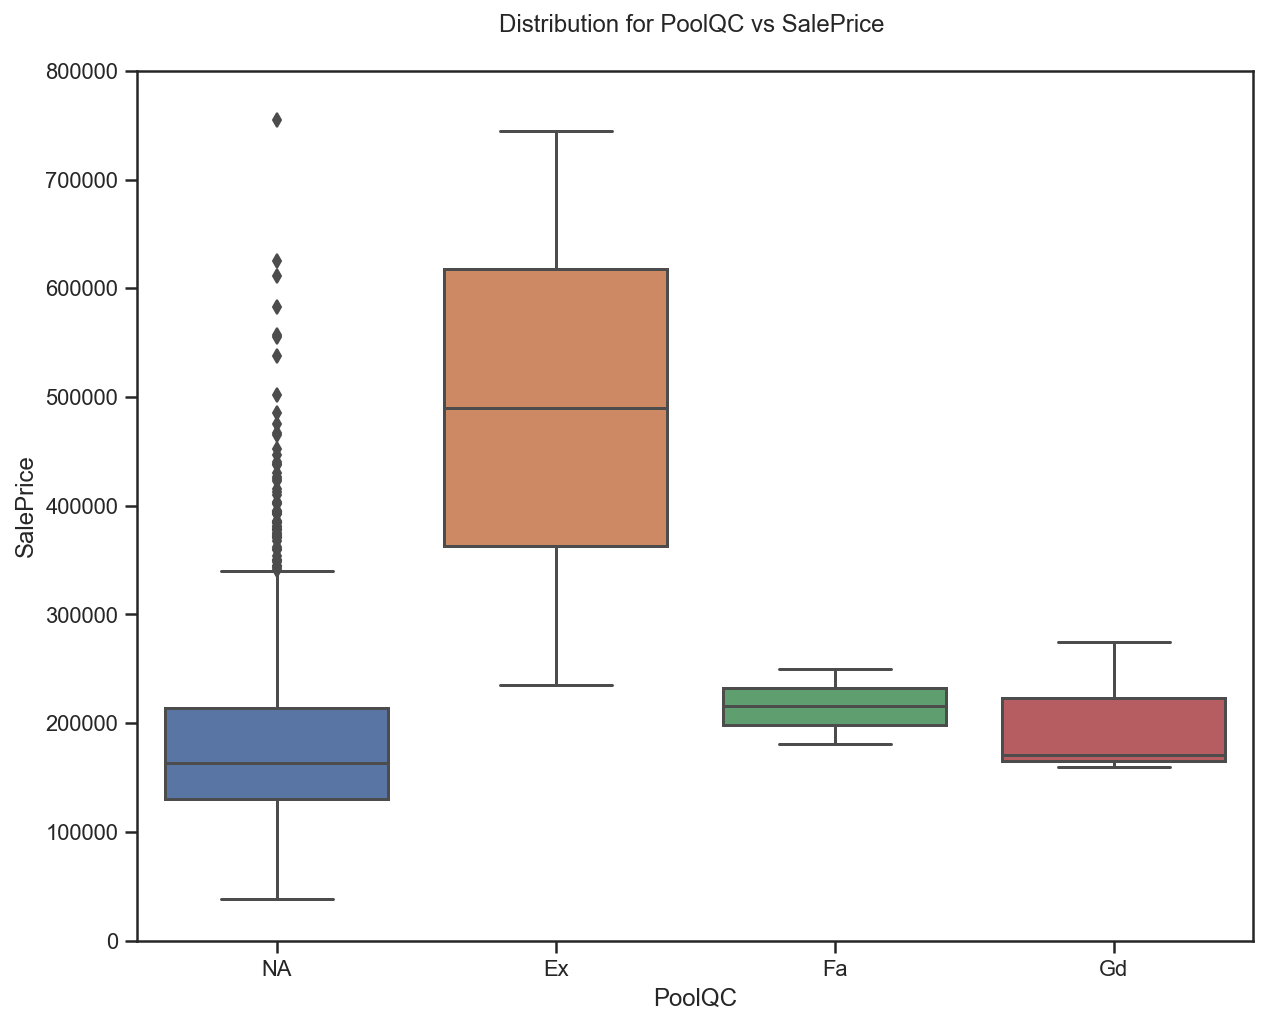

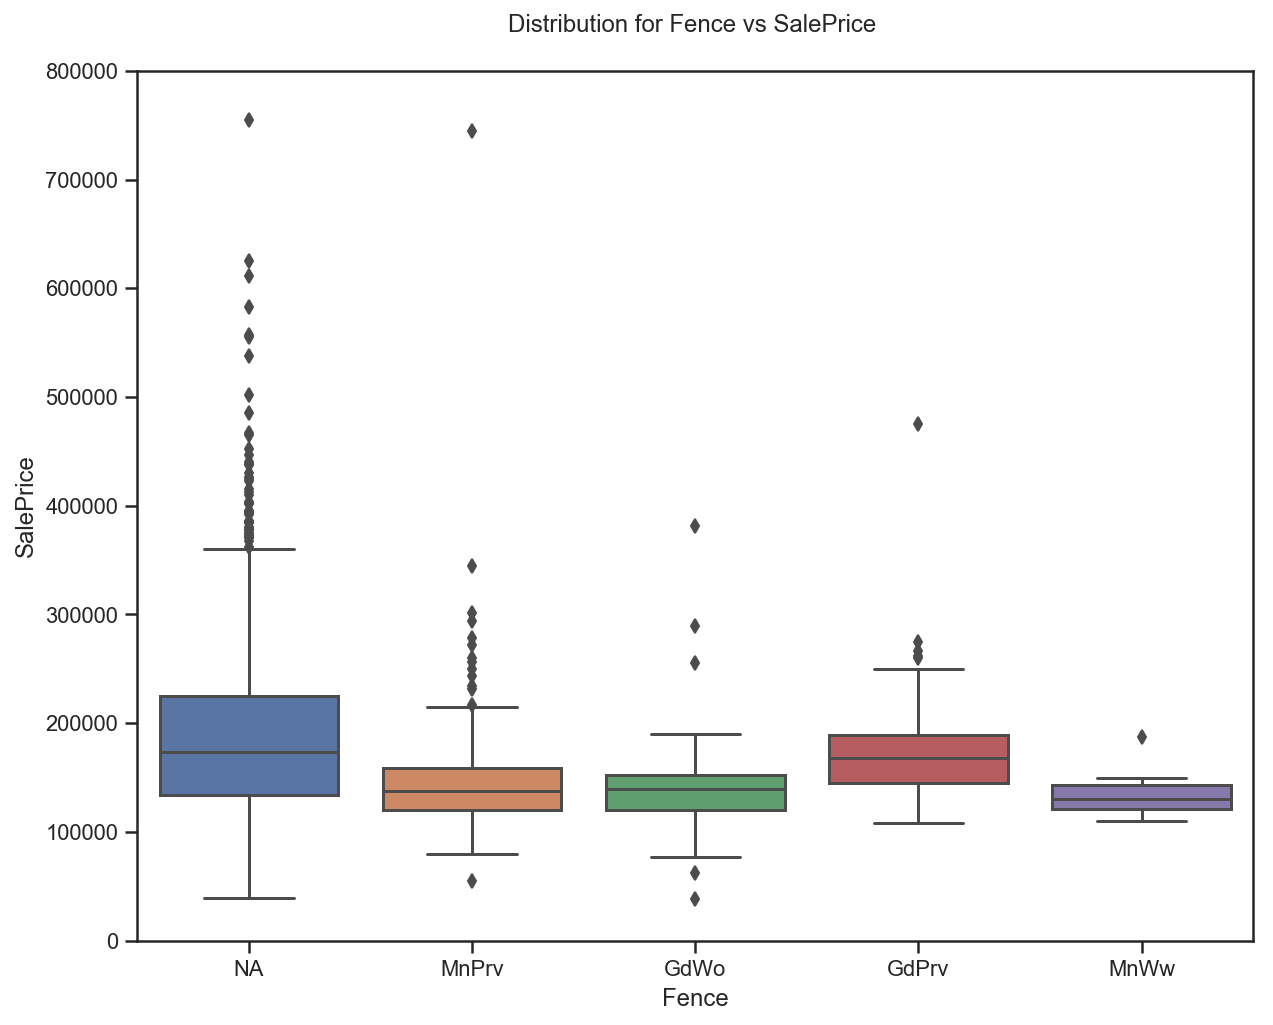

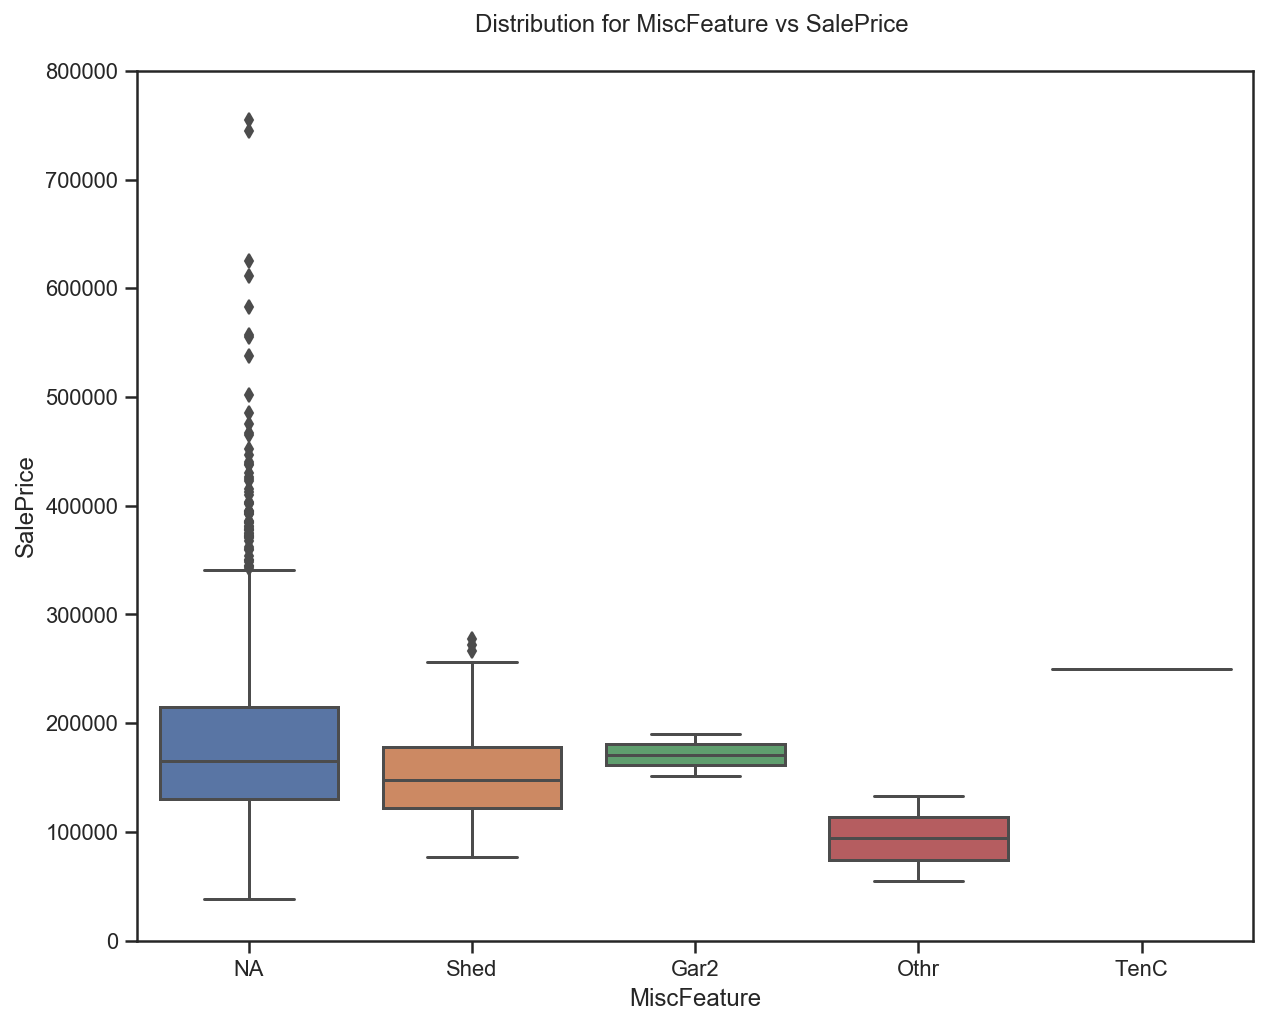

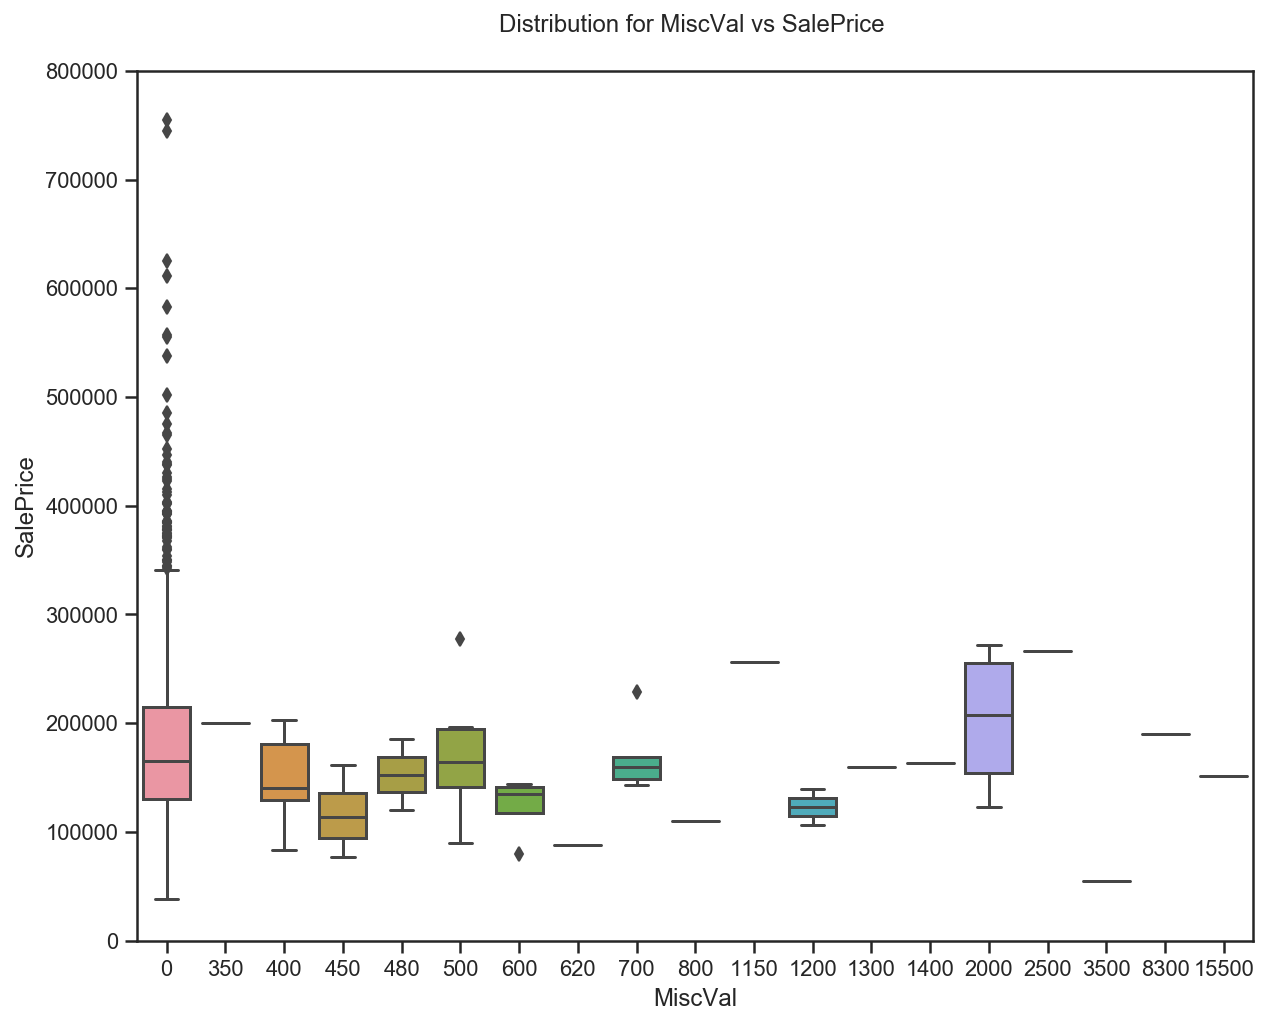

In [128]:
for feature in char_unfixed:
    data = pd.concat([house['SalePrice'], house[feature]], axis=1)
    f, ax = plt.subplots(figsize=(10, 8))
    fig = sns.boxplot(x=feature, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    title_name = 'Distribution for ' + feature + ' vs SalePrice \n'
    ax.set_title(title_name, fontsize = 12)

In [129]:
df2.shape

(1450, 19)

In [130]:
# Differentiate numerical features and categorical features

categorical_features = df2.select_dtypes(include = ["object"]).columns
numerical_features = df2.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df2_num = df2[numerical_features]
df2_cat = df2[categorical_features]

Numerical features : 11
Categorical features : 8


In [131]:
# pd.get_dummies to categorical features to binary integer columns
# leave out the first of each dummy-coded columns to serve as the "reference" column
df2_cat = pd.get_dummies(df2_cat, drop_first=True)
df2_cat.head(2)

RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                1                  0              0                  0   

   RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  \
0               0                 1                 0               0   
1               0                 1                 0               0   

   RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  \
0              0                 0                 0                 0   
1              0                 0                 0                 0   

   GarageFinish_NA  GarageFinish_RFn  GarageFinish_Unf  GarageCond_Fa  \
0                0                 1                 0              0   
1                0                 1                 0              0   

   GarageCond_Gd  GarageCond_NA  GarageCond_Po  GarageCond_TA  PavedDrive_P  \
0              0              0              0              1             0   
1              0              0              0              1             0   

   PavedDrive_Y  PoolQC_Fa  PoolQC_Gd  PoolQC_NA  Fence_GdWo  Fence_MnPrv  \
0             1          0          0          1           0            0   
1             1          0          0          1           0            0   

   Fence_MnWw  Fence_NA  MiscFeature_NA  MiscFeature_Othr  MiscFeature_Shed  \
0           0         1               1                 0                 0   
1           0         1               1                 0                 0   

   MiscFeature_TenC  
0                 0  
1                 0

In [132]:
# Join categorical and numerical features
df2_clean = pd.concat([df2_num, df2_cat], axis = 1)
print("New number of features : " + str(df2_clean.shape[1]))

New number of features : 44


In [133]:
# X remain as DataFrame type as will need to create subset 
# using yearbuilt column for train/test set
X = df2_clean
y = house.SalePrice.values

In [134]:
# check X & y has same no. of rows
print(X.shape, y.shape)

# check datatype of X & y
print(type(X),type(y))

(1450, 44) (1450,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [135]:
# Train a model on pre-2010 data and evaluate its performance on the 2010 houses.

# Make sure X is a 2D array
# X[df2_clean.YearBuilt == 2010] returns X where bool condition is met
X_train2 = (X[df2_clean.YrSold < 2010]).values
X_test2 = (X[df2_clean.YrSold == 2010]).values

y_train2 = y[df2_clean.YrSold < 2010]
y_test2 = y[df2_clean.YrSold == 2010]

In [136]:
# check that X_train & y_train are array and NOT DataFrame type 
print(type(X_train2),type(y_train2))

# check X & y has same no. of rows
print(X_train2.shape,y_train2.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1278, 44) (1278,)


In [137]:
print(X_test2.shape,y_test2.shape)

(172, 44) (172,)


In [138]:
# Standardize all features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train2 = ss.fit_transform(X_train2)
X_test2 = ss.transform(X_test2)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [139]:
# Instantiate Linear Regression model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

# Fit model
lr.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
# Cross-validate the R2 of an ordinary linear regression model with 10 folds on train set
scores = cross_val_score(lr, X_train2, y_train2, cv=10)
print(scores,'\n')
print('R2 score: {}'.format(np.mean(scores)))

[-3.76997268e+26 -7.51773970e+25 -7.73472565e+25  6.36314432e-01
  6.63581411e-01 -1.16642655e+26  6.68916688e-01  5.91589232e-01
 -4.47615578e+24 -4.02939618e+22] 

R2 score: -6.50681025615475e+25


In [141]:
# The mean R2 is extremely negative. 
# The linear regression shows that the model does not explain the variability
# of the response data around its mean.

In [142]:
# Look at predictions on training and test set

from sklearn.metrics import mean_squared_error
y_train_pred2 = lr.predict(X_train2)
y_test_pred2 = lr.predict(X_test2)

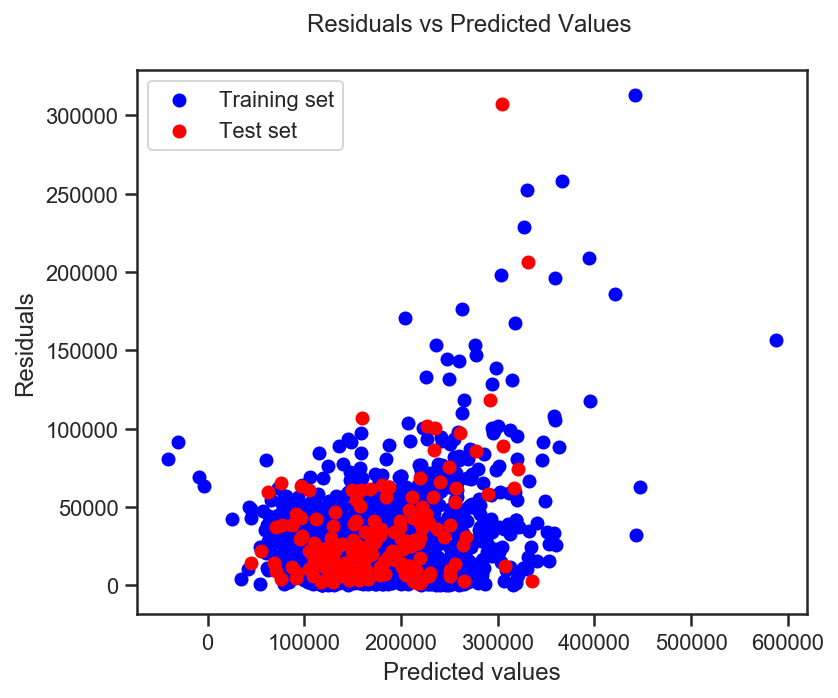

In [143]:
# Plot residuals
# Residuals equals the difference between Y-True and Y-Pred:
plt.figure(figsize=(6,5))
plt.scatter(y_train_pred2, abs(y_train2 - y_train_pred2), c = "blue", marker = None, label = "Training set")
plt.scatter(y_test_pred2, abs(y_test2 - y_test_pred2), c = "red", marker = None, label = "Test set")
plt.title("Residuals vs Predicted Values \n")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

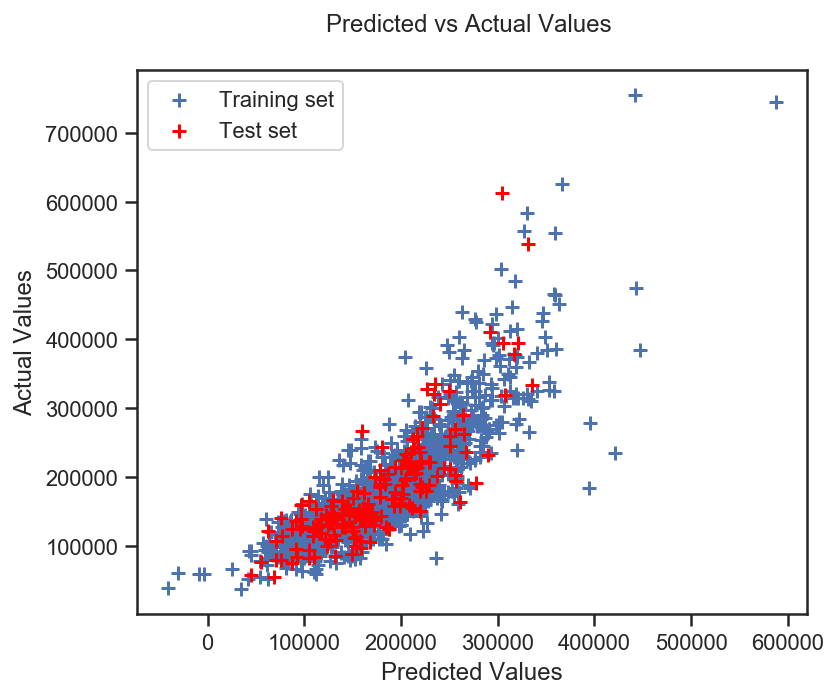

MSE: 1823522698.2442422
MSE: 2195154177.120919


In [144]:
# Plot predictions

from sklearn.metrics import mean_squared_error

# Predict y value from test set
y_train_pred = lr.predict(X_train2)
y_test_pred = lr.predict(X_test2)

# Plot the model
plt.figure(figsize=(6,5))
plt.scatter(y_train_pred2, y_train2, s=50, c='b', marker='+', zorder=10, label = "Training set")
plt.scatter(y_test_pred2, y_test2, s=50, c='red', marker='+', zorder=10, label = "Test set")
plt.title("Predicted vs Actual Values \n")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend(loc = "best")
plt.show()

print("MSE:", mean_squared_error(y_train2, y_train_pred2))
print("MSE:", mean_squared_error(y_test2, y_test_pred2))


In [145]:
# MSE is very high. Values closer to zero are better.

In [146]:
import statsmodels.api as sm

X2 = X_train2
y2 = y_train2

# Manually add the intercept column:
X2 = np.concatenate([X2, np.ones((X2.shape[0], 1))], axis=1)

# y target variable comes before the X predictor.
model = sm.OLS(y2, X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     70.44
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          1.23e-297
Time:                        22:22:08   Log-Likelihood:                -15435.
No. Observations:                1278   AIC:                         3.096e+04
Df Residuals:                    1234   BIC:                         3.118e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.629e+04   1730.137     26.755      0.000    4.29e+04    4.97e+04
x2           448.8176   1325.025      0.339      0.735   -2150.734    3048.370
x3          6551.5605   1601.236      4.092      0.000    3410.115    9693.006
x4          9754.2198   1321.828      7.379      0.000    7160.940    1.23e+04
x5          6925.9903   1314.814      5.268      0.000    4346.472    9505.509
x6           -83.8955   1303.162     -0.064      0.949   -2640.553    2472.762
x7          2602.9614   1234.701      2.108      0.035     180.617    5025.306
x8          5435.9343   1300.558      4.180      0.000    2884.384    7987.485
x9          4.312e+04   1.66e+04      2.591      0.010    1.05e+04    7.58e+04
x10        -6305.6174   8860.389     -0.712      0.477   -2.37e+04    1.11e+04
x11        -1131.9103   1228.689     -0.921      0.357   -3542.460    1278.640
x12        -1.141e+04    1.3e+04     -0.875      0.382    -3.7e+04    1.42e+04
x13        -1219.6260   2908.997     -0.419      0.675   -6926.753    4487.501
x14        -4160.2179   1.26e+04     -0.330      0.741   -2.89e+04    2.05e+04
x15         -493.4360   2338.000     -0.211      0.833   -5080.331    4093.459
x16         -638.6357   3985.056     -0.160      0.873   -8456.871    7179.599
x17         1.126e+04   1.16e+04      0.970      0.332   -1.15e+04     3.4e+04
x18         2662.8020   2804.705      0.949      0.343   -2839.715    8165.319
x19         1658.4066   2806.351      0.591      0.555   -3847.340    7164.153
x20         3007.4521   2690.790      1.118      0.264   -2271.577    8286.481
x21         5659.6929   8462.815      0.669      0.504   -1.09e+04    2.23e+04
x22         2419.4591   4323.677      0.560      0.576   -6063.113    1.09e+04
x23         1.296e+04   5978.146      2.168      0.030    1233.522    2.47e+04
x24         -119.4671   3553.960     -0.034      0.973   -7091.940    6853.006
x25        -5558.7248   1558.698     -3.566      0.000   -8616.716   -2500.733
x26        -9856.7578   1921.348     -5.130      0.000   -1.36e+04   -6087.287
x27         3936.1093   5074.385      0.776      0.438   -6019.268    1.39e+04
x28          970.2283   2909.251      0.333      0.739   -4737.398    6677.855
x29         -119.4671   3553.960     -0.034      0.973   -7091.940    6853.006
x30         1115.9708   2611.394      0.427      0.669   -4007.293    6239.234
x31         6768.2249   9030.336      0.749      0.454   -1.09e+04    2.45e+04
x32          332.8881   1436.289      0.232      0.817   -2484.950    3150.727
x33         3047.7733   1604.411      1.900      0.058     -99.903    6195.449
x34        -1.325e+04   2759.292     -4.802      0.000   -1.87e+04   -7837.954
x35        -1.439e+04   3065.995     -4.695      0.000   -2.04e+04   -8379.223
x36         2.377e+04   1.55e+04      1.537      0.125   -6577.759    5.41e+04
x3

In [147]:
# R2 score is 0.711
# Approximately 71% of the response variable is explained by the linear model
# (Independent Variables).

In [148]:
# Linear Regression using RidgeCV on training set to handle multicollinearity of features 

from sklearn.linear_model import RidgeCV
ridge_alphas = np.logspace(-2, 7, 50)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train2, y_train2)
print(optimal_ridge.alpha_)

167.683293681101


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [149]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=optimal_ridge.alpha_)
# previously fit optimal_ridge.fit(X_train2, y_train2)
ridge_scores = cross_val_score(ridge, X_train2, y_train2, cv=10)
print(ridge_scores)
print(np.mean(ridge_scores))

[0.74014276 0.65544121 0.70345112 0.65446201 0.66114276 0.61707549
 0.69411728 0.61293102 0.52634675 0.73206334]
0.6597173761639736


In [150]:
# It's vastly better than the linear regression. 
# There's likely so much multicollinearity in the data that linear regression
# overfits and has bogus coefficients on predictors. Ridge is 
# able to manage the multicollinearity and get a good out-of-sample result.

In [151]:
# Look at the coefficients for variables in the ridge.
ridge.fit(X_train2, y_train2)

X = df2_clean

ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(20)

variable          coef      abs_coef
0        OverallQual  38760.302317  38760.302317
25  GarageFinish_Unf  -9648.001899   9648.001899
3         WoodDeckSF   9615.423263   9615.423263
2       YearRemodAdd   8774.728749   8774.728749
34         PoolQC_Gd  -8614.620471   8614.620471
22  RoofMatl_WdShngl   7753.581634   7753.581634
4        OpenPorchSF   7269.953044   7269.953044
8           PoolArea   7123.855999   7123.855999
33         PoolQC_Fa  -5695.895733   5695.895733
7        ScreenPorch   5041.687516   5041.687516
11   RoofStyle_Gable  -4369.373667   4369.373667
24  GarageFinish_RFn  -4114.228198   4114.228198
35         PoolQC_NA  -4083.981585   4083.981585
39          Fence_NA   4028.462243   4028.462243
13     RoofStyle_Hip   3295.663913   3295.663913
32      PavedDrive_Y   3135.368496   3135.368496
23   GarageFinish_NA  -2428.625065   2428.625065
28     GarageCond_NA  -2428.625065   2428.625065
6          3SsnPorch   2277.874905   2277.874905
30     GarageCond_TA   2074.649609   2074.649609

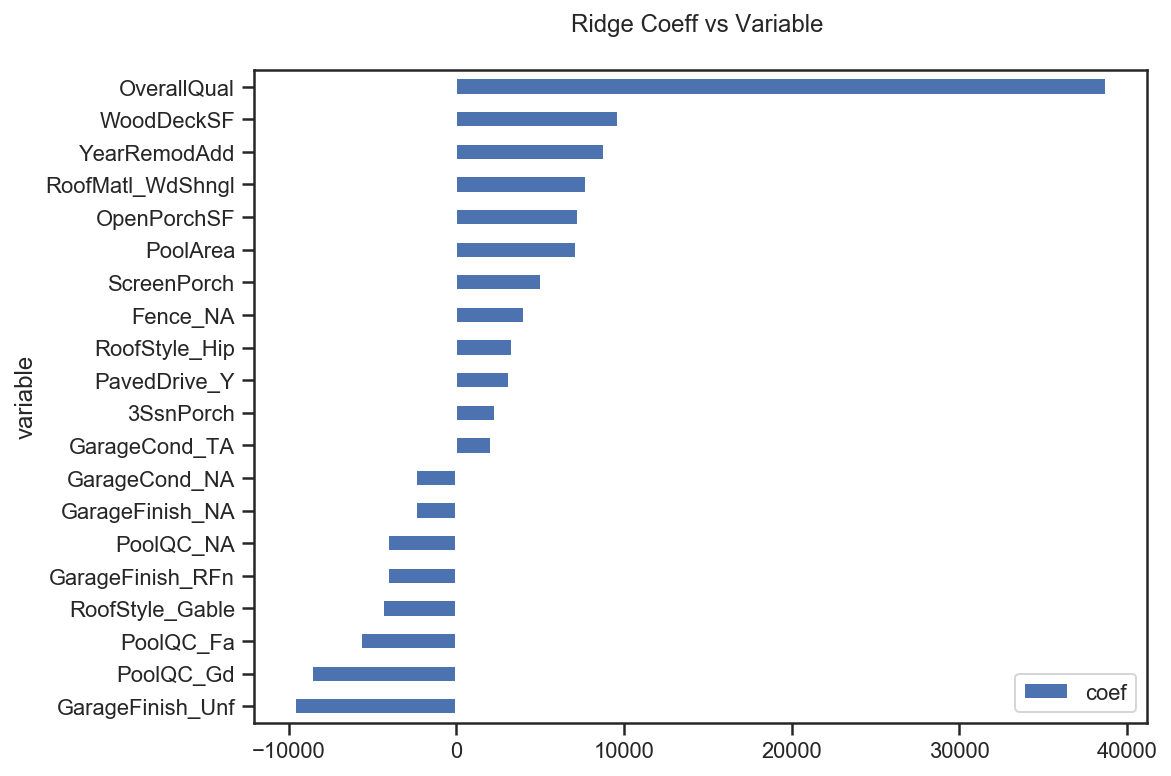

In [152]:
ridge_coefs2 = ridge_coefs[['variable','coef']]
ridge_coefs2.set_index('variable',inplace=True)
ridge_coefs2

ridge_coefs2.head(20).sort_values('coef').plot(
    kind='barh', title='Ridge Coeff vs Variable \n', figsize=(8,6))
plt.legend(loc='lower right')
plt.show()

#### 1. Evaluate the effect in dollars of the renovate-able features.

In [153]:
# Listed above are the top 20 renovate-able features not explained by the fixed features 
# to estimate the price of a property
# As the numerical features have been standardised, every unit increase in each 
# numerical feature will have a change in value of the property price by the coeff value
# If the categorical feature exists, the property value will increase/decrease as per the
# coeff value

In [154]:
# Linear Regression using LassoCV on training set to eliminate features 
# that aren't useful

from sklearn.linear_model import LassoCV
optimal_lasso = LassoCV(n_alphas=800, cv=5, verbose=1)
optimal_lasso.fit(X_train2, y_train2)
print(optimal_lasso.score(X_train2, y_train2))
print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.6852875256932044
1900.384541076043


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [155]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=optimal_lasso.alpha_)
# previously fit optimal_lasso.fit(X_train2, y_train2)
lasso_scores = cross_val_score(lasso, X_train2, y_train2, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.72022139 0.70124962 0.70144771 0.65097303 0.65762318 0.64315907
 0.70302311 0.60902004 0.57110705 0.71917168]
0.6676995886742481


In [156]:
# The lasso performs similar (R2 = 0.67) to the ridge (R2 = 0.66).

In [157]:
# Look at the coefficients for variables in the lasso.
lasso.fit(X_train2, y_train2)

X = df2_clean

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

variable          coef      abs_coef
0        OverallQual  48890.640582  48890.640582
3         WoodDeckSF   8634.172175   8634.172175
2       YearRemodAdd   5893.189683   5893.189683
11   RoofStyle_Gable  -5613.049127   5613.049127
22  RoofMatl_WdShngl   5416.020895   5416.020895
4        OpenPorchSF   5126.803468   5126.803468
25  GarageFinish_Unf  -4155.429181   4155.429181
7        ScreenPorch   3215.918935   3215.918935
8           PoolArea   2676.594779   2676.594779
34         PoolQC_Gd  -2513.762822   2513.762822
32      PavedDrive_Y   1898.997466   1898.997466
39          Fence_NA   1226.781904   1226.781904
28     GarageCond_NA   -880.300798    880.300798
23   GarageFinish_NA   -746.714932    746.714932
6          3SsnPorch    362.950723    362.950723
24  GarageFinish_RFn   -338.901477    338.901477
30     GarageCond_TA    322.794089    322.794089
33         PoolQC_Fa     -0.000000      0.000000
31      PavedDrive_P     -0.000000      0.000000
36        Fence_GdWo      0.000000      0.000000

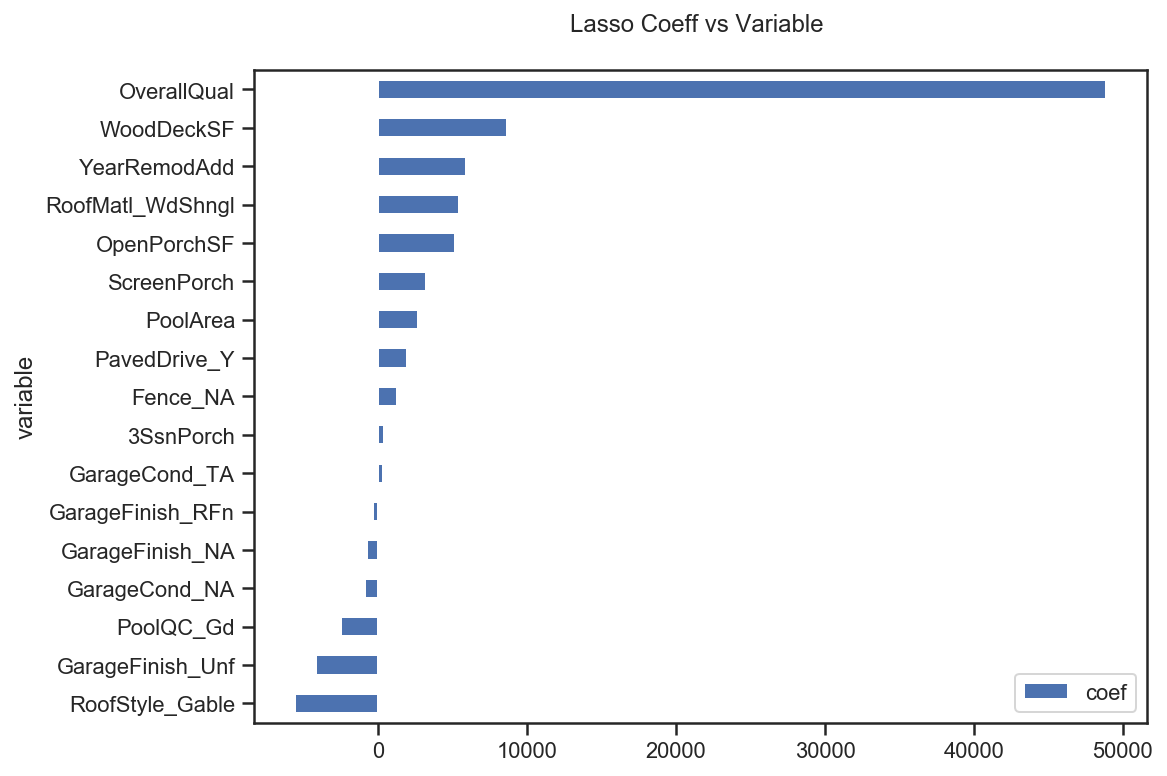

In [158]:
lasso_coefs2 = lasso_coefs[['variable','coef']]
lasso_coefs2.set_index('variable',inplace=True)
lasso_coefs2

lasso_coefs2.head(17).sort_values('coef').plot(
    kind='barh', title='Lasso Coeff vs Variable \n', figsize=(8,6))
plt.legend(loc='lower right')
plt.show()

In [159]:
# As the numerical features have been standardised, every unit increase in each 
# numerical feature will have a change in value of the property price by the coeff value
# If the categorical feature exists, the property value will increase/decrease as per the
# coeff value

#### 2. How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money.

In [160]:
# Use case for the coefficients:
# Buy properties that are below the predicted price using the fixed characteristics.
# After renovating the renovate-able characteristics, the property will be able
# to fetch higher selling price.

#### 3. Investigate how much of the variance in price remaining is explained by these features?

In [161]:
# Setting up the predictor matrix with the renovate-able characteristics
# char_unfixed = renovate-able characteristics

char_unfixed = ['OverallQual','OverallCond','YearRemodAdd', 
                   'RoofStyle', 'RoofMatl', 'GarageFinish', 'GarageCond', 
                    'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 
                    'Fence', 'MiscFeature', 'MiscVal']

# include year sold for train/test split
df3 = house[char_unfixed + ['YrSold']]

In [162]:
# Differentiate numerical features and categorical features

categorical_features = df3.select_dtypes(include = ["object"]).columns
numerical_features = df3.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df3_num = df3[numerical_features]
df3_cat = df3[categorical_features]


Numerical features : 11
Categorical features : 8


In [163]:
# pd.get_dummies to categorical features to binary integer columns
# leave out the first of each dummy-coded columns to serve as the "reference" column
df3_cat = pd.get_dummies(df3_cat, drop_first=True)


In [164]:
df3_cat.head(2)

RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                1                  0              0                  0   

   RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  \
0               0                 1                 0               0   
1               0                 1                 0               0   

   RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  \
0              0                 0                 0                 0   
1              0                 0                 0                 0   

   GarageFinish_NA  GarageFinish_RFn  GarageFinish_Unf  GarageCond_Fa  \
0                0                 1                 0              0   
1                0                 1                 0              0   

   GarageCond_Gd  GarageCond_NA  GarageCond_Po  GarageCond_TA  PavedDrive_P  \
0              0              0              0              1             0   
1              0              0              0              1             0   

   PavedDrive_Y  PoolQC_Fa  PoolQC_Gd  PoolQC_NA  Fence_GdWo  Fence_MnPrv  \
0             1          0          0          1           0            0   
1             1          0          0          1           0            0   

   Fence_MnWw  Fence_NA  MiscFeature_NA  MiscFeature_Othr  MiscFeature_Shed  \
0           0         1               1                 0                 0   
1           0         1               1                 0                 0   

   MiscFeature_TenC  
0                 0  
1                 0

In [165]:
# Join categorical and numerical features
df3_clean = pd.concat([df3_num, df3_cat], axis = 1)
print("New number of features : " + str(df3_clean.shape[1]))

New number of features : 44


In [166]:
# X remain as DataFrame type as will need to create subset 
# using yearbuilt column for train/test set
X3 = df3_clean
y3 = house.SalePrice.values

In [167]:
# check X & y has same no. of rows
print(X3.shape, y3.shape)

# check datatype of X & y
print(type(X3),type(y3))

(1450, 44) (1450,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [168]:
X_train3 = (X3[df3_clean.YrSold < 2010]).values
X_test3 = (X3[df3_clean.YrSold == 2010]).values

y_train3 = y3[df3_clean.YrSold < 2010]
y_test3 = y3[df3_clean.YrSold == 2010]

In [169]:
# Standardize all features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train3 = ss.fit_transform(X_train3)
X_test3 = ss.transform(X_test3)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [170]:
# X = df3_clean
# y = house.SalePrice.values
# fit into lasso model as it has higher score

lasso.fit(X_train3, y_train3)

y_pred_train = lasso.predict(X_train3)
y_var_train = abs(y_train3 - y_train_pred)

y_pred_test = lasso.predict(X_test3)
y_var_test = abs(y_test3 - y_test_pred)

In [171]:
print(y_var_train, '\n', y_var_train.shape)

[ 1010.37245668  2725.62754332 18442.37245668 ... 28249.62754332
  3654.37245668 54885.62754332] 
 (1278,)


In [172]:
print(y_var_test[:5], '\n', y_var_test.shape)

[12526.88268425  9460.25437615 11217.62754332 65998.37245668
 26554.37245668] 
 (172,)


In [173]:
# Instantiate Lasso Linear Regression model 

from sklearn.linear_model import LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train3, y_train3)
print(optimal_lasso.score(X_train3, y_train3))
print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.6885504440632382
1661.832731092726


In [174]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=optimal_lasso.alpha_)
# previously fit optimal_lasso.fit(X_train3, y_train3)
lasso_scores = cross_val_score(lasso, X_train3, y_train3, cv=10)
print(lasso_scores)
print(np.mean(lasso_scores))

[0.72175452 0.69584714 0.7035813  0.65174228 0.66109966 0.63940334
 0.70192334 0.60847687 0.57112315 0.72078231]
0.6675733913594195


In [175]:
# The mean R2 is 0.667. This implies that the variance in price remaining (residuals) 
# can be explained by almost 67% of the renovate-able characteristics.
# This model can be used to evaluate which properties to buy and fix up.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [176]:
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [177]:
# A:
house.SaleCondition.value_counts()

Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [178]:
print(len(house[house.SaleCondition=='Abnorml']))
print(len(house))

96
1450


In [179]:
# Calculate baseline accuracy

In [180]:
'Percent of Abnormal Sale: {}%'.format(round(
len(house[house.SaleCondition=='Abnorml'])/len(house)*100,2))

'Percent of Abnormal Sale: 6.62%'

In [181]:
'Percent of Normal Sale: {}%'.format(round(
len(house[house.SaleCondition=='Normal'])/len(house)*100,2))

'Percent of Normal Sale: 82.34%'

In [182]:
# The ‘abnormal sale’ category is a minority category, 

In [183]:
# Abnormal Sale Indicator = 0 for Non-Abnormal Sale Instances
# Abnormal Sale Indicator = 1 for Abnormal Sale Instances

### Approach 1

In [184]:
house.columns = map(str.lower, house.columns)

In [185]:
house.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wooddecksf'

In [186]:
house.head(3)

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0   1          60       RL         65.0     8450   Pave    NA      Reg   
1   2          20       RL         80.0     9600   Pave    NA      Reg   
2   3          60       RL         68.0    11250   Pave    NA      IR1   

  landcontour utilities lotconfig landslope neighborhood condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  condition2 bldgtype housestyle  overallqual  overallcond  yearbuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   yearremodadd roofstyle roofmatl exterior1st exterior2nd masvnrtype  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   masvnrarea exterqual extercond foundation bsmtqual bsmtcond bsmtexposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  bsmtfintype1  bsmtfinsf1 bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  heating heatingqc centralair electrical  1stflrsf  2ndflrsf  lowqualfinsf  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   grlivarea  bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   kitchenabvgr kitchenqual  totrmsabvgrd functional  fireplaces fireplacequ  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  garagetype garagefinish  garagecars  garagearea garagequal garagecond  \
0     Attchd          RFn           2         548         TA         TA   
1     Attchd          RFn           2         460         TA         TA   
2     Attchd          RFn           2         608         TA         TA   

  paveddrive  wooddecksf  openporchsf  enclosedporch  3ssnporch  screenporch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   

   poolarea poolqc fence miscfeature  miscval  mosold  yrsold saletype  \
0         0     NA    NA          NA        0       2    2008       WD   
1         0     NA    NA          NA        0       5    2007       WD   
2         0     NA    NA          NA        0       9    2008       WD   

  salecondition  saleprice  
0        Normal     208500  
1        Normal     181500  
2        Normal     223500

In [187]:
house.shape

(1450, 80)

In [188]:
house.salecondition.value_counts()

Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: salecondition, dtype: int64

In [189]:
# Create a boolean column to show whether or not a sale was abnormal
house['abnormal_sale'] = house['salecondition'].map(lambda x: 1 if x =="Abnorml" else 0)

In [190]:
# drop salecondition as it will be 'playing cheat' to include in the X-matrix
# as it is related to the abnormal_sale target
house.drop('salecondition', axis=1, inplace=True)

In [191]:
# Differentiate numerical features and categorical features
categorical_features = house.select_dtypes(include = ["object"]).columns
numerical_features = house.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
house_num = house[numerical_features]
house_cat = house[categorical_features]

Numerical features : 38
Categorical features : 42


In [192]:
# pd.get_dummies to categorical features to binary integer columns
# leave out the first of each dummy-coded columns to serve as the "reference" column
house_cat = pd.get_dummies(house_cat, drop_first=True)
house_cat.head(2)

mszoning_RH  mszoning_RL  mszoning_RM  street_Pave  alley_NA  alley_Pave  \
0            0            1            0            1         1           0   
1            0            1            0            1         1           0   

   lotshape_IR2  lotshape_IR3  lotshape_Reg  landcontour_HLS  landcontour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   

   landcontour_Lvl  utilities_NoSeWa  lotconfig_CulDSac  lotconfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   

   lotconfig_FR3  lotconfig_Inside  landslope_Mod  landslope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   

   neighborhood_Blueste  neighborhood_BrDale  neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   

   neighborhood_ClearCr  neighborhood_CollgCr  neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   

   neighborhood_Edwards  neighborhood_Gilbert  neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   

   neighborhood_MeadowV  neighborhood_Mitchel  neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   

   neighborhood_NPkVill  neighborhood_NWAmes  neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   

   neighborhood_NridgHt  neighborhood_OldTown  neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   

   neighborhood_Sawyer  neighborhood_SawyerW  neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   

   neighborhood_StoneBr  neighborhood_Timber  neighborhood_Veenker  \
0                     0                    0                     0   
1                     0                    0                     1   

   condition1_Feedr  condition1_Norm  condition1_PosA  condition1_PosN  \
0                 0                1                0                0   
1                 1                0                0                0   

   condition1_RRAe  condition1_RRAn  condition1_RRNe  condition1_RRNn  \
0                0                0                0                0   
1                0                0                0                0   

   condition2_Feedr  condition2_Norm  condition2_PosA  condition2_PosN  \
0                 0                1                0                0   
1                 0                1                0                0   

   condition2_RRAe  condition2_RRAn  condition2_RRNn  bldgtype_2fmCon  \
0                0                0                0                0   
1                0                0                0                0   

   bldgtype_Duplex  bldgtype_Twnhs  bldgtype_TwnhsE  housestyle_1.5Unf  \
0                0               0                0                  0   
1                0               0                0                  0   

   housestyle_1Story  housestyle_2.5Fin  housestyle_2.5Unf  housestyle_2Story  \
0                  0                  0                  0                  1   
1                  1                  0                  0                  0   

   housestyle_SFoyer  housestyle_SLvl  roofstyle_Gable 

In [193]:
# Join categorical and numerical features
house2 = pd.concat([house_num, house_cat], axis = 1)
print("New number of features : " + str(house2.shape[1]))

New number of features : 255


In [194]:
# X remain as DataFrame type as will need to create subset 
# using yearbuilt column for train/test set
X = house2.drop('abnormal_sale', axis=1)
y = house2.abnormal_sale

# check X & y has same no. of rows
print(X.shape, y.shape)

# check datatype of X & y
print(type(X),type(y))

(1450, 254) (1450,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [195]:
# Logistic regression

# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

In [196]:
y.value_counts()

0    1354
1      96
Name: abnormal_sale, dtype: int64

In [197]:
type(y)

pandas.core.series.Series

In [198]:
type(X)

pandas.core.frame.DataFrame

In [199]:
# baseline:
1-np.mean(y)

0.9337931034482758

In [200]:
print(np.mean(y))

0.06620689655172414


In [201]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(solver='lbfgs')

# using a 10-fold cross-val 
scores = cross_val_score(logreg, Xs, y, cv=10)
print(scores)
print(np.mean(scores))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.9109589  0.91780822 0.9109589  0.90410959 0.91724138 0.89655172
 0.91666667 0.93055556 0.89583333 0.90277778]
0.9103462053219966


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [203]:
# this is similar to the baseline accuracy. 93% --> 91%.
# predicts majority class (normal sale)

In [204]:
# Create a 50-50 train/test split. 
# Fit the model on training and get the predictions and predicted probabilities
# on the test data.

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, random_state=0, test_size=0.5)

# STEP 2: train the model on the training set 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [205]:
# STEP 3: test the model on the testing set, and check the accuracy
# predictions and pred prob.
# the .predict_proba() function will return the probabilities as a matrix, 
# the first column is for class 0, the second column is for class 1.
yhat = logreg.predict(X_test)
yhat_pp = logreg.predict_proba(X_test)

In [206]:
# Construct confusion matrix
conmat = np.array(confusion_matrix(y_test, yhat, labels=[0,1]))

confusion = pd.DataFrame(conmat, index = ['is_not_abnormal', 'is_abnormal'],
                        columns=['predicted_not_abnormal','predicted_abnormal'])
confusion


predicted_not_abnormal  predicted_abnormal
is_not_abnormal                     644                  25
is_abnormal                          49                   7

In [207]:
from sklearn.metrics import roc_curve, auc

# For class 1 (abnormal sale), find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, yhat_pp[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.4626307922272048

In [208]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

print('baseline recall:', np.mean(y))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       669
           1       0.22      0.12      0.16        56

   micro avg       0.90      0.90      0.90       725
   macro avg       0.57      0.54      0.55       725
weighted avg       0.87      0.90      0.88       725

baseline recall: 0.06620689655172414


In [209]:
# Recall (to predict abnormal sale) is higher than baseline (0.12 vs 0.066).
# Area Under ROC curve (roc_auc) is 0.463.
# Recall is better than baseline but roc_auc is worse than the baseline (chance)
# prediction with roc_auc = 0.50

#### Resample with sklearn.utils.resample

In [210]:
# Before we can use sklearn resample, we have to separate the full dataset into
# two subsets, one containing the majority class and the other containing the minority
# class. Once we have our two subsets we can resample with or without replacement and 
# then rejoin the subsets.

In [211]:
# train / test split
X = house2.drop('abnormal_sale', axis=1)
y = house2.abnormal_sale

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.5, 
                                                    random_state = 77,
                                                    stratify = y)
# For the train test split we stratify on y to ensure that the distribution of
# classes is the same in both the test set & the training set.

In [212]:
print(type(X_train),type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [213]:
# recreate the training dataset used in our baseline model so that we can resample from it
data = pd.concat([X_train, 
                   pd.DataFrame(y_train, columns = ['abnormal_sale'])],
                  axis=1)

#### Downsample Majority Class using RandomForestClassifier
We will downsample the majority class to include only 148 samples. We randomly chose 148 as the number of samples that we will have in the majority class. Depending on the result of the model we can change increase or decrease the number of samples.

In [214]:
# Model & Traditional Model Eval
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

In [215]:
# Resampling Methods
from sklearn.utils import resample

In [216]:
# Create subsets of dataframe for the majority & minority classes
# These will be used with sklearn resample
df_maj = data[data.abnormal_sale == 0]
df_min = data[data.abnormal_sale == 1]

In [217]:
print(df_maj.shape, df_min.shape)

(677, 255) (48, 255)


In [218]:
df_downsample = resample(df_maj, replace=False, n_samples=100, random_state=0)
df_downsample = pd.concat([df_downsample, df_min])

In [219]:
X_down = df_downsample.drop('abnormal_sale', axis=1).values
y_down = df_downsample.abnormal_sale.values

In [220]:
print(X_down.shape,y_down.shape)

(148, 254) (148,)


In [221]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_down,y_down)
ds_predict = rfc.predict(X_test)
# the .predict_proba() function will return the probabilities as a matrix, 
# the first column is for class 0, the second column is for class 1.
ds_predict_pp = rfc.predict_proba(X_test)
ds_recall = recall_score(y_test, ds_predict)
# print ("Downsample Test Score:", ds_recall)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [222]:
from sklearn.metrics import roc_curve, auc

# For class 1 (abnormal sale), find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, ds_predict_pp[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.5465595765632694

In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ds_predict))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       677
           1       0.07      0.06      0.07        48

   micro avg       0.89      0.89      0.89       725
   macro avg       0.50      0.50      0.50       725
weighted avg       0.88      0.89      0.88       725



In [224]:
# random forest recall is 0.06 as compared to logistic regression, 0.54.
# Area Under ROC curve (roc_auc) is 0.546

In [225]:
dsample_confusion = pd.DataFrame(np.array(confusion_matrix(y_test, ds_predict)),
                         index = ['is_not_abnormal', 'is_abnormal'],
                        columns=['predicted_not_abnormal','predicted_abnormal'])
dsample_confusion

predicted_not_abnormal  predicted_abnormal
is_not_abnormal                     639                  38
is_abnormal                          45                   3

#### Upsample Minority Class using RandomForestClassifier
We will upsample the minority class by randomly repeating observations until we end up with 1227 total samples. The number of samples were randomly chosen.

In [226]:
df_upsample = resample(df_min, replace=True, n_samples=550, random_state=0)
df_upsample = pd.concat([df_upsample, df_maj])

In [227]:
X_up = df_upsample.drop('abnormal_sale', axis=1).values
y_up = df_upsample.abnormal_sale.values

In [228]:
print(X_up.shape,y_up.shape)

(1227, 254) (1227,)


In [229]:
rfc.fit(X_up,y_up)
us_predict = rfc.predict(X_test)
# the .predict_proba() function will return the probabilities as a matrix, 
# the first column is for class 0, the second column is for class 1.
us_predict_pp = rfc.predict_proba(X_test)
us_recall = recall_score(y_test, us_predict)

In [230]:
from sklearn.metrics import roc_curve, auc

# For class 1 (abnormal sale), find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, us_predict_pp[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.6162296898079765

In [231]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ds_predict))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       677
           1       0.07      0.06      0.07        48

   micro avg       0.89      0.89      0.89       725
   macro avg       0.50      0.50      0.50       725
weighted avg       0.88      0.89      0.88       725



In [232]:
# upsampling recall is the same as downsampling (0.06).
# Area Under ROC curve (roc_auc) is slightly better than downsampling (0.616 vs 0.546).

#### Downsample Majority Class using Decision Tree Classification

In [233]:
# train / test split
X = house2.drop('abnormal_sale', axis=1)
y = house2.abnormal_sale

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.5, 
                                                    random_state = 77,
                                                    stratify = y)
# For the train test split we stratify on y to ensure that the distribution of
# classes is the same in both the test set & the training set.

In [234]:
# gridsearch params
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5], # can incl log, sqrt too!!
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                      dtc_params, 
                      cv=5, 
                      verbose=1, 
                      scoring='roc_auc', # defined roc_auc as the score 
                      n_jobs=-1)

In [235]:
# use the gridsearch CV model to fit the downsampled data
# X_down = df_downsample.drop('abnormal_sale', axis=1).values
# y_down = df_downsample.abnormal_sale.values
dtc_gs.fit(X_down,y_down)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:    6.8s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [236]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 15}
0.5831831831831832


In [237]:
# fitted earlier, dtc_gs.fit(X_train, y_train)
dtc_gs_predict = dtc_gs.predict(X_test)
# the .predict_proba() function will return the probabilities as a matrix, 
# the first column is for class 0, the second column is for class 1.
dtc_gs_predict_pp = dtc_gs.predict_proba(X_test)
dtc_gs_recall = recall_score(y_test, dtc_gs_predict)

In [238]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_gs_predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       677
           1       0.07      0.10      0.09        48

   micro avg       0.85      0.85      0.85       725
   macro avg       0.50      0.51      0.50       725
weighted avg       0.88      0.85      0.87       725



In [239]:
dtc_gs_confusion = pd.DataFrame(np.array(confusion_matrix(y_test, dtc_gs_predict)),
                         index = ['is_not_abnormal', 'is_abnormal'],
                        columns=['predicted_not_abnormal','predicted_abnormal'])
dtc_gs_confusion

predicted_not_abnormal  predicted_abnormal
is_not_abnormal                     614                  63
is_abnormal                          43                   5

In [240]:
# decision tree gridsearch CV recall is 0.10
# roc_auc score of 0.583 is lower than upsampling randomforest model (0.616). 

#### Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [241]:
# create a dataframe 
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
#fi

In [242]:
fi[fi['importance']>0]

feature  importance
12         totalbsmtsf    0.512638
214  garagetype_Attchd    0.283936
194       heatingqc_TA    0.203426

In [243]:
# Listed above are the features that are predictors of abnormal sales.

#### Upsample Majority Class using Decision Tree Classification

In [244]:
# use the gridearch CV model to fit the upsampled data
X_down = df_downsample.drop('abnormal_sale', axis=1).values
y_down = df_downsample.abnormal_sale.values
dtc_gs.fit(X_up,y_up)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:   10.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [245]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': None, 'max_features': 4, 'min_samples_split': 10}
0.9680439879886162


In [246]:
# maximum depth is 0, not ideal
# observed an improvement in the roc_auc score from 0.616 (downsampling) to 
# 0.968 (upsampling)

In [247]:
# fitted earlier, dtc_gs.fit(X_train, y_train)
dtc_gs_predict = dtc_gs.predict(X_test)
# the .predict_proba() function will return the probabilities as a matrix, 
# the first column is for class 0, the second column is for class 1.
dtc_gs_predict_pp = dtc_gs.predict_proba(X_test)
dtc_gs_recall = recall_score(y_test, dtc_gs_predict)

In [248]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_gs_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       677
           1       0.09      0.08      0.08        48

   micro avg       0.88      0.88      0.88       725
   macro avg       0.51      0.51      0.51       725
weighted avg       0.88      0.88      0.88       725



In [249]:
dtc_gs_confusion = pd.DataFrame(np.array(confusion_matrix(y_test, dtc_gs_predict)),
                         index = ['is_not_abnormal', 'is_abnormal'],
                        columns=['predicted_not_abnormal','predicted_abnormal'])
dtc_gs_confusion

predicted_not_abnormal  predicted_abnormal
is_not_abnormal                     634                  43
is_abnormal                          44                   4

In [250]:
# upsampling recall score dropped to 0.08, compared to using downsampling.

In [251]:
# Based on highest roc_auc score, Downsample Majority Class using RandomForestClassifier
# is the best model with score of 0.616.

#### Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [252]:
# create a dataframe 
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':rfc.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)

In [253]:
fi[fi['importance']>0]

feature  importance
12            totalbsmtsf    0.050653
36              saleprice    0.045530
9              bsmtfinsf1    0.036778
11              bsmtunfsf    0.035212
13               1stflrsf    0.032757
14               2ndflrsf    0.032363
16              grlivarea    0.032255
7            yearremodadd    0.032241
253           saletype_WD    0.029526
26             garagearea    0.029203
6               yearbuilt    0.028495
34                 mosold    0.024490
27             wooddecksf    0.022821
0                      id    0.022719
1              mssubclass    0.020321
28            openporchsf    0.018828
29          enclosedporch    0.017363
4             overallqual    0.014976
2             lotfrontage    0.014501
3                 lotarea    0.013512
31            screenporch    0.012495
194          heatingqc_TA    0.012282
19               fullbath    0.012176
174      bsmtfintype1_ALQ    0.011992
35                 yrsold    0.011725
129   exterior1st_VinylSd    0.011647
8              masvnrarea    0.010425
158      foundation_PConc    0.010416
21           bedroomabvgr    0.009552
37            mszoning_RH    0.009461
125   exterior1st_MetalSd    0.009422
10             bsmtfinsf2    0.008386
5             overallcond    0.008304
130   exterior1st_Wd Sdng    0.008089
202        kitchenqual_TA    0.007810
108         roofstyle_Hip    0.007666
211        fireplacequ_NA    0.007361
23           totrmsabvgrd    0.007228
60   neighborhood_CollgCr    0.007074
20               halfbath    0.006962
173       bsmtexposure_No    0.006954
176      bsmtfintype1_GLQ    0.006802
53       lotconfig_Inside    0.006461
144   exterior2nd_VinylSd    0.006273
251          saletype_New    0.005820
231         garagecond_Po    0.005658
127     exterior1st_Stone    0.005173
169           bsmtcond_TA    0.004927
163           bsmtqual_Gd    0.004908
24             fireplaces    0.004869
145   exterior2nd_Wd Sdng    0.004776
58   neighborhood_BrkSide    0.004733
137   exterior2nd_HdBoard    0.004633
156          extercond_TA    0.004514
175      bsmtfintype1_BLQ    0.004341
148       masvnrtype_None    0.004329
179      bsmtfintype1_Unf    0.004329
223         garagequal_Fa    0.004310
210        fireplacequ_Gd    0.004243
17           bsmtfullbath    0.004225
178      bsmtfintype1_Rec    0.004134
38            mszoning_RL    0.003966
45           lotshape_Reg    0.003898
105       housestyle_SLvl    0.003685
81        condition1_Norm    0.003511
33                miscval    0.003336
42             alley_Pave    0.003286
39            mszoning_RM    0.003229
241              fence_NA    0.003208
154          extercond_Gd    0.003109
115      roofmatl_Tar&Grv    0.003085
221      garagefinish_RFn    0.003065
106       roofstyle_Gable    0.002827
195          centralair_Y    0.002824
215    garagetype_Basment    0.002784
232         garagecond_TA    0.002755
123   exterior1st_HdBoard    0.002707
78    neighborhood_Timber    0.002670
147    masvnrtype_BrkFace    0.002630
80       condition1_Feedr    0.002553
201        kitchenqual_Gd    0.002543
96        bldgtype_Duplex    0.002534
207        functional_Sev    0.002421
222      garagefinish_Unf    0.002383
192          heatingqc_Gd    0.002342
151          exterqual_Gd    0.002263
66   neighborhood_Mitchel    0.002251
182      bsmtfintype2_LwQ    0.002229
170       bsmtexposure_Gd    0.002121
216    garagetype_BuiltIn    0.002028
146   exterior2nd_Wd Shng    0.001903
230         garagecond_NA    0.001874
25             garagecars    0.001846
62   neighborhood_Edwards    0.001843
41               alley_NA    0.001812
185      bsmtfintype2_Unf    0.001810
166           bsmtcond_Gd    0.001809
32               poolarea    0.001769
238            fence_GdWo    0.001652
100     housestyle_1Story    0.001636
208        functional_Typ    0.001623
149      masvnrtype_Stone    0.001570
152          exterqual_TA    0.001546
165           bsmtqual_TA    0.001522
74    neighborhood_Sawyer   

In [254]:
# Based on highest recall score, Downsample Majority Class using 
# Decision Tree Classification with GridSearch CV
# is the best model with score of 0.10

In [255]:
# create a dataframe 
fi2 = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi2.sort_values('importance', ascending=False, inplace=True)

In [256]:
fi2[fi2['importance']>0]

feature  importance
11              bsmtunfsf    0.065339
209        fireplacequ_Fa    0.046184
13               1stflrsf    0.044749
38            mszoning_RL    0.041295
2             lotfrontage    0.034676
12            totalbsmtsf    0.029396
194          heatingqc_TA    0.028538
145   exterior2nd_Wd Sdng    0.028146
232         garagecond_TA    0.027915
173       bsmtexposure_No    0.027610
28            openporchsf    0.027105
211        fireplacequ_NA    0.025106
249        saletype_ConLI    0.022093
0                      id    0.021874
9              bsmtfinsf1    0.021264
163           bsmtqual_Gd    0.019038
158      foundation_PConc    0.018224
4             overallqual    0.016451
174      bsmtfintype1_ALQ    0.015846
137   exterior2nd_HdBoard    0.015135
123   exterior1st_HdBoard    0.014897
8              masvnrarea    0.014453
72   neighborhood_OldTown    0.014434
202        kitchenqual_TA    0.014336
3                 lotarea    0.013984
172       bsmtexposure_NA    0.013925
20               halfbath    0.013842
146   exterior2nd_Wd Shng    0.013446
227         garagequal_TA    0.012719
34                 mosold    0.012705
19               fullbath    0.011573
179      bsmtfintype1_Unf    0.011328
210        fireplacequ_Gd    0.011260
36              saleprice    0.010824
21           bedroomabvgr    0.010426
98        bldgtype_TwnhsE    0.010002
214     garagetype_Attchd    0.009860
157     foundation_CBlock    0.008892
177      bsmtfintype1_LwQ    0.008314
142     exterior2nd_Stone    0.007650
103     housestyle_2Story    0.007456
67     neighborhood_NAmes    0.007297
1              mssubclass    0.007107
106       roofstyle_Gable    0.006703
148       masvnrtype_None    0.006226
81        condition1_Norm    0.005945
218     garagetype_Detchd    0.005635
176      bsmtfintype1_GLQ    0.005608
191          heatingqc_Fa    0.005497
27             wooddecksf    0.005423
213        fireplacequ_TA    0.005416
111      roofmatl_CompShg    0.005149
5             overallcond    0.004770
241              fence_NA    0.004481
180      bsmtfintype2_BLQ    0.004457
253           saletype_WD    0.004199
14               2ndflrsf    0.004060
144   exterior2nd_VinylSd    0.003977
70   neighborhood_NoRidge    0.003523
175      bsmtfintype1_BLQ    0.003423
29          enclosedporch    0.003286
62   neighborhood_Edwards    0.003258
200        kitchenqual_Fa    0.003221
156          extercond_TA    0.003170
24             fireplaces    0.003156
10             bsmtfinsf2    0.003156
212        fireplacequ_Po    0.003063
130   exterior1st_Wd Sdng    0.003013
23           totrmsabvgrd    0.003013
60   neighborhood_CollgCr    0.002983
171       bsmtexposure_Mn    0.002983
208        functional_Typ    0.002902
120   exterior1st_BrkFace    0.002735
147    masvnrtype_BrkFace    0.002706
50      lotconfig_CulDSac    0.002667
41               alley_NA    0.002533
199      electrical_SBrkr    0.002440
192          heatingqc_Gd    0.002398
166           bsmtcond_Gd    0.002359
108         roofstyle_Hip    0.002338
221      garagefinish_RFn    0.002316
105       housestyle_SLvl    0.002272
234          paveddrive_Y    0.002203
170       bsmtexposure_Gd    0.002047
239           fence_MnPrv    0.002034
53       lotconfig_Inside    0.001920
242        miscfeature_NA    0.001721
229         garagecond_Gd    0.001421
185      bsmtfintype2_Unf    0.001375
59   neighborhood_ClearCr    0.001257
43           lotshape_IR2    0.000631
100     housestyle_1Story    0.000622
184      bsmtfintype2_Rec    0.000490
165           bsmtqual_TA    0.000340
215    garagetype_Basment    0.000237
52          lotconfig_FR3    0.000210
78    neighborhood_Timber    0.000197
69    neighborhood_NWAmes    0.000075
68   neighborhood_NPkVill    0.000047